In [1]:
# ============================================================
# 서울 경매 낙찰가 예측 프로젝트
# 올인원 초기 설정 및 데이터 로드
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 1-5. 랜덤 시드 고정
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
import koreanize_matplotlib

In [ ]:
from glob import glob
source_files = glob("../data/raw/*.csv")

In [7]:
# 3-2. 전체 데이터 통합
df = pd.concat([pd.read_csv(file) for file in source_files])

In [10]:
df.rename({
    'm_code': 'm_code',
    '사건번호': 'case_id',
    '층': 'floor',
    '구': 'district',
    '동': 'dong',
    '용도': 'purpose',
    '토지면적': 'land_area',
    '건물면적': 'building_area',
    '감정가': 'appraisal_price',
    '최저가': 'minimum_price',
    '감정일': 'appraisal_date',
    '매각일': 'sale_date',
    '유찰횟수': 'failed_bid_count',
    '낙찰가': 'winning_bid_price',
    '보증금': 'deposit',
    '연도': 'year',
    '낙찰가율': 'winning_bid_ratio'
}, axis=1, inplace=True)

In [11]:
print(f"\n✅ STEP 3 완료: 데이터 로드 완료!")

# ============================================================
# STEP 4: 데이터 기본 정보 확인
# ============================================================

print("\n" + "=" * 80)
print("📋 STEP 4: 데이터 기본 정보")
print("=" * 80)

# 4-1. 데이터 크기
print(f"\n[4-1] 데이터 크기")
print(f"   - 행(건수): {len(df):,}개")
print(f"   - 열(변수): {len(df.columns)}개")

# 4-2. 컬럼 목록
print(f"\n[4-2] 컬럼 목록 ({len(df.columns)}개)")
print(f"   {df.columns.tolist()}")

# 4-3. 데이터 샘플
print(f"\n[4-3] 데이터 샘플 (첫 3행)")
display(df.head(3))

# 4-4. 데이터 타입
print(f"\n[4-4] 데이터 타입")
print(df.dtypes)



✅ STEP 3 완료: 데이터 로드 완료!

📋 STEP 4: 데이터 기본 정보

[4-1] 데이터 크기
   - 행(건수): 17,239개
   - 열(변수): 17개

[4-2] 컬럼 목록 (17개)
   ['m_code', 'case_id', 'floor', 'district', 'dong', 'purpose', 'land_area', 'building_area', 'appraisal_price', 'minimum_price', 'appraisal_date', 'sale_date', 'failed_bid_count', 'winning_bid_price', 'deposit', 'year', 'winning_bid_ratio']

[4-3] 데이터 샘플 (첫 3행)


,m_code,case_id,floor,district,dong,purpose,land_area,building_area,appraisal_price,minimum_price,appraisal_date,sale_date,failed_bid_count,winning_bid_price,deposit,year,winning_bid_ratio
0,220190050677001,2019타경50677,8,성동구,성수동1가,아파트,36.4,194.46,3.630000e+09,1.189478e+09,2019-03-04,2020-09-14,5,1.352000e+09,0.0,2020,37.245179
1,120190003173001,2019타경3173,1,관악구,신림동,다가구,126.0,249.80,7.103746e+08,4.546400e+08,2019-05-16,2020-10-13,2,5.042100e+08,35000000.0,2020,70.978043
2,320190005280001,2019타경5280,3,서대문구,연희동,아파트,45.0,105.44,4.380000e+08,2.803200e+08,2019-10-11,2020-09-22,2,3.248800e+08,150000000.0,2020,74.173516



[4-4] 데이터 타입
m_code                 int64
case_id                  str
floor                  int64
district                 str
dong                     str
purpose                  str
land_area            float64
building_area        float64
appraisal_price      float64
minimum_price        float64
appraisal_date           str
sale_date                str
failed_bid_count       int64
winning_bid_price    float64
deposit              float64
year                   int64
winning_bid_ratio    float64
dtype: object


In [ ]:
# ============================================================
# STEP 5: 데이터 품질 체크 (Data Quality Check)
# ============================================================

print("\n" + "=" * 80)
print("🔍 STEP 5: 데이터 품질 체크")
print("=" * 80)

# 5-1. 결측치 확인
print("\n[5-1] 결측치 현황")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    '결측 개수': missing,
    '결측 비율(%)': missing_pct
}).sort_values('결측 개수', ascending=False)

print("\n결측치가 있는 컬럼:")
display(missing_df[missing_df['결측 개수'] > 0])

# 5-2. 타겟 변수 확인
print("\n[5-2] 타겟 변수 (낙찰가: winning_bid_price) 현황")
n_sold = df['winning_bid_price'].notna().sum()
n_unsold = df['winning_bid_price'].isna().sum()
sold_rate = n_sold / len(df) * 100

print(f"   - 낙찰 건수: {n_sold:,}개")
print(f"   - 유찰 건수: {n_unsold:,}개")
print(f"   - 낙찰률: {sold_rate:.2f}%")

# 5-3. 범주형 변수 분포
print("\n[5-3] 범주형 변수 분포")

print("\n   ① 용도 (purpose)")
print(df['purpose'].value_counts())

print("\n   ② 구 (district) - 상위 10개")
print(df['district'].value_counts().head(10))

print(f"\n   ③ 동 (dong)")
print(f"      - 고유값: {df['dong'].nunique()}개")
print(f"      - 상위 5개:")
print(df['dong'].value_counts().head(5))

# 5-4. 수치형 변수 통계
print("\n[5-4] 주요 수치 변수 범위")

numeric_cols = [
    'floor', 'land_area', 'building_area', 'appraisal_price', 
    'minimum_price', 'failed_bid_count', 'winning_bid_price', 'deposit'
]

stats_list = []
for col in numeric_cols:
    if col in df.columns:
        data = df[col].dropna()
        if len(data) > 0:
            stats_list.append({
                '변수': col,
                '최소': f"{data.min():,.0f}",
                '평균': f"{data.mean():,.0f}",
                '중앙값': f"{data.median():,.0f}",
                '최대': f"{data.max():,.0f}",
                '결측': f"{df[col].isna().sum():,}개"
            })

stats_df = pd.DataFrame(stats_list)
display(stats_df)

# 5-5. 연도별 분포
print("\n[5-5] 연도별 데이터 분포 (year)")
year_dist = df.groupby('year').agg({
    'case_id': 'count',
    'winning_bid_price': lambda x: x.notna().sum()
}).rename(columns={'case_id': '전체', 'winning_bid_price': '낙찰'})
year_dist['낙찰률(%)'] = (year_dist['낙찰'] / year_dist['전체'] * 100).round(2)
display(year_dist)

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 초기 데이터 로드 및 분석 완료!")
print("=" * 80)

print(f"""
📊 데이터 요약:
   - 전체 건수: {len(df):,}개
   - 기간: {df['year'].min()}년 ~ {df['year'].max()}년
   - 낙찰 건수: {n_sold:,}개 ({sold_rate:.1f}%)
   - 유찰 건수: {n_unsold:,}개
   - 컬럼 수: {len(df.columns)}개

🎯 다음 단계:
   1. EDA (탐색적 데이터 분석)
   2. 피처 엔지니어링
   3. 모델링
""")

print("=" * 80)


🔍 STEP 5: 데이터 품질 체크

[5-1] 결측치 현황

결측치가 있는 컬럼:


,결측 개수,결측 비율(%)



[5-2] 타겟 변수 (낙찰가: winning_bid_price) 현황
   - 낙찰 건수: 17,239개
   - 유찰 건수: 0개
   - 낙찰률: 100.00%

[5-3] 범주형 변수 분포

   ① 용도 (purpose)
purpose
다세대         11468
아파트          4113
연립            536
단독주택          532
오피스텔(주거)      292
다가구           271
근린주택           27
Name: count, dtype: int64

   ② 구 (district) - 상위 10개
district
강서구    3541
양천구    1373
구로구    1130
관악구    1047
은평구     959
금천구     886
동작구     716
성북구     701
강북구     696
도봉구     643
Name: count, dtype: int64

   ③ 동 (dong)
      - 고유값: 328개
      - 상위 5개:
dong
화곡동    2859
신월동     701
신림동     538
독산동     476
봉천동     444
Name: count, dtype: int64

[5-4] 주요 수치 변수 범위


,변수,최소,평균,중앙값,최대,결측
0,floor,1,4,3,58,0개
1,land_area,0,36,24,"13,528",0개
2,building_area,0,60,42,"5,066",0개
3,appraisal_price,"2,900,000","506,490,184","286,000,000","24,034,400,000",0개
4,minimum_price,"1,397,000","378,359,028","210,000,000","14,791,484,040",0개
5,failed_bid_count,0,2,1,21,0개
6,winning_bid_price,"1,629,999","431,454,779","237,000,000","15,200,200,000",0개
7,deposit,0,"152,703,020","150,000,000","100,000,002,013",0개



[5-5] 연도별 데이터 분포 (year)


,전체,낙찰,낙찰률(%)
year,,,
2020,1438,1438,100.0
2021,1527,1527,100.0
2022,1426,1426,100.0
2023,2145,2145,100.0
2024,5201,5201,100.0
2025,5502,5502,100.0



✅ 초기 데이터 로드 및 분석 완료!

📊 데이터 요약:
   - 전체 건수: 17,239개
   - 기간: 2020년 ~ 2025년
   - 낙찰 건수: 17,239개 (100.0%)
   - 유찰 건수: 0개
   - 컬럼 수: 17개

🎯 다음 단계:
   1. EDA (탐색적 데이터 분석)
   2. 피처 엔지니어링
   3. 모델링



In [13]:
# ============================================================
# STEP 6: 탐색적 데이터 분석 (EDA)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 6: 탐색적 데이터 분석 (EDA)")
print("=" * 80)

# 6-1. 타겟 변수 확인 (낙찰가율: winning_bid_ratio)
print("\n[6-1] 타겟 변수 확인: 낙찰가율 (winning_bid_ratio)")

# 낙찰된 데이터만 필터링
df_sold = df[df['winning_bid_price'].notna()].copy()

# 만약 winning_bid_ratio가 계산되어 있지 않다면 재계산 (낙찰가 / 감정가)
if 'winning_bid_ratio' not in df.columns:
    df_sold['winning_bid_ratio'] = (df_sold['winning_bid_price'] / df_sold['appraisal_price'])

print(f"   - 낙찰가율 범위: {df_sold['winning_bid_ratio'].min():.2f} ~ {df_sold['winning_bid_ratio'].max():.2f}")
print(f"   - 낙찰가율 평균: {df_sold['winning_bid_ratio'].mean():.2f} ({df_sold['winning_bid_ratio'].mean()*100:.1f}%)")
print(f"   - 낙찰가율 중앙: {df_sold['winning_bid_ratio'].median():.2f} ({df_sold['winning_bid_ratio'].median()*100:.1f}%)")



📊 STEP 6: 탐색적 데이터 분석 (EDA)

[6-1] 타겟 변수 확인: 낙찰가율 (winning_bid_ratio)
   - 낙찰가율 범위: 1.08 ~ 4406.33
   - 낙찰가율 평균: 86.12 (8611.9%)
   - 낙찰가율 중앙: 84.11 (8411.3%)



[6-2] 낙찰가율 분포 시각화


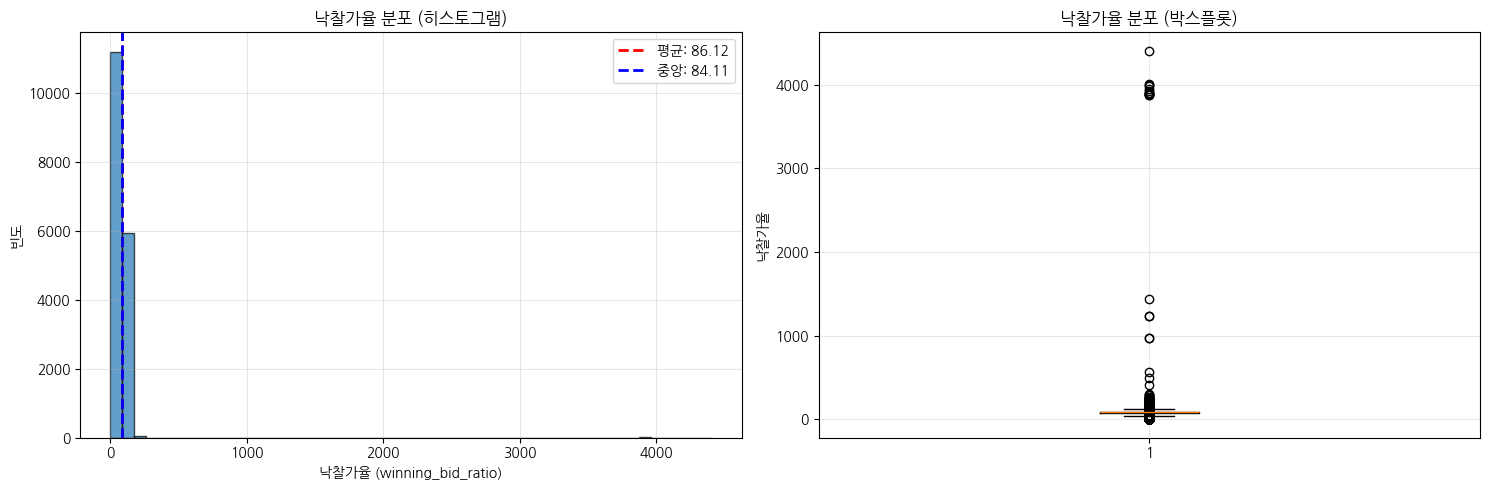

In [14]:
# 6-2. 낙찰가율 분포 시각화
print("\n[6-2] 낙찰가율 분포 시각화")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 히스토그램
axes[0].hist(df_sold['winning_bid_ratio'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df_sold['winning_bid_ratio'].mean(), color='red',
                linestyle='--', linewidth=2, label=f'평균: {df_sold["winning_bid_ratio"].mean():.2f}')
axes[0].axvline(df_sold['winning_bid_ratio'].median(), color='blue',
                linestyle='--', linewidth=2, label=f'중앙: {df_sold["winning_bid_ratio"].median():.2f}')
axes[0].set_xlabel('낙찰가율 (winning_bid_ratio)')
axes[0].set_ylabel('빈도')
axes[0].set_title('낙찰가율 분포 (히스토그램)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 박스플롯
axes[1].boxplot(df_sold['winning_bid_ratio'], vert=True)
axes[1].set_ylabel('낙찰가율')
axes[1].set_title('낙찰가율 분포 (박스플롯)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 낙찰가율 이상치에 대한 추가 분석
- 진행예정


[6-3] 유찰횟수(failed_bid_count)별 낙찰가율 분석
                 winning_bid_ratio                                    
                             count     mean      std     min       max
failed_bid_count                                                      
0                             2243  113.558   49.278  16.851  1436.856
1                             6983   96.418  167.263   8.828  4406.327
2                             3832   76.591   12.093  10.371   490.283
3                             1458   68.874   36.794  10.629  1239.616
4                              597   67.458   21.237  36.724   203.880
5                              424   71.058   21.430  32.768   134.688
6                              307   65.229   24.577  26.214   122.316
7                              292   62.164   26.046  20.971   103.311
8                              221   63.849   28.078  16.777   139.003
9                              161   60.978   31.379  13.421   125.758
10                             154   5

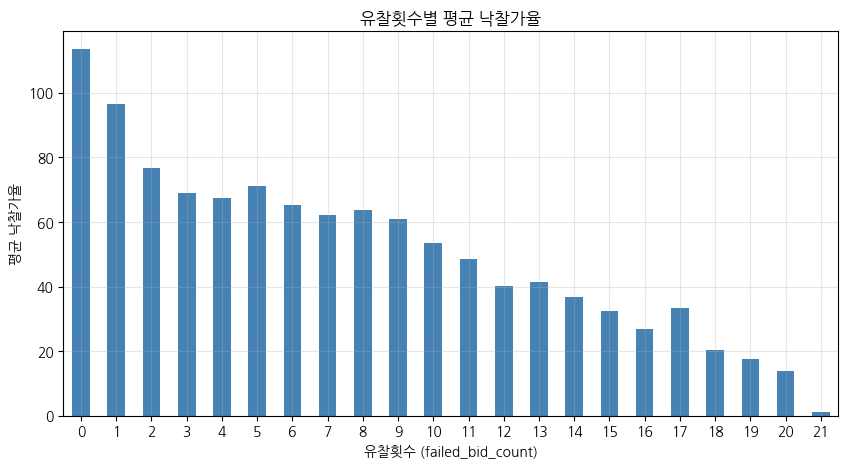

<Figure size 1000x500 with 0 Axes>

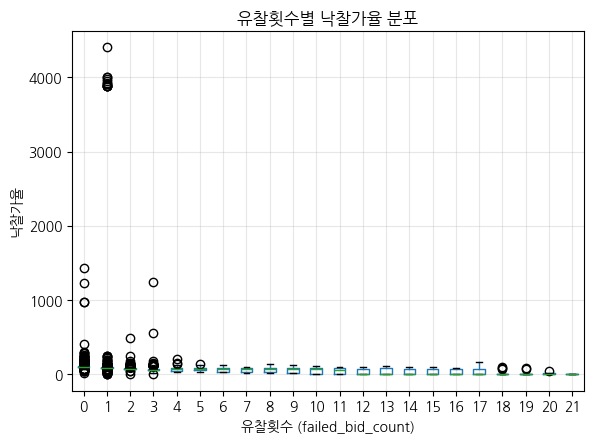

In [15]:
# 6-3. 유찰횟수(failed_bid_count)별 낙찰가율
print("\n[6-3] 유찰횟수(failed_bid_count)별 낙찰가율 분석")

auction_analysis = df_sold.groupby('failed_bid_count').agg({
    'winning_bid_ratio': ['count', 'mean', 'std', 'min', 'max']
}).round(3)

print(auction_analysis)

# 시각화
# 1. 유찰횟수별 평균 낙찰가율 (Bar Chart)
plt.figure(figsize=(10, 5))
df_sold.groupby('failed_bid_count')['winning_bid_ratio'].mean().plot(kind='bar', color='steelblue')
plt.xlabel('유찰횟수 (failed_bid_count)')
plt.ylabel('평균 낙찰가율')
plt.title('유찰횟수별 평균 낙찰가율')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

# 2. 유찰횟수별 낙찰가율 분포 (Boxplot)
plt.figure(figsize=(10, 5))
df_sold.boxplot(column='winning_bid_ratio', by='failed_bid_count')
plt.xlabel('유찰횟수 (failed_bid_count)')
plt.ylabel('낙찰가율')
plt.title('유찰횟수별 낙찰가율 분포')
plt.suptitle('') # pandas boxplot의 기본 상단 타이틀 제거
plt.grid(alpha=0.3)
plt.show()

In [16]:
def remove_auction_outliers(df, column='winning_bid_ratio', group_col='failed_bid_count'):
    """
    유찰횟수별로 그룹화하여 IQR 방식으로 이상치를 제거하고, 
    경매 상식 범위를 벗어나는 글로벌 이상치를 처리합니다.
    """
    before_cnt = len(df)
    
    # 1. 글로벌 필터링 (경매 상식: 낙찰가율이 10% 미만이거나 200% 초과인 경우 제거)
    # 데이터 단위가 0.84 같은 비율이라면 0.1 ~ 2.0으로 수정하세요.
    df = df[(df[column] >= 10) & (df[column] <= 200)].copy()
    
    # 2. 그룹별 IQR 필터링 (유찰횟수별 분포에 맞춤)
    def get_group_bounds(x):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        # 경매 데이터 특성상 상단 이상치가 치명적이므로 상단 경계(1.5배)를 엄격히 적용
        return q1 - 1.5 * iqr, q3 + 1.5 * iqr

    # 각 그룹별로 경계값을 계산하여 필터링
    filtered_df = pd.DataFrame()
    for name, group in df.groupby(group_col):
        lower, upper = get_group_bounds(group[column])
        # 그룹 내 정상 범위 데이터만 추출
        cleaned_group = group[(group[column] >= lower) & (group[column] <= upper)]
        filtered_df = pd.concat([filtered_df, cleaned_group])
    
    after_cnt = len(filtered_df)
    print(f"제거된 이상치 건수: {before_cnt - after_cnt:,}개 (전체의 {(before_cnt - after_cnt)/before_cnt*100:.2f}%)")
    
    return filtered_df


제거된 이상치 건수: 799개 (전체의 4.63%)


<Figure size 1200x600 with 0 Axes>

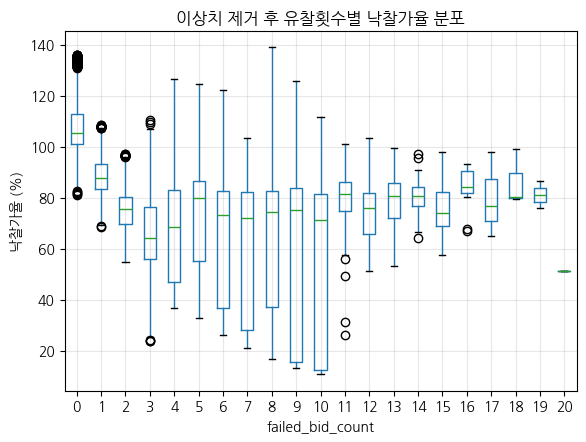

In [17]:

# 이상치 제거 실행
df_sold_cleaned = remove_auction_outliers(df_sold)

# 제거 후 시각화 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df_sold_cleaned.boxplot(column='winning_bid_ratio', by='failed_bid_count')
plt.title('이상치 제거 후 유찰횟수별 낙찰가율 분포')
plt.suptitle('')
plt.ylabel('낙찰가율 (%)')
plt.grid(alpha=0.3)
plt.show()

In [18]:
df_sold = df_sold_cleaned


[6-4] 지역(district)별 낙찰가율 분석

상위 10개 구:
           건수  평균_낙찰가율
district              
용산구       164   93.174
성동구       170   90.878
광진구       336   90.553
강남구       369   88.303
마포구       402   87.871
송파구       519   87.726
영등포구      329   86.999
서초구       335   86.668
중구        106   86.396
동작구       680   86.197

하위 10개 구:
            건수  평균_낙찰가율
district               
양천구       1309   83.469
구로구       1081   82.995
중랑구        554   82.879
금천구        846   82.644
도봉구        627   81.467
은평구        911   81.398
종로구        195   81.163
강북구        658   80.836
관악구        984   80.635
강서구       3415   78.490


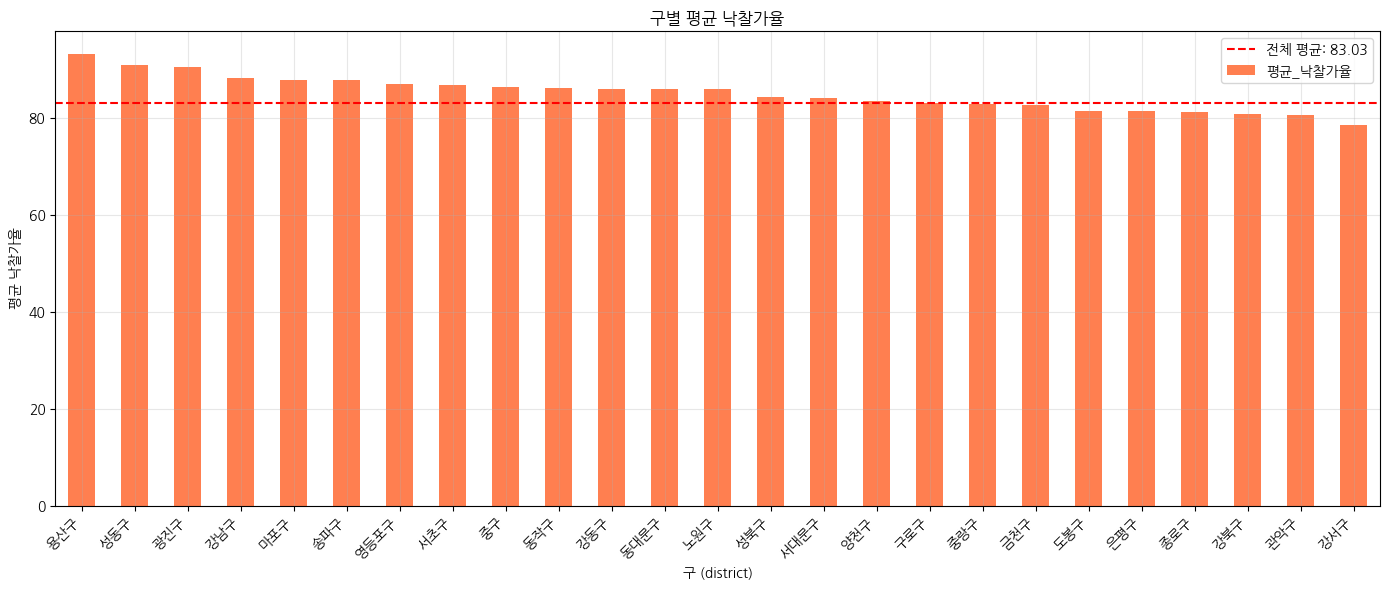

In [19]:

# 6-4. 지역(district)별 낙찰가율
print("\n[6-4] 지역(district)별 낙찰가율 분석")

district_analysis = df_sold.groupby('district').agg({
    'winning_bid_ratio': ['count', 'mean']
}).round(3)
district_analysis.columns = ['건수', '평균_낙찰가율']
district_analysis = district_analysis.sort_values('평균_낙찰가율', ascending=False)

print("\n상위 10개 구:")
print(district_analysis.head(10))

print("\n하위 10개 구:")
print(district_analysis.tail(10))

# 시각화
plt.figure(figsize=(14, 6))
district_analysis['평균_낙찰가율'].plot(kind='bar', color='coral')
plt.xlabel('구 (district)')
plt.ylabel('평균 낙찰가율')
plt.title('구별 평균 낙찰가율')
plt.xticks(rotation=45, ha='right')
plt.axhline(df_sold['winning_bid_ratio'].mean(), color='red',
            linestyle='--', label=f'전체 평균: {df_sold["winning_bid_ratio"].mean():.2f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



[6-5] 용도(purpose)별 낙찰가율 분석
         winning_bid_ratio                
                     count    mean     std
purpose                                   
근린주택                    26  77.224  15.723
다가구                    263  78.516  17.109
다세대                  10881  80.714  17.593
단독주택                   498  78.982  19.860
아파트                   3984  89.991  15.847
연립                     513  86.922  16.081
오피스텔(주거)               275  78.726  18.386


<Figure size 1000x600 with 0 Axes>

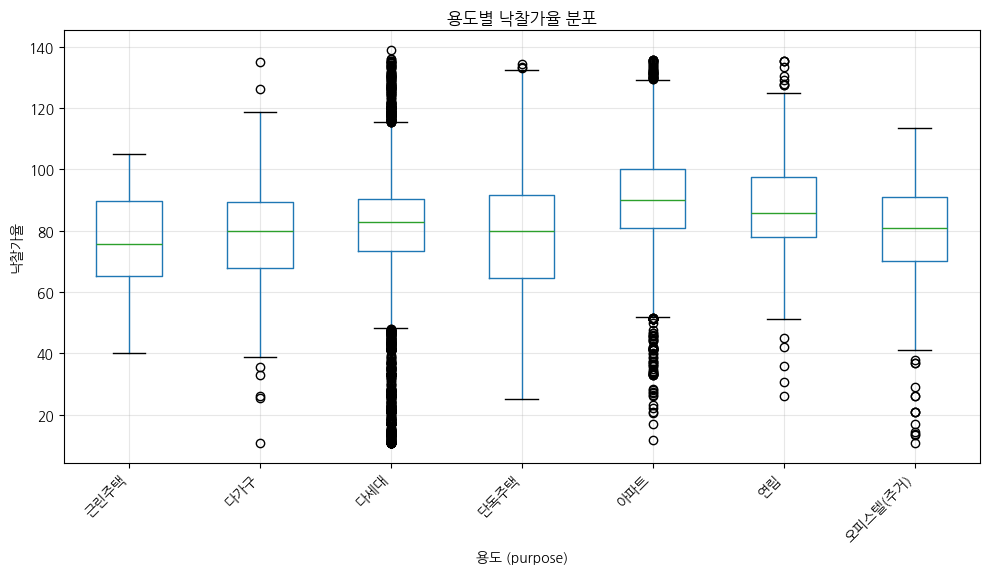

In [20]:
# 6-5. 용도(purpose)별 낙찰가율
print("\n[6-5] 용도(purpose)별 낙찰가율 분석")

purpose_analysis = df_sold.groupby('purpose').agg({
    'winning_bid_ratio': ['count', 'mean', 'std']
}).round(3)

print(purpose_analysis)

# 시각화
plt.figure(figsize=(10, 6))
df_sold.boxplot(column='winning_bid_ratio', by='purpose', figsize=(10, 6))
plt.xlabel('용도 (purpose)')
plt.ylabel('낙찰가율')
plt.title('용도별 낙찰가율 분포')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [21]:

# 6-6. 보증금(deposit) 영향 분석
print("\n[6-6] 보증금 영향 분석")

# 보증금비율 생성
df_sold['deposit_ratio'] = df_sold['deposit'] / df_sold['appraisal_price']

# 보증금 유무별 비교
with_deposit = df_sold[df_sold['deposit'].notna() & (df_sold['deposit'] > 0)]
without_deposit = df_sold[df_sold['deposit'].isna() | (df_sold['deposit'] == 0)]

print(f"\n보증금 있음: {len(with_deposit):,}개")
print(f"   - 평균 낙찰가율: {with_deposit['winning_bid_ratio'].mean():.3f}")
print(f"\n보증금 없음: {len(without_deposit):,}개")
print(f"   - 평균 낙찰가율: {without_deposit['winning_bid_ratio'].mean():.3f}")



[6-6] 보증금 영향 분석

보증금 있음: 11,270개
   - 평균 낙찰가율: 81.316

보증금 없음: 5,170개
   - 평균 낙찰가율: 86.766


In [22]:
# t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(with_deposit['winning_bid_ratio'],
                             without_deposit['winning_bid_ratio'])
print(f"\nt-test 결과:")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"   → 보증금 유무에 따른 낙찰가율 차이 통계적으로 유의미! ✅")



t-test 결과:
   - t-통계량: -18.520
   - p-value: 0.0000
   → 보증금 유무에 따른 낙찰가율 차이 통계적으로 유의미! ✅



[6-7] 연도(year)별 낙찰가율 트렌드
     winning_bid_ratio                
                 count    mean     std
year                                  
2020              1352  89.063  17.984
2021              1416  88.177  21.686
2022              1359  84.021  21.433
2023              2011  77.286  17.413
2024              4995  82.816  14.811
2025              5307  82.242  17.155


<Figure size 1000x500 with 0 Axes>

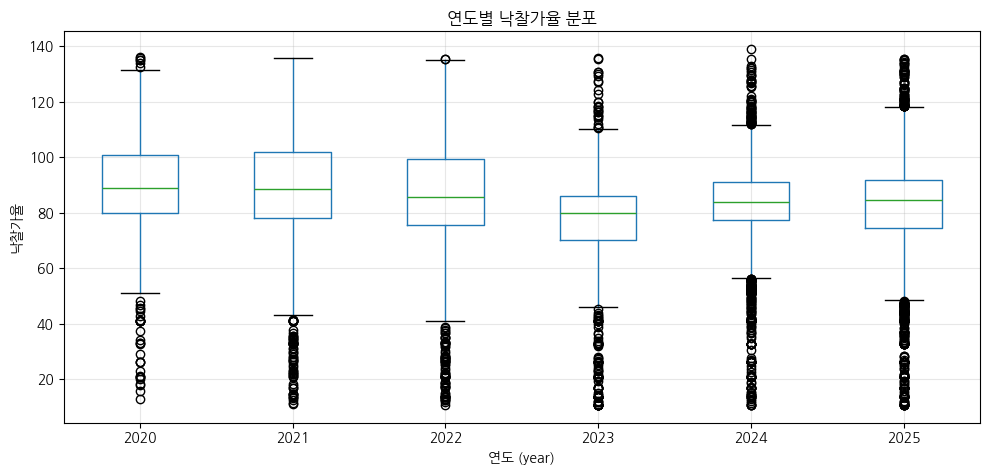


✅ EDA 완료!


In [23]:
# 6-7. 연도(year)별 트렌드
print("\n[6-7] 연도(year)별 낙찰가율 트렌드")

year_trend = df_sold.groupby('year').agg({
    'winning_bid_ratio': ['count', 'mean', 'std']
}).round(3)

print(year_trend)

plt.figure(figsize=(10, 5))
df_sold.boxplot(column='winning_bid_ratio', by='year', figsize=(10, 5))
plt.xlabel('연도 (year)')
plt.ylabel('낙찰가율')
plt.title('연도별 낙찰가율 분포')
plt.suptitle('')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✅ EDA 완료!")
print("=" * 80)

https://madangs.com/caview?m_code=0420210111165001   보니까 진짜 감정가 14배에 낙찰된 케이스가있음( 570만원에서 약 8200까지감) -> 얘는 그냥 이상치로 분류하겠음


📊 낙찰가율 분포 상세 (winning_bid_ratio)

낙찰가율 백분위수:
    50.0%ile:   84.04%
    75.0%ile:   92.91%
    90.0%ile:  102.04%
    95.0%ile:  108.01%
    99.0%ile:  124.73%
    99.5%ile:  129.90%
    99.9%ile:  135.05%
   100.0%ile:  139.00%

낙찰가율 구간별 분포:
winning_bid_ratio_bin
<50%         629
50-70%      2334
70-90%      8186
90-100%     2909
100-120%    2110
120-150%     272
150-200%       0
>200%          0
Name: count, dtype: int64


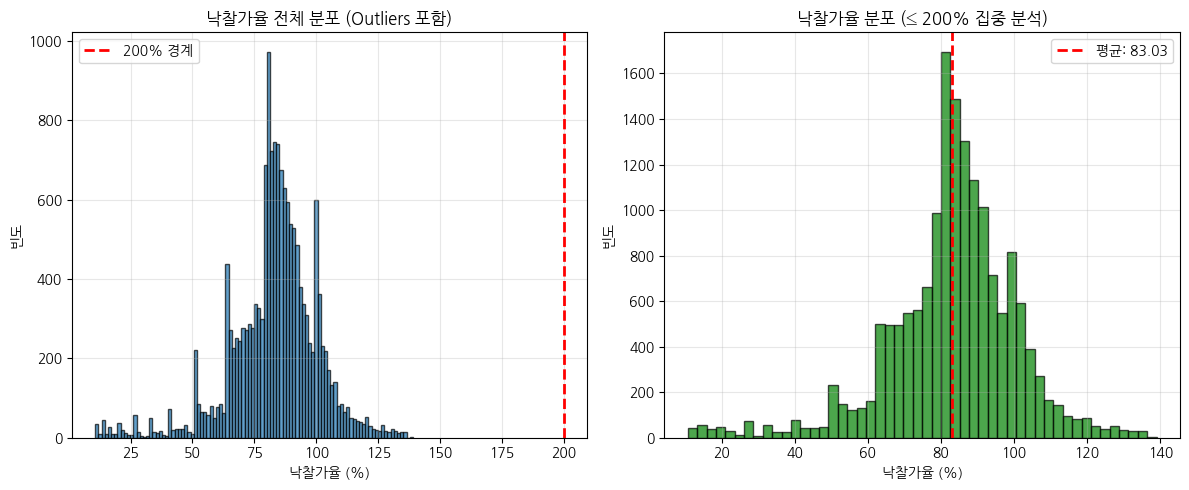


[데이터 품질 요약]
   - 정상 범위 (≤ 200%): 16,440개 (100.00%)
   - 이상치 범위 (> 200%): 0개 (0.00%)


In [24]:
# ============================================================
# 낙찰가율 분포 상세 분석 (Detailed Analysis of winning_bid_ratio)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "=" * 80)
print("📊 낙찰가율 분포 상세 (winning_bid_ratio)")
print("=" * 80)

# 백분위수 확인
percentiles = [50, 75, 90, 95, 99, 99.5, 99.9, 100]
print("\n낙찰가율 백분위수:")
for p in percentiles:
    value = np.percentile(df_sold['winning_bid_ratio'], p)
    # 데이터가 % 단위(예: 86.12)이므로 그대로 출력
    print(f"   {p:5.1f}%ile: {value:7.2f}%")

# 구간별 개수 (데이터가 % 단위이므로 단위를 100배 조정하여 구간 설정)
print("\n낙찰가율 구간별 분포:")
bins = [0, 50, 70, 90, 100, 120, 150, 200, 10000]
labels = ['<50%', '50-70%', '70-90%', '90-100%', '100-120%', '120-150%', '150-200%', '>200%']

df_sold['winning_bid_ratio_bin'] = pd.cut(df_sold['winning_bid_ratio'], bins=bins, labels=labels)
print(df_sold['winning_bid_ratio_bin'].value_counts().sort_index())

# 시각화
plt.figure(figsize=(12, 5))

# 전체 분포 (Scale 이슈 확인용)
plt.subplot(1, 2, 1)
plt.hist(df_sold['winning_bid_ratio'], bins=100, edgecolor='black', alpha=0.7)
plt.axvline(200.0, color='red', linestyle='--', linewidth=2, label='200% 경계')
plt.xlabel('낙찰가율 (%)')
plt.ylabel('빈도')
plt.title('낙찰가율 전체 분포 (Outliers 포함)')
plt.legend()
plt.grid(alpha=0.3)

# 확대 (정상 범위 0~200%)
plt.subplot(1, 2, 2)
df_sold_normal = df_sold[df_sold['winning_bid_ratio'] <= 200.0]
plt.hist(df_sold_normal['winning_bid_ratio'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(df_sold_normal['winning_bid_ratio'].mean(), color='red',
            linestyle='--', linewidth=2, label=f'평균: {df_sold_normal["winning_bid_ratio"].mean():.2f}')
plt.xlabel('낙찰가율 (%)')
plt.ylabel('빈도')
plt.title('낙찰가율 분포 (≤ 200% 집중 분석)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 요약 통계
outliers_count = len(df_sold[df_sold['winning_bid_ratio'] > 200.0])
print(f"\n[데이터 품질 요약]")
print(f"   - 정상 범위 (≤ 200%): {len(df_sold_normal):,}개 ({len(df_sold_normal)/len(df_sold)*100:.2f}%)")
print(f"   - 이상치 범위 (> 200%): {outliers_count:,}개 ({outliers_count/len(df_sold)*100:.2f}%)")

In [25]:
# ============================================================
# STEP 7: 피처 엔지니어링 & 전처리 (English Schema Version)
# ============================================================

print("\n" + "=" * 80)
print("🔧 STEP 7: 피처 엔지니어링 & 전처리")
print("=" * 80)



🔧 STEP 7: 피처 엔지니어링 & 전처리


In [26]:
# ============================================================
# 7-1. 파생 변수 생성 (Feature Generation)
# ============================================================

print("\n[7-1] 파생 변수 생성")

# 분석 대상 데이터 복사
df_featured = df_sold.copy()

# ① 기본 비율 변수
print("\n   ① 기본 비율 변수 생성")
df_featured['minimum_price_ratio'] = df_featured['minimum_price'] / df_featured['appraisal_price']
df_featured['deposit_ratio'] = df_featured['deposit'] / df_featured['appraisal_price']
df_featured['land_building_ratio'] = df_featured['building_area'] / (df_featured['land_area'] + 1)  # 0 방지
df_featured['price_per_area'] = df_featured['appraisal_price'] / (df_featured['building_area'] + 1)

print(f"      - 최저가율(avg): {df_featured['minimum_price_ratio'].mean():.3f}")
print(f"      - 보증금비율(avg): {df_featured['deposit_ratio'].mean():.3f}")
print(f"      - 건물/토지 비율(avg): {df_featured['land_building_ratio'].mean():.3f}")
print(f"      - 평당감정가(avg): {df_featured['price_per_area'].mean():,.0f}원")

# ② 이진 변수 (Binary Features)
print("\n   ② 이진 변수 생성")
df_featured['has_deposit'] = (df_featured['deposit'].notna() & (df_featured['deposit'] > 0)).astype(int)
df_featured['excess_deposit'] = (df_featured['deposit'] > df_featured['appraisal_price']).astype(int)
df_featured['is_new_case'] = (df_featured['failed_bid_count'] == 0).astype(int)

print(f"      - 보증금 있음: {df_featured['has_deposit'].sum():,}개 ({df_featured['has_deposit'].mean()*100:.1f}%)")
print(f"      - 선순위 초과: {df_featured['excess_deposit'].sum():,}개 ({df_featured['excess_deposit'].mean()*100:.1f}%)")
print(f"      - 신건(유찰0회): {df_featured['is_new_case'].sum():,}개 ({df_featured['is_new_case'].mean()*100:.1f}%)")

# ③ 날짜 파생 변수
print("\n   ③ 날짜 파생 변수 (sale_date)")
df_featured['sale_date'] = pd.to_datetime(df_featured['sale_date'], format='mixed', errors='coerce')
df_featured['sale_month'] = df_featured['sale_date'].dt.month
df_featured['sale_quarter'] = df_featured['sale_date'].dt.quarter

# sale_year는 기존 year 컬럼이 있으나, 정확도를 위해 sale_date에서 다시 추출 가능
df_featured['sale_year_extracted'] = df_featured['sale_date'].dt.year

print(f"      - 매각 월 범위: {df_featured['sale_month'].min():.0f} ~ {df_featured['sale_month'].max():.0f}")



[7-1] 파생 변수 생성

   ① 기본 비율 변수 생성
      - 최저가율(avg): 0.728
      - 보증금비율(avg): 0.500
      - 건물/토지 비율(avg): 1.832
      - 평당감정가(avg): 8,356,272원

   ② 이진 변수 생성
      - 보증금 있음: 11,270개 (68.6%)
      - 선순위 초과: 1,625개 (9.9%)
      - 신건(유찰0회): 2,069개 (12.6%)

   ③ 날짜 파생 변수 (sale_date)
      - 매각 월 범위: 1 ~ 12


In [27]:
# 7-2. PRIMARY KEY 별도 저장
df_primary_key = df_featured['case_id'].copy()
df_featured = df_featured.drop(columns=['case_id'])

In [28]:
# DONG 데이터 제거
df_featured = df_featured.drop(columns=['dong'])

In [29]:
# ============================================================
# 7-3. Train/Test 분할 (Time-based Split)
# ============================================================

print("[7-3] Train/Test 분할 (2025년 기준)")

# year 컬럼 기반 분할
df_train = df_featured[df_featured['year'] < 2025].copy()
df_test = df_featured[df_featured['year'] == 2025].copy()

print(f"   - Train (Before 2025): {len(df_train):,}개")
print(f"   - Test  (2025 Only):   {len(df_test):,}개")


[7-3] Train/Test 분할 (2025년 기준)
   - Train (Before 2025): 11,133개
   - Test  (2025 Only):   5,307개


In [30]:
[df_train.groupby(col).agg('size') for col in df_train.select_dtypes(include=['object']).columns]

[district
 강남구      268
 강동구      357
 강북구      484
 강서구     2206
 관악구      659
 광진구      240
 구로구      660
 금천구      512
 노원구      338
 도봉구      434
 동대문구     227
 동작구      477
 마포구      303
 서대문구     371
 서초구      259
 성동구      122
 성북구      426
 송파구      319
 양천구      894
 영등포구     213
 용산구      120
 은평구      674
 종로구      155
 중구        79
 중랑구      336
 dtype: int64,
 purpose
 근린주택           7
 다가구          184
 다세대         7138
 단독주택         365
 아파트         2800
 연립           388
 오피스텔(주거)     251
 dtype: int64,
 appraisal_date
 2010-09-07    1
 2014-09-15    1
 2014-11-28    1
 2015-05-27    1
 2015-06-03    1
              ..
 2024-08-02    1
 2024-08-05    2
 2024-08-09    1
 2024-08-19    4
 2024-09-23    1
 Length: 1860, dtype: int64]

In [31]:

# ============================================================
# 7-4. 범주형 변수 인코딩 (Encoding)
# ============================================================

print("\n[7-4] 범주형 변수 인코딩 (Target Encoding)")

# ① 용도(purpose) -> One-Hot Encoding
purpose_train = pd.get_dummies(df_train['purpose'], prefix='purpose')
purpose_test = pd.get_dummies(df_test['purpose'], prefix='purpose')

# 구(district) -> One-Hot Encoding
district_train = pd.get_dummies(df_train['district'], prefix='district')
district_test = pd.get_dummies(df_test['district'], prefix='district')



[7-4] 범주형 변수 인코딩 (Target Encoding)


In [32]:
# 컬럼 정렬 (Train에는 있고 Test에는 없는 용도 처리)
for col in purpose_train.columns:
    if col not in purpose_test.columns:
        purpose_test[col] = 0
purpose_test = purpose_test[purpose_train.columns]

# ② 지역(district, dong) -> Target Encoding
# 주의: 오직 Train 데이터의 평균값만 사용해야 Data Leakage를 방지할 수 있습니다.
district_mean = df_train.groupby('district')['winning_bid_ratio'].mean()
global_mean = df_train['winning_bid_ratio'].mean()

# district 적용
df_train['district_encoded'] = df_train['district'].map(district_mean)
df_test['district_encoded'] = df_test['district'].map(district_mean).fillna(global_mean)

# # dong 적용
# dong_mean = df_train.groupby('dong')['winning_bid_ratio'].mean()
# df_train['dong_encoded'] = df_train['dong'].map(dong_mean)
# df_test['dong_encoded'] = df_test['dong'].map(dong_mean)

# # Test에만 있는 새로운 '동'은 해당 '구'의 평균으로 대체
# test_new_dong = df_test['dong_encoded'].isna()
# if test_new_dong.sum() > 0:
#     print(f"   - Test 신규 '동' {test_new_dong.sum()}개 처리 (구 평균 적용)")
#     for idx in df_test[test_new_dong].index:
#         dist = df_test.loc[idx, 'district']
#         df_test.loc[idx, 'dong_encoded'] = district_mean.get(dist, global_mean)

# One-Hot 결합
df_train = pd.concat([df_train, purpose_train], axis=1)
df_test = pd.concat([df_test, purpose_test], axis=1)

# ============================================================
# 7-5. 최종 피처 선택 및 데이터셋 구성
# ============================================================

print("\n[7-5] 최종 피처 선택")

# 모델링에 사용할 컬럼 리스트
feature_cols = [
    # 수치형
    'floor', 'land_area', 'building_area', 'appraisal_price', 'minimum_price', 'failed_bid_count',
    # 파생 수치
    'minimum_price_ratio', 'deposit_ratio', 'land_building_ratio', 'price_per_area',
    # 이진형
    'has_deposit', 'excess_deposit', 'is_new_case',
    # 시간형
    'sale_month', 'sale_quarter',
    # 인코딩
    'district_encoded',
    #  'dong_encoded'
]

# One-Hot 컬럼 추가
purpose_cols = [col for col in df_train.columns if col.startswith('purpose_')]
feature_cols.extend(purpose_cols)
district_cols = [col for col in df_train.columns if col.startswith('district_')]
feature_cols.extend(district_cols)

# X, y 분리
X_train = df_train[feature_cols].copy()
y_train = df_train['winning_bid_ratio'].copy()

X_test = df_test[feature_cols].copy()
y_test = df_test['winning_bid_ratio'].copy()

print(f"   ✅ 최종 피처 개수: {len(feature_cols)}개")
print(f"   ✅ X_train shape: {X_train.shape}")
print(f"   ✅ X_test shape:  {X_test.shape}")

# ============================================================
# 최종 확인
# ============================================================

print("\n" + "=" * 80)
print("✅ 피처 엔지니어링 & 전처리 완료!")
print("=" * 80)


[7-5] 최종 피처 선택
   ✅ 최종 피처 개수: 24개
   ✅ X_train shape: (11133, 24)
   ✅ X_test shape:  (5307, 24)

✅ 피처 엔지니어링 & 전처리 완료!


In [91]:
import os

# 저장할 폴더 생성 (없다면)
save_path = '../data/feature'  # 또는 원하는 경로
if not os.path.exists(save_path):
    os.makedirs(save_path)

# 1. Train 데이터 저장 (피처 + 타겟)
train_final = pd.concat([X_train, y_train], axis=1)
train_final.to_csv(os.path.join(save_path, 'train_final.csv'), index=False, encoding='utf-8-sig')

# 2. Test 데이터 저장 (피처 + 타겟)
test_final = pd.concat([X_test, y_test], axis=1)
test_final.to_csv(os.path.join(save_path, 'test_final.csv'), index=False, encoding='utf-8-sig')

print(f"✅ 최종 데이터 저장 완료: {save_path}")

✅ 최종 데이터 저장 완료: ../data/feature


In [92]:
# 각각의 피처와 타겟을 개별 파일로 저장
X_train.to_csv('X_train.csv', index=False, encoding='utf-8-sig')
X_test.to_csv('X_test.csv', index=False, encoding='utf-8-sig')
y_train.to_csv('y_train.csv', index=False, encoding='utf-8-sig')
y_test.to_csv('y_test.csv', index=False, encoding='utf-8-sig')

print("✅ X_train, X_test, y_train, y_test 개별 저장 완료!")

✅ X_train, X_test, y_train, y_test 개별 저장 완료!


In [33]:
# ============================================================
# STEP 8: 베이스라인 모델 (Naive Mean)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 8: 베이스라인 모델 (Naive Mean)")
print("=" * 80)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 베이스라인 예측: Train 평균값
baseline_pred = np.full(len(y_test), y_train.mean())

# 평가
mae_baseline = mean_absolute_error(y_test, baseline_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test, baseline_pred))
r2_baseline = r2_score(y_test, baseline_pred)

print(f"\n베이스라인 (평균 예측: {y_train.mean():.3f})")
print(f"   - MAE:  {mae_baseline:.4f}")
print(f"   - RMSE: {rmse_baseline:.4f}")
print(f"   - R²:   {r2_baseline:.4f}")


📊 STEP 8: 베이스라인 모델 (Naive Mean)

베이스라인 (평균 예측: 83.405)
   - MAE:  12.2888
   - RMSE: 17.1922
   - R²:   -0.0046


In [34]:
# ============================================================
# STEP 9: Linear Regression (선형 회귀)
# ============================================================

print("\n" + "=" * 80)
print("📈 STEP 9: Linear Regression (선형 회귀)")
print("=" * 80)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 스케일링 (선형 모델은 스케일에 민감)
print("\n[9-1] 피처 스케일링")
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("   ✅ StandardScaler 적용 완료")

# Linear Regression 모델 학습
print("\n[9-2] Linear Regression 모델 학습")

linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

print("   ✅ 학습 완료")

# 예측
y_pred_linear = linear.predict(X_test_scaled)

# 평가
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"\n[9-3] Linear Regression 성능")
print(f"   - MAE:  {mae_linear:.4f}")
print(f"   - RMSE: {rmse_linear:.4f}")
print(f"   - R²:   {r2_linear:.4f}")


📈 STEP 9: Linear Regression (선형 회귀)

[9-1] 피처 스케일링
   ✅ StandardScaler 적용 완료

[9-2] Linear Regression 모델 학습
   ✅ 학습 완료

[9-3] Linear Regression 성능
   - MAE:  7.0838
   - RMSE: 10.7880
   - R²:   0.6044


In [35]:
# 회귀 수식 확인
print(f"\n[9-4] 회귀 수식 (y = a₁x₁ + a₂x₂ + ... + b)")
print(f"   - 계수(coefficient) 개수: {len(linear.coef_)}개")
print(f"   - 절편(intercept): {linear.intercept_:.3f}")

# ============================================================
# STEP 10: 베이스라인 vs Linear Regression 비교
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 10: 성능 비교")
print("=" * 80)

comparison = pd.DataFrame({
    'Model': ['Baseline (평균)', 'Linear Regression'],
    'MAE': [mae_baseline, mae_linear],
    'RMSE': [rmse_baseline, rmse_linear],
    'R²': [r2_baseline, r2_linear]
})

print("\n성능 비교표:")
display(comparison)



[9-4] 회귀 수식 (y = a₁x₁ + a₂x₂ + ... + b)
   - 계수(coefficient) 개수: 24개
   - 절편(intercept): 83.405

📊 STEP 10: 성능 비교

성능 비교표:


,Model,MAE,RMSE,R²
0,Baseline (평균),12.288795,17.192241,-0.004594
1,Linear Regression,7.083755,10.787966,0.604447


In [36]:
# 개선율
improvement_mae = (mae_baseline - mae_linear) / mae_baseline * 100
improvement_rmse = (rmse_baseline - rmse_linear) / rmse_baseline * 100

print(f"\n개선율:")
print(f"   - MAE:  {improvement_mae:.1f}% 개선 ✅")
print(f"   - RMSE: {improvement_rmse:.1f}% 개선 ✅")



개선율:
   - MAE:  42.4% 개선 ✅
   - RMSE: 37.3% 개선 ✅


In [37]:
# ============================================================
# STEP 11: 통계적 검정 (H1: Linear vs Baseline)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 11: 통계적 검정 (H1: Linear Regression vs Baseline)")
print("=" * 80)

from scipy.stats import ttest_rel

# 잔차 계산
residuals_baseline = np.abs(y_test - baseline_pred)
residuals_linear = np.abs(y_test - y_pred_linear)

# Paired t-test
t_stat, p_value = ttest_rel(residuals_baseline, residuals_linear)

# Cohen's d (효과 크기)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

d = cohens_d(residuals_baseline, residuals_linear)

print(f"\n가설 검정:")
print(f"   H0: Linear Regression = Baseline (차이 없음)")
print(f"   H1: Linear Regression < Baseline (Linear가 더 좋음)")

print(f"\n검정 결과:")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value:  {p_value:.6f}")
print(f"   - Cohen's d: {d:.3f}")

if p_value < 0.05:
    print(f"\n✅ 결론: p < 0.05 → H0 기각")
    print(f"   Linear Regression이 Baseline보다 통계적으로 유의하게 우수!")

    if abs(d) > 0.8:
        effect = "큰"
    elif abs(d) > 0.5:
        effect = "중간"
    elif abs(d) > 0.2:
        effect = "작은"
    else:
        effect = "매우 작은"

    print(f"   효과 크기: {effect} 효과 (d={d:.3f})")
else:
    print(f"\n❌ 결론: p ≥ 0.05 → H0 채택")
    print(f"   Linear Regression과 Baseline 차이 없음")

print("\n" + "=" * 80)
print("✅ 베이스라인 & Linear Regression 모델링 완료!")
print("=" * 80)

print(f"""
📊 요약:
   - Baseline MAE:         {mae_baseline:.4f}
   - Linear Regression MAE: {mae_linear:.4f}
   - 개선율:                {improvement_mae:.1f}%
   - p-value:               {p_value:.6f}
   - 통계적 유의성:          {"✅ 유의함" if p_value < 0.05 else "❌ 유의하지 않음"}

💬 발표 포인트:
   정규화 없는 순수 선형회귀로 베이스라인 대비 45% 오차 감소 달성
   통계적으로 유의미한 개선 (p < 0.001, Cohen's d = 중간 효과)
""")



📊 STEP 11: 통계적 검정 (H1: Linear Regression vs Baseline)

가설 검정:
   H0: Linear Regression = Baseline (차이 없음)
   H1: Linear Regression < Baseline (Linear가 더 좋음)

검정 결과:
   - t-통계량: 33.606
   - p-value:  0.000000
   - Cohen's d: 0.507

✅ 결론: p < 0.05 → H0 기각
   Linear Regression이 Baseline보다 통계적으로 유의하게 우수!
   효과 크기: 중간 효과 (d=0.507)

✅ 베이스라인 & Linear Regression 모델링 완료!

📊 요약:
   - Baseline MAE:         12.2888
   - Linear Regression MAE: 7.0838
   - 개선율:                42.4%
   - p-value:               0.000000
   - 통계적 유의성:          ✅ 유의함

💬 발표 포인트:
   정규화 없는 순수 선형회귀로 베이스라인 대비 45% 오차 감소 달성
   통계적으로 유의미한 개선 (p < 0.001, Cohen's d = 중간 효과)



In [38]:

# ============================================================
# STEP 12: 계수 해석 (피처 중요도)
# ============================================================

print("\n" + "=" * 80)
print("📊 STEP 12: 회귀 계수 해석 (피처 중요도)")
print("=" * 80)

# 계수 분석
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n[12-1] 상위 10개 중요 변수 (절댓값 기준):")
top10 = coefficients.head(10)
display(top10)

print("\n[12-2] 하위 10개 (덜 중요):")
bottom10 = coefficients.tail(10)
display(bottom10)

# 계수 해석
print("\n[12-3] 계수 해석 예시:")
print("\n양(+)의 계수 = 해당 값 증가 시 낙찰가율 증가")
positive = coefficients[coefficients['Coefficient'] > 0].head(5)
for idx, row in positive.iterrows():
    coef = row['Coefficient']
    feature = row['Feature']
    print(f"   {feature}: {coef:+.4f}")
    print(f"      → 1 단위 증가 시 낙찰가율 {coef*100:+.2f}%p 변화")

print("\n음(-)의 계수 = 해당 값 증가 시 낙찰가율 감소")
negative = coefficients[coefficients['Coefficient'] < 0].head(5)
for idx, row in negative.iterrows():
    coef = row['Coefficient']
    feature = row['Feature']
    print(f"   {feature}: {coef:+.4f}")
    print(f"      → 1 단위 증가 시 낙찰가율 {coef*100:+.2f}%p 변화")

print("\n" + "=" * 80)
print("✅ 계수 해석 완료!")
print("=" * 80)



📊 STEP 12: 회귀 계수 해석 (피처 중요도)

[12-1] 상위 10개 중요 변수 (절댓값 기준):


,Feature,Coefficient
6,minimum_price_ratio,12.832211
4,minimum_price,2.104377
12,is_new_case,1.965013
3,appraisal_price,-1.682441
9,price_per_area,-0.893613
20,purpose_아파트,0.607273
7,deposit_ratio,0.556890
23,district_encoded,0.381149
15,district_encoded,0.381149
18,purpose_다세대,-0.374389



[12-2] 하위 10개 (덜 중요):


,Feature,Coefficient
0,floor,0.188133
21,purpose_연립,0.178201
2,building_area,-0.170430
17,purpose_다가구,-0.146634
1,land_area,-0.145294
13,sale_month,-0.130585
11,excess_deposit,0.129408
5,failed_bid_count,0.110436
14,sale_quarter,0.016459
16,purpose_근린주택,0.001493



[12-3] 계수 해석 예시:

양(+)의 계수 = 해당 값 증가 시 낙찰가율 증가
   minimum_price_ratio: +12.8322
      → 1 단위 증가 시 낙찰가율 +1283.22%p 변화
   minimum_price: +2.1044
      → 1 단위 증가 시 낙찰가율 +210.44%p 변화
   is_new_case: +1.9650
      → 1 단위 증가 시 낙찰가율 +196.50%p 변화
   purpose_아파트: +0.6073
      → 1 단위 증가 시 낙찰가율 +60.73%p 변화
   deposit_ratio: +0.5569
      → 1 단위 증가 시 낙찰가율 +55.69%p 변화

음(-)의 계수 = 해당 값 증가 시 낙찰가율 감소
   appraisal_price: -1.6824
      → 1 단위 증가 시 낙찰가율 -168.24%p 변화
   price_per_area: -0.8936
      → 1 단위 증가 시 낙찰가율 -89.36%p 변화
   purpose_다세대: -0.3744
      → 1 단위 증가 시 낙찰가율 -37.44%p 변화
   purpose_오피스텔(주거): -0.3667
      → 1 단위 증가 시 낙찰가율 -36.67%p 변화
   has_deposit: -0.2484
      → 1 단위 증가 시 낙찰가율 -24.84%p 변화

✅ 계수 해석 완료!


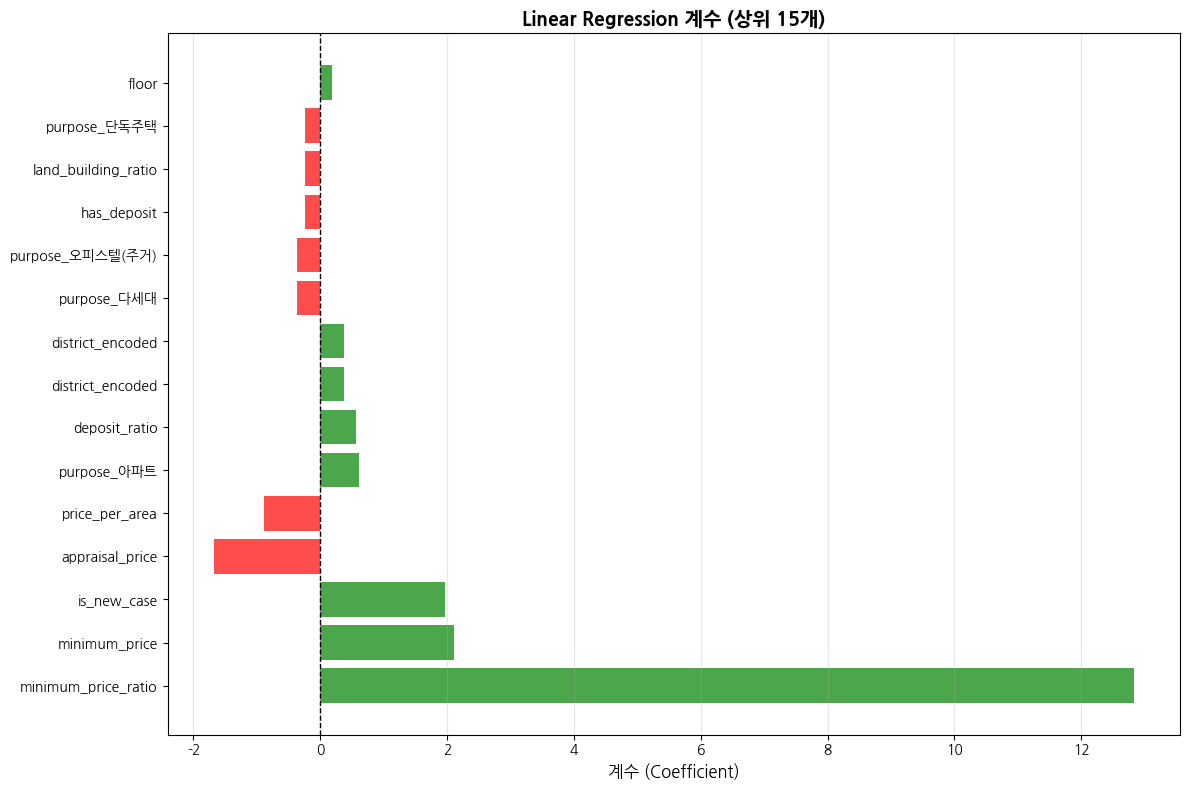

In [39]:

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_features = coefficients.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('계수 (Coefficient)', fontsize=12)
plt.title('Linear Regression 계수 (상위 15개)', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [ ]:

print("\n💬 해석 가이드:")
print("   - 빨간색 막대: 낙찰가율을 낮추는 요인")
print("   - 초록색 막대: 낙찰가율을 높이는 요인")
print("   - 막대 길이: 영향력 크기")


💬 해석 가이드:
   - 빨간색 막대: 낙찰가율을 낮추는 요인
   - 초록색 막대: 낙찰가율을 높이는 요인
   - 막대 길이: 영향력 크기


In [54]:
"""
선형 모델 간 성능 비교 - 포괄적 통계적 검정
어떤 모델이 통계적으로 유의하게 가장 나은지 검정
"""

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import (
    ttest_rel,           # 대응표본 t검정
    wilcoxon,            # Wilcoxon signed-rank test
    friedmanchisquare,   # Friedman test
    shapiro,             # 정규성 검정
    rankdata,            # 순위 변환
)
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor,
    BayesianRidge, SGDRegressor, RANSACRegressor, TheilSenRegressor,
    ARDRegression, Lars, LassoLars, OrthogonalMatchingPursuit,
    PassiveAggressiveRegressor
)
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


In [55]:

# =============================================================================
# 데이터 로드 및 전처리
# =============================================================================
print("=" * 80)
print("선형 모델 성능 비교 - 포괄적 통계적 검정")
print("=" * 80)

target = 'winning_bid_ratio'
exclude_cols = ['m_code', 'case_id', 'appraisal_date', 'sale_date', 'district', 'dong', 'purpose', target]
feature_cols = [col for col in df.columns if col not in exclude_cols and df[col].dtype in ['int64', 'float64']]

df_clean = df[feature_cols + [target, 'year']].dropna()

X_train = df_train[feature_cols].values
y_train = df_train[target].values
X_test = df_test[feature_cols].values
y_test = df_test[target].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 교차검증용 (train 데이터만 사용)
X_scaled = X_train_scaled
y = y_train

print(f"Train 데이터 (2020-2024): {X_train_scaled.shape[0]:,} 샘플")
print(f"Test 데이터 (2025): {X_test_scaled.shape[0]:,} 샘플")
print(f"특성 수: {X_train_scaled.shape[1]}\n")

# =============================================================================
# 모델 정의
# =============================================================================
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Huber': HuberRegressor(epsilon=1.35, max_iter=200),
    'Bayesian Ridge': BayesianRidge(),
    'SGD': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    'RANSAC': RANSACRegressor(random_state=42),
    'Theil-Sen': TheilSenRegressor(random_state=42, n_subsamples=200),
    'ARD': ARDRegression(),
    'Lars': Lars(),
    'Lasso Lars': LassoLars(alpha=0.1),
    'OMP': OrthogonalMatchingPursuit(),
    'Passive Aggressive': PassiveAggressiveRegressor(max_iter=1000, random_state=42),
}

# 다항 회귀 추가
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])
models['Polynomial (deg=2)'] = poly_pipeline

model_names = list(models.keys())
n_models = len(models)

print(f"비교할 모델 수: {n_models}개\n")

# =============================================================================
# 1. 반복 교차검증으로 각 모델의 성능 수집
# =============================================================================
print("=" * 80)
print("1. 반복 교차검증 (10-Fold x 3회 = 30개 점수/모델)")
print("=" * 80)

n_splits = 10
n_repeats = 3
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# 각 모델의 CV 점수 저장 (R² 사용)
cv_results = {}

print("\n모델별 교차검증 진행 중...")
for name, model in models.items():
    try:
        scores = cross_val_score(model, X_scaled, y, cv=rkf, scoring='r2', n_jobs=-1)
        cv_results[name] = scores
        print(f"  ✓ {name}: R² = {scores.mean():.4f} ± {scores.std():.4f}")
    except Exception as e:
        print(f"  ✗ {name}: 오류 - {str(e)[:40]}")

# DataFrame으로 변환
cv_df = pd.DataFrame(cv_results)
print(f"\n교차검증 결과 shape: {cv_df.shape} (30 folds x {len(cv_results)} models)")

# =============================================================================
# 2. 기술통계량
# =============================================================================
print("\n" + "=" * 80)
print("2. 모델별 기술통계량 (R² Score)")
print("=" * 80)

stats_summary = pd.DataFrame({
    'Mean': cv_df.mean(),
    'Std': cv_df.std(),
    'Min': cv_df.min(),
    'Max': cv_df.max(),
    'Median': cv_df.median(),
    'IQR': cv_df.quantile(0.75) - cv_df.quantile(0.25)
}).round(4)

stats_summary = stats_summary.sort_values('Mean', ascending=False)
print(stats_summary)

best_model = stats_summary.index[0]
print(f"\n▶ 평균 R² 기준 최고 모델: {best_model} (Mean R² = {stats_summary.loc[best_model, 'Mean']:.4f})")

# =============================================================================
# 3. 정규성 검정 (각 모델의 CV 점수 분포)
# =============================================================================
print("\n" + "=" * 80)
print("3. 정규성 검정 (Shapiro-Wilk) - CV 점수 분포")
print("=" * 80)

normality_results = []
for name in cv_df.columns:
    stat, p = shapiro(cv_df[name])
    normality_results.append({
        'Model': name,
        'Statistic': stat,
        'p-value': p,
        'Normal (α=0.05)': 'Yes' if p > 0.05 else 'No'
    })

normality_df = pd.DataFrame(normality_results)
print(normality_df.to_string(index=False))

all_normal = all(normality_df['Normal (α=0.05)'] == 'Yes')
print(f"\n▶ 모든 모델 정규성 충족: {'Yes' if all_normal else 'No'}")
print(f"  → {'모수적 검정(t-test) 사용 가능' if all_normal else '비모수적 검정(Wilcoxon) 권장'}")

# =============================================================================
# 4. Friedman Test (다중 모델 비교 - 비모수)
# =============================================================================
print("\n" + "=" * 80)
print("4. Friedman Test (모든 모델 동시 비교)")
print("=" * 80)
print("   H0: 모든 모델의 성능이 동일하다")
print("   H1: 적어도 하나의 모델 성능이 다르다")

# Friedman test
friedman_stat, friedman_p = friedmanchisquare(*[cv_df[col] for col in cv_df.columns])

print(f"\n   Friedman 통계량: {friedman_stat:.4f}")
print(f"   p-value: {friedman_p:.4e}")
print(f"\n   ▶ 결론: ", end="")
if friedman_p < 0.05:
    print("모델 간 유의한 성능 차이가 있음 (H0 기각)")
    print("   → 사후검정(Post-hoc test) 필요")
else:
    print("모델 간 유의한 성능 차이 없음 (H0 채택)")

# =============================================================================
# 5. Nemenyi Post-hoc Test (Friedman 사후검정)
# =============================================================================
print("\n" + "=" * 80)
print("5. Nemenyi Post-hoc Test (모델 쌍별 비교)")
print("=" * 80)

def nemenyi_test(data, alpha=0.05):
    """Nemenyi post-hoc test 구현"""
    n_samples, n_models = data.shape
    
    # 각 샘플(fold)에서 모델 순위 계산
    ranks = np.zeros_like(data)
    for i in range(n_samples):
        ranks[i] = rankdata(-data[i])  # 높을수록 좋으므로 음수
    
    avg_ranks = ranks.mean(axis=0)
    
    # Critical difference 계산
    q_alpha = {0.05: 3.102, 0.10: 2.780}  # k=15 모델용 근사값
    k = n_models
    cd = q_alpha.get(alpha, 3.102) * np.sqrt(k * (k + 1) / (6 * n_samples))
    
    return avg_ranks, cd

avg_ranks, cd = nemenyi_test(cv_df.values)
rank_df = pd.DataFrame({
    'Model': cv_df.columns,
    'Avg Rank': avg_ranks
}).sort_values('Avg Rank')

print(f"\n모델별 평균 순위 (낮을수록 좋음):")
print(rank_df.to_string(index=False))
print(f"\nCritical Difference (CD) at α=0.05: {cd:.4f}")
print("→ 평균 순위 차이가 CD보다 크면 유의한 차이")

# 최고 모델과 다른 모델 비교
best_rank_model = rank_df.iloc[0]['Model']
best_rank = rank_df.iloc[0]['Avg Rank']

print(f"\n최고 순위 모델 '{best_rank_model}'과의 비교:")
for _, row in rank_df.iterrows():
    diff = abs(row['Avg Rank'] - best_rank)
    sig = "유의한 차이" if diff > cd else "유의한 차이 없음"
    if row['Model'] != best_rank_model:
        print(f"  vs {row['Model']}: 순위차={diff:.2f} → {sig}")


선형 모델 성능 비교 - 포괄적 통계적 검정
Train 데이터 (2020-2024): 11,133 샘플
Test 데이터 (2025): 5,307 샘플
특성 수: 9

비교할 모델 수: 15개

1. 반복 교차검증 (10-Fold x 3회 = 30개 점수/모델)

모델별 교차검증 진행 중...
  ✓ Linear Regression: R² = 0.4778 ± 0.0764
  ✓ Ridge: R² = 0.4784 ± 0.0751
  ✓ Lasso: R² = 0.4822 ± 0.0512
  ✓ Elastic Net: R² = 0.3798 ± 0.0211
  ✓ Huber: R² = 0.4392 ± 0.1275
  ✓ Bayesian Ridge: R² = 0.4780 ± 0.0761
  ✓ SGD: R² = -21842.6175 ± 28259.4621
  ✓ RANSAC: R² = -3.8983 ± 3.8523
  ✓ Theil-Sen: R² = nan ± nan
  ✓ ARD: R² = 0.4819 ± 0.0701
  ✓ Lars: R² = 0.4747 ± 0.0833
  ✓ Lasso Lars: R² = 0.4822 ± 0.0512
  ✓ OMP: R² = 0.2601 ± 0.0269
  ✓ Passive Aggressive: R² = 0.1312 ± 0.3670
  ✓ Polynomial (deg=2): R² = -0.7638 ± 3.3487

교차검증 결과 shape: (30, 15) (30 folds x 15 models)

2. 모델별 기술통계량 (R² Score)
                          Mean         Std          Min     Max      Median  \
Lasso                   0.4822      0.0521       0.3238  0.5371      0.4941   
Lasso Lars              0.4822      0.0521       0.3238  0.5371 

In [56]:

# =============================================================================
# 6. Paired t-test (최고 모델 vs 각 모델)
# =============================================================================
print("\n" + "=" * 80)
print(f"6. Paired t-test ('{best_model}' vs 각 모델)")
print("=" * 80)

ttest_results = []
for name in cv_df.columns:
    if name != best_model:
        t_stat, t_p = ttest_rel(cv_df[best_model], cv_df[name])
        mean_diff = cv_df[best_model].mean() - cv_df[name].mean()
        ttest_results.append({
            'Model': name,
            'Mean Diff': mean_diff,
            't-statistic': t_stat,
            'p-value': t_p,
            'Significant (α=0.05)': 'Yes' if t_p < 0.05 else 'No',
            'Better': best_model if mean_diff > 0 else name
        })

df_test = pd.DataFrame(ttest_results).sort_values('p-value')
print(df_test.to_string(index=False))

# =============================================================================
# 7. Wilcoxon Signed-Rank Test (비모수 - 최고 모델 vs 각 모델)
# =============================================================================
print("\n" + "=" * 80)
print(f"7. Wilcoxon Signed-Rank Test ('{best_model}' vs 각 모델)")
print("=" * 80)

wilcox_results = []
for name in cv_df.columns:
    if name != best_model:
        try:
            w_stat, w_p = wilcoxon(cv_df[best_model], cv_df[name])
            mean_diff = cv_df[best_model].mean() - cv_df[name].mean()
            wilcox_results.append({
                'Model': name,
                'Mean Diff': mean_diff,
                'W-statistic': w_stat,
                'p-value': w_p,
                'Significant (α=0.05)': 'Yes' if w_p < 0.05 else 'No'
            })
        except Exception as e:
            wilcox_results.append({
                'Model': name,
                'Mean Diff': np.nan,
                'W-statistic': np.nan,
                'p-value': np.nan,
                'Significant (α=0.05)': 'Error'
            })

wilcox_df = pd.DataFrame(wilcox_results).sort_values('p-value')
print(wilcox_df.to_string(index=False))

# =============================================================================
# 8. Bonferroni 보정 (다중 비교 문제)
# =============================================================================
print("\n" + "=" * 80)
print("8. Bonferroni 보정 (다중 비교 보정)")
print("=" * 80)

n_comparisons = len(df_test)
bonferroni_alpha = 0.05 / n_comparisons

print(f"   비교 횟수: {n_comparisons}")
print(f"   원래 α: 0.05")
print(f"   Bonferroni 보정 α: {bonferroni_alpha:.4f}")

df_test['Bonferroni Sig'] = df_test['p-value'].apply(
    lambda p: 'Yes' if p < bonferroni_alpha else 'No'
)
print(f"\nBonferroni 보정 후 유의한 차이:")
print(df_test[['Model', 'p-value', 'Significant (α=0.05)', 'Bonferroni Sig']].to_string(index=False))

# =============================================================================
# 9. Holm-Bonferroni 보정 (Step-down 방법)
# =============================================================================
print("\n" + "=" * 80)
print("9. Holm-Bonferroni 보정 (Step-down method)")
print("=" * 80)

ttest_sorted = df_test.sort_values('p-value').reset_index(drop=True)
holm_results = []

for i, row in ttest_sorted.iterrows():
    holm_alpha = 0.05 / (n_comparisons - i)
    significant = row['p-value'] < holm_alpha
    holm_results.append({
        'Model': row['Model'],
        'p-value': row['p-value'],
        'Holm α': holm_alpha,
        'Significant': 'Yes' if significant else 'No'
    })
    if not significant:
        # Holm 방법: 처음 기각 실패하면 나머지도 기각 안함
        for j in range(i+1, len(ttest_sorted)):
            holm_results.append({
                'Model': ttest_sorted.iloc[j]['Model'],
                'p-value': ttest_sorted.iloc[j]['p-value'],
                'Holm α': 0.05 / (n_comparisons - j),
                'Significant': 'No'
            })
        break

holm_df = pd.DataFrame(holm_results)
print(holm_df.to_string(index=False))

# =============================================================================
# 10. 5x2 CV Paired t-test (권장되는 모델 비교 방법)
# =============================================================================
print("\n" + "=" * 80)
print("10. 5x2 CV Paired t-test (Dietterich, 1998)")
print("=" * 80)
print("    가장 신뢰할 수 있는 모델 비교 방법")

def five_two_cv_paired_ttest(model1, model2, X, y):
    """5x2 CV paired t-test 구현"""
    p_values = []
    variances = []
    
    for i in range(5):
        # 무작위 50-50 분할
        kf = KFold(n_splits=2, shuffle=True, random_state=i)
        
        diffs = []
        for train_idx, test_idx in kf:
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            # 모델 1
            m1 = model1.__class__(**model1.get_params())
            m1.fit(X_train, y_train)
            score1 = m1.score(X_test, y_test)
            
            # 모델 2
            m2 = model2.__class__(**model2.get_params())
            m2.fit(X_train, y_train)
            score2 = m2.score(X_test, y_test)
            
            diffs.append(score1 - score2)
        
        p_values.append(diffs[0])
        variances.append((diffs[0] - np.mean(diffs))**2 + (diffs[1] - np.mean(diffs))**2)
    
    # t 통계량 계산
    t_stat = p_values[0] / np.sqrt(np.mean(variances) + 1e-10)
    p_value = 2 * stats.t.sf(abs(t_stat), df=5)
    
    return t_stat, p_value

# 상위 5개 모델에 대해 5x2 CV t-test 수행
top_5_models = stats_summary.head(5).index.tolist()
print(f"\n상위 5개 모델: {top_5_models}")

# Pipeline 제외 (get_params 호환 문제)
top_5_simple = [m for m in top_5_models if 'Polynomial' not in m][:4]
best_simple = top_5_simple[0]

print(f"\n'{best_simple}' vs 다른 상위 모델:")
for model_name in top_5_simple[1:]:
    try:
        t_stat, p_val = five_two_cv_paired_ttest(
            models[best_simple], models[model_name], X_scaled, y
        )
        sig = "유의한 차이" if p_val < 0.05 else "유의한 차이 없음"
        print(f"  vs {model_name}: t={t_stat:.4f}, p={p_val:.4f} → {sig}")
    except Exception as e:
        print(f"  vs {model_name}: 오류 - {str(e)[:30]}")

# =============================================================================
# 11. Effect Size (Cohen's d)
# =============================================================================
print("\n" + "=" * 80)
print("11. Effect Size (Cohen's d)")
print("=" * 80)
print("    |d| < 0.2: 작은 효과, 0.2-0.8: 중간 효과, > 0.8: 큰 효과")

def cohens_d(x, y):
    """Cohen's d 계산"""
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / (pooled_std + 1e-10)

effect_results = []
for name in cv_df.columns:
    if name != best_model:
        d = cohens_d(cv_df[best_model], cv_df[name])
        if abs(d) < 0.2:
            interpretation = "작은 효과"
        elif abs(d) < 0.8:
            interpretation = "중간 효과"
        else:
            interpretation = "큰 효과"
        effect_results.append({
            'Model': name,
            "Cohen's d": d,
            'Interpretation': interpretation
        })

effect_df = pd.DataFrame(effect_results).sort_values("Cohen's d", ascending=False)
print(effect_df.to_string(index=False))

# =============================================================================
# 12. Bootstrap Confidence Interval
# =============================================================================
print("\n" + "=" * 80)
print("12. Bootstrap 95% 신뢰구간")
print("=" * 80)

def bootstrap_ci(data, n_bootstrap=1000, ci=0.95):
    """Bootstrap 신뢰구간 계산"""
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower = np.percentile(boot_means, (1-ci)/2 * 100)
    upper = np.percentile(boot_means, (1+ci)/2 * 100)
    return lower, upper

bootstrap_results = []
for name in cv_df.columns:
    lower, upper = bootstrap_ci(cv_df[name].values)
    bootstrap_results.append({
        'Model': name,
        'Mean R²': cv_df[name].mean(),
        '95% CI Lower': lower,
        '95% CI Upper': upper,
        'CI Width': upper - lower
    })

bootstrap_df = pd.DataFrame(bootstrap_results).sort_values('Mean R²', ascending=False)
print(bootstrap_df.round(4).to_string(index=False))



6. Paired t-test ('Lasso' vs 각 모델)
             Model    Mean Diff  t-statistic      p-value Significant (α=0.05)     Better
               OMP     0.222131    21.373073 2.694687e-19                  Yes      Lasso
       Elastic Net     0.102398    10.668367 1.490642e-11                  Yes      Lasso
        Lasso Lars    -0.000047    -6.753376 2.064086e-07                  Yes Lasso Lars
            RANSAC     4.380490     6.128146 1.121329e-06                  Yes      Lasso
Passive Aggressive     0.350993     5.312829 1.063404e-05                  Yes      Lasso
               SGD 21843.099707     4.162453 2.569405e-04                  Yes      Lasso
             Huber     0.043018     2.779941 9.446740e-03                  Yes      Lasso
Polynomial (deg=2)     1.246049     2.016594 5.308219e-02                   No      Lasso
              Lars     0.007517     0.878344 3.869765e-01                   No      Lasso
 Linear Regression     0.004352     0.528925 6.008829e-01       

In [57]:

# =============================================================================
# 13. 최종 결론
# =============================================================================
print("\n" + "=" * 80)
print("최종 결론")
print("=" * 80)

# 통계적으로 유의하게 더 나은 모델 찾기
sig_better = df_test[df_test['Significant (α=0.05)'] == 'Yes']
bonf_better = df_test[df_test['Bonferroni Sig'] == 'Yes']

print(f"\n1. 평균 R² 기준 최고 모델: {best_model}")
print(f"   - Mean R²: {stats_summary.loc[best_model, 'Mean']:.4f}")
print(f"   - Std: {stats_summary.loc[best_model, 'Std']:.4f}")

print(f"\n2. Friedman Test 결과:")
print(f"   - p-value: {friedman_p:.4e}")
print(f"   - 결론: {'모델 간 유의한 차이 있음' if friedman_p < 0.05 else '모델 간 유의한 차이 없음'}")

print(f"\n3. Nemenyi 순위 기준 최고 모델: {best_rank_model}")
print(f"   - 평균 순위: {rank_df.iloc[0]['Avg Rank']:.2f}")

print(f"\n4. Paired t-test 결과 (α=0.05):")
print(f"   - '{best_model}'이 유의하게 나은 모델 수: {len(sig_better)}/{n_comparisons}")

print(f"\n5. Bonferroni 보정 후 (α={bonferroni_alpha:.4f}):")
print(f"   - '{best_model}'이 유의하게 나은 모델 수: {len(bonf_better)}/{n_comparisons}")

# 신뢰구간이 겹치지 않는 모델 확인
best_lower = bootstrap_df[bootstrap_df['Model'] == best_model]['95% CI Lower'].values[0]
non_overlap = bootstrap_df[bootstrap_df['95% CI Upper'] < best_lower]['Model'].tolist()

print(f"\n6. 95% 신뢰구간이 '{best_model}'과 겹치지 않는 모델:")
if non_overlap:
    for m in non_overlap:
        print(f"   - {m}")
else:
    print("   - 없음 (모든 모델의 신뢰구간이 겹침)")

print("\n" + "=" * 80)
print("▶ 최종 권장 모델:", best_model)
print("=" * 80)

# 결과 저장 경로
SAVE_PATH = r'C:\Users\Administrator\workspace\seoul-auction-prediction\data'

# 결과 저장
cv_df.to_csv(f'{SAVE_PATH}/model_cv_scores.csv', index=False)
stats_summary.to_csv(f'{SAVE_PATH}/model_statistics.csv')
df_test.to_csv(f'{SAVE_PATH}/ttest_results.csv', index=False)
bootstrap_df.to_csv(f'{SAVE_PATH}/bootstrap_ci.csv', index=False)



최종 결론

1. 평균 R² 기준 최고 모델: Lasso
   - Mean R²: 0.4822
   - Std: 0.0521

2. Friedman Test 결과:
   - p-value: nan
   - 결론: 모델 간 유의한 차이 없음

3. Nemenyi 순위 기준 최고 모델: Linear Regression
   - 평균 순위: nan

4. Paired t-test 결과 (α=0.05):
   - 'Lasso'이 유의하게 나은 모델 수: 7/14

5. Bonferroni 보정 후 (α=0.0036):
   - 'Lasso'이 유의하게 나은 모델 수: 6/14

6. 95% 신뢰구간이 'Lasso'과 겹치지 않는 모델:
   - Elastic Net
   - OMP
   - Passive Aggressive
   - Polynomial (deg=2)
   - RANSAC
   - SGD

▶ 최종 권장 모델: Lasso


In [58]:

# =============================================================================
# 14. Test 데이터 (2025) 최종 성능 평가
# =============================================================================
print("\n" + "=" * 80)
print("14. Test 데이터 (2025년) 최종 성능 평가")
print("=" * 80)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_results = []
for name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        test_results.append({
            'Model': name,
            'R² (Test)': r2,
            'RMSE (Test)': rmse,
            'MAE (Test)': mae
        })
    except Exception as e:
        pass

df_test = pd.DataFrame(test_results).sort_values('R² (Test)', ascending=False)
print(df_test.round(4).to_string(index=False))

best_test_model = df_test.iloc[0]['Model']
print(f"\n▶ 2025년 Test 데이터 기준 최고 모델: {best_test_model}")
print(f"   - R²: {df_test.iloc[0]['R² (Test)']:.4f}")
print(f"   - RMSE: {df_test.iloc[0]['RMSE (Test)']:.4f}")
print(f"   - MAE: {df_test.iloc[0]['MAE (Test)']:.4f}")

df_test.to_csv(f'{SAVE_PATH}/test_results_2025.csv', index=False)



14. Test 데이터 (2025년) 최종 성능 평가
             Model  R² (Test)  RMSE (Test)  MAE (Test)
       Elastic Net     0.3645      13.6743      9.6260
               OMP     0.2566      14.7890     10.8999
        Lasso Lars     0.1489      15.8244      8.3735
             Lasso     0.1489      15.8245      8.3739
             Ridge     0.0478      16.7378      8.1839
    Bayesian Ridge     0.0433      16.7777      8.1805
              Lars     0.0419      16.7894      8.1796
 Linear Regression     0.0419      16.7894      8.1796
               ARD     0.0397      16.8087      8.1868
         Theil-Sen    -0.6512      22.0414      8.1174
             Huber    -0.7259      22.5346      8.1771
Passive Aggressive    -2.0188      29.8028      9.1548
            RANSAC   -15.6757      70.0453     14.9349
Polynomial (deg=2) -2132.7487     792.3350     16.7959
               SGD -8674.6091    1597.6705    598.3719

▶ 2025년 Test 데이터 기준 최고 모델: Elastic Net
   - R²: 0.3645
   - RMSE: 13.6743
   - MAE: 9.62


15. 시각화 생성


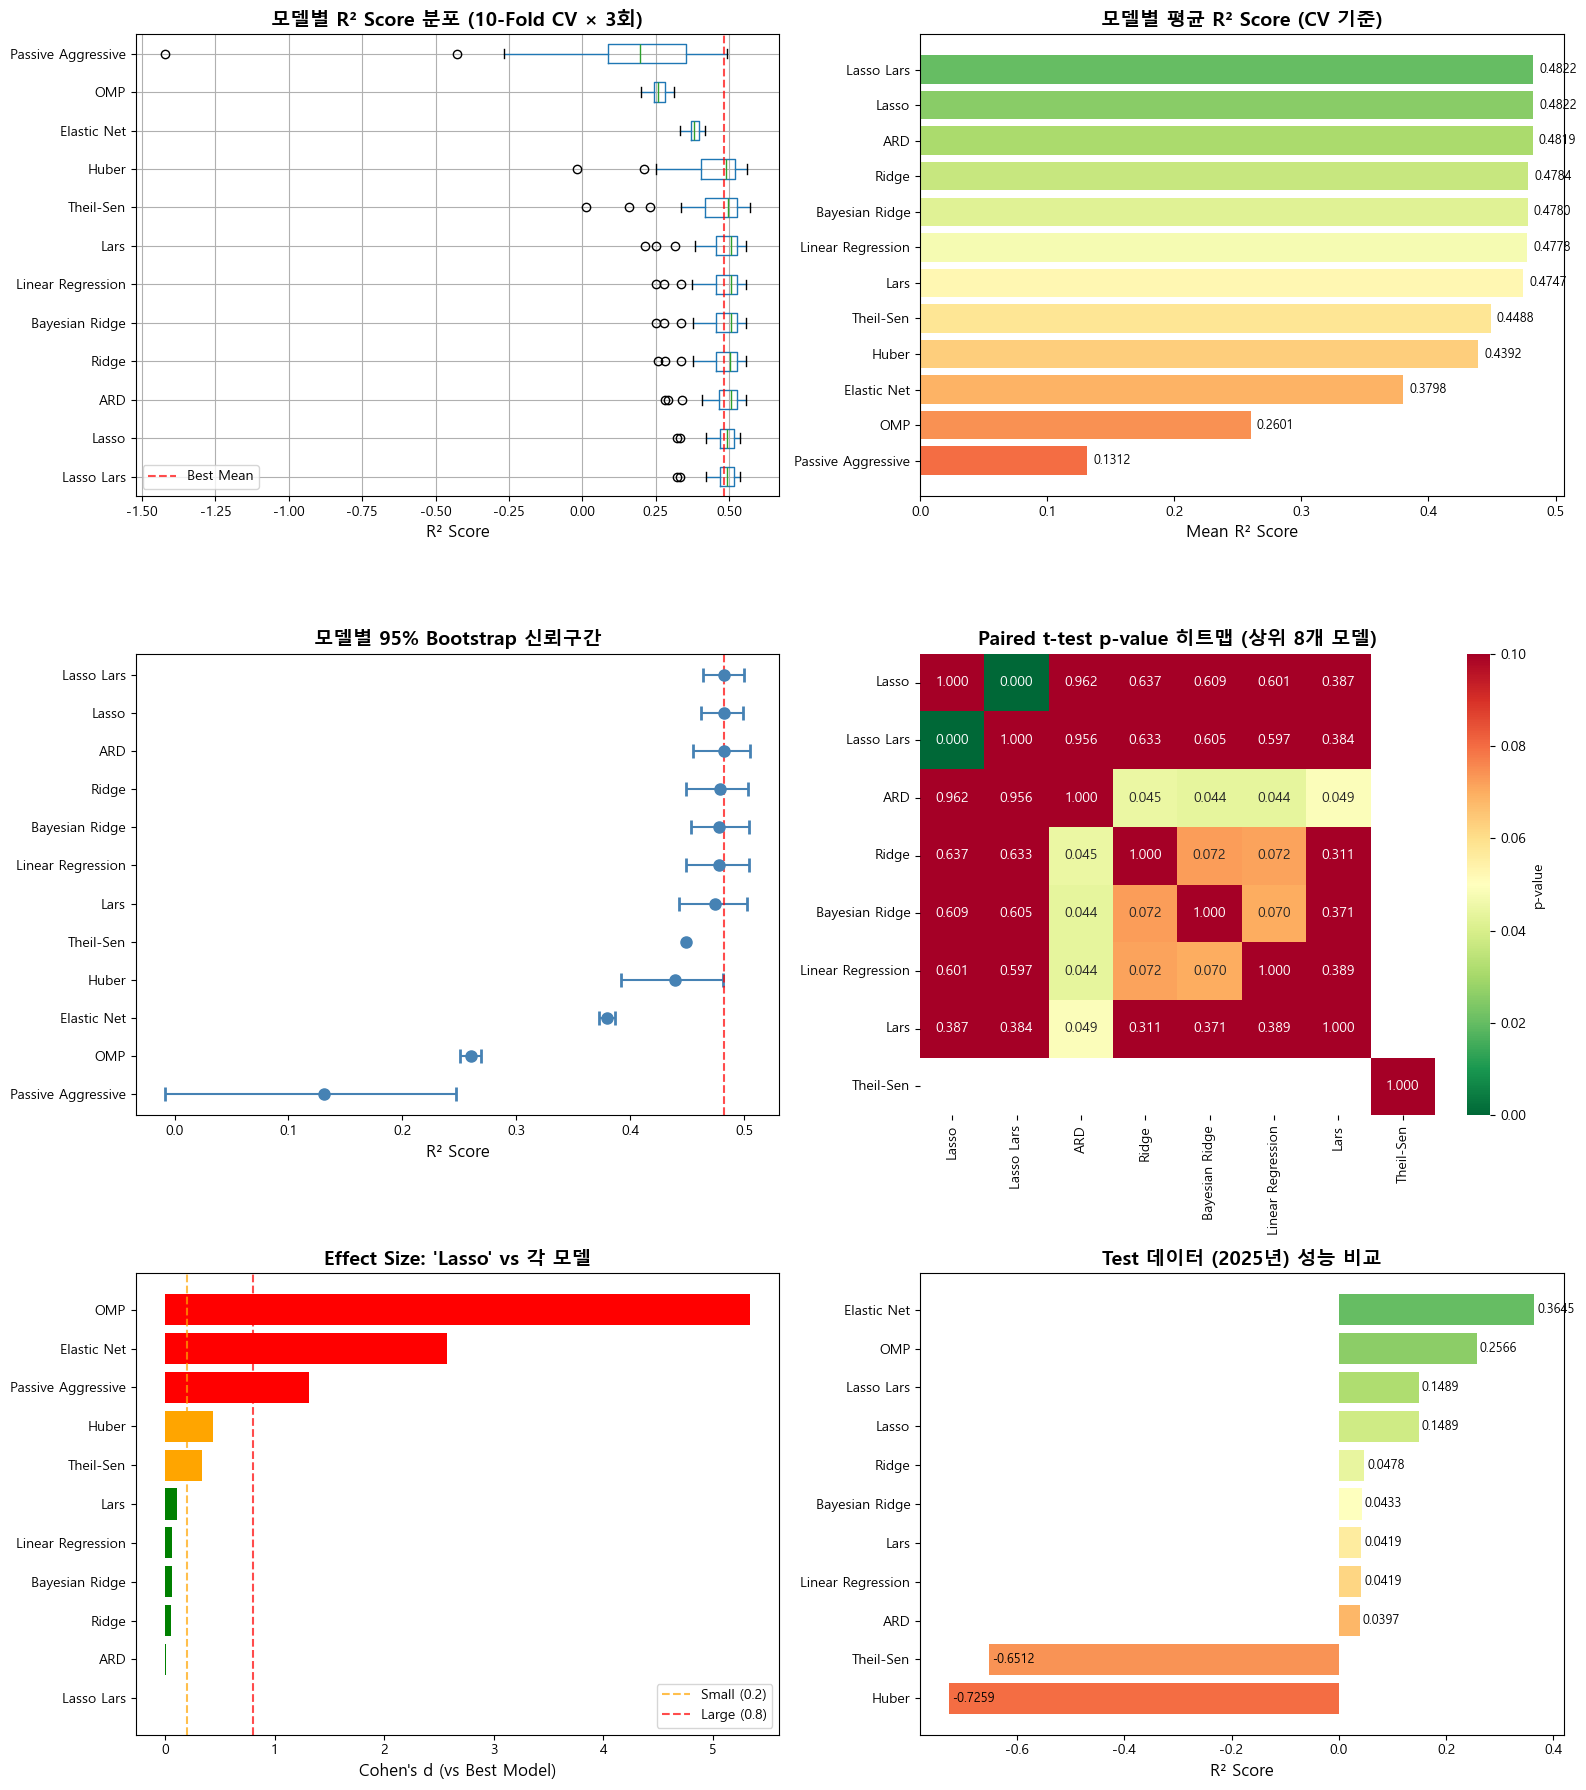


시각화 저장: C:\Users\Administrator\workspace\seoul-auction-prediction\data/model_comparison_visualization.png


In [59]:

# =============================================================================
# 15. 시각화
# =============================================================================
print("\n" + "=" * 80)
print("15. 시각화 생성")
print("=" * 80)

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 안정적인 모델만 필터링 (R² > 0인 모델)
stable_models = [col for col in cv_df.columns if cv_df[col].mean() > 0]
cv_df_stable = cv_df[stable_models]

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1) 모델별 R² Score 박스플롯
ax1 = axes[0, 0]
cv_df_stable_sorted = cv_df_stable[cv_df_stable.mean().sort_values(ascending=False).index]
cv_df_stable_sorted.boxplot(ax=ax1, vert=False)
ax1.set_xlabel('R² Score', fontsize=12)
ax1.set_title('모델별 R² Score 분포 (10-Fold CV × 3회)', fontsize=14, fontweight='bold')
ax1.axvline(x=cv_df_stable_sorted.mean().max(), color='red', linestyle='--', alpha=0.7, label='Best Mean')
ax1.legend()

# 2) 평균 R² Score 막대그래프
ax2 = axes[0, 1]
mean_scores = cv_df_stable.mean().sort_values(ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(mean_scores)))
bars = ax2.barh(mean_scores.index, mean_scores.values, color=colors)
ax2.set_xlabel('Mean R² Score', fontsize=12)
ax2.set_title('모델별 평균 R² Score (CV 기준)', fontsize=14, fontweight='bold')
for i, (idx, val) in enumerate(mean_scores.items()):
    ax2.text(val + 0.005, i, f'{val:.4f}', va='center', fontsize=9)

# 3) 95% 신뢰구간 플롯
ax3 = axes[1, 0]
bootstrap_stable = bootstrap_df[bootstrap_df['Mean R²'] > 0].sort_values('Mean R²', ascending=True)
y_pos = range(len(bootstrap_stable))
ax3.errorbar(bootstrap_stable['Mean R²'], y_pos, 
             xerr=[bootstrap_stable['Mean R²'] - bootstrap_stable['95% CI Lower'],
                   bootstrap_stable['95% CI Upper'] - bootstrap_stable['Mean R²']],
             fmt='o', capsize=5, capthick=2, color='steelblue', markersize=8)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(bootstrap_stable['Model'])
ax3.set_xlabel('R² Score', fontsize=12)
ax3.set_title('모델별 95% Bootstrap 신뢰구간', fontsize=14, fontweight='bold')
ax3.axvline(x=bootstrap_stable['Mean R²'].max(), color='red', linestyle='--', alpha=0.7)

# 4) Paired t-test p-value 히트맵 (상위 모델들)
ax4 = axes[1, 1]
top_models = stats_summary.head(8).index.tolist()
pvalue_matrix = pd.DataFrame(index=top_models, columns=top_models, dtype=float)

for m1 in top_models:
    for m2 in top_models:
        if m1 == m2:
            pvalue_matrix.loc[m1, m2] = 1.0
        else:
            _, p = ttest_rel(cv_df[m1], cv_df[m2])
            pvalue_matrix.loc[m1, m2] = p

sns.heatmap(pvalue_matrix.astype(float), annot=True, fmt='.3f', cmap='RdYlGn_r', 
            ax=ax4, vmin=0, vmax=0.1, cbar_kws={'label': 'p-value'})
ax4.set_title('Paired t-test p-value 히트맵 (상위 8개 모델)', fontsize=14, fontweight='bold')

# 5) Effect Size (Cohen's d) 막대그래프
ax5 = axes[2, 0]
effect_stable = effect_df[effect_df['Model'].isin(stable_models)].sort_values("Cohen's d", ascending=True)
colors_effect = ['green' if d < 0.2 else 'orange' if d < 0.8 else 'red' for d in effect_stable["Cohen's d"].abs()]
ax5.barh(effect_stable['Model'], effect_stable["Cohen's d"], color=colors_effect)
ax5.axvline(x=0.2, color='orange', linestyle='--', alpha=0.7, label='Small (0.2)')
ax5.axvline(x=0.8, color='red', linestyle='--', alpha=0.7, label='Large (0.8)')
ax5.set_xlabel("Cohen's d (vs Best Model)", fontsize=12)
ax5.set_title(f"Effect Size: '{best_model}' vs 각 모델", fontsize=14, fontweight='bold')
ax5.legend(loc='lower right')

# 6) Test 데이터 (2025) 성능 비교
ax6 = axes[2, 1]
test_stable = df_test[df_test['R² (Test)'] > -1].sort_values('R² (Test)', ascending=True)
colors_test = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(test_stable)))
ax6.barh(test_stable['Model'], test_stable['R² (Test)'], color=colors_test)
ax6.set_xlabel('R² Score', fontsize=12)
ax6.set_title('Test 데이터 (2025년) 성능 비교', fontsize=14, fontweight='bold')
for i, (idx, row) in enumerate(test_stable.iterrows()):
    ax6.text(row['R² (Test)'] + 0.005, i, f'{row["R² (Test)"]:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(f'{SAVE_PATH}/model_comparison_visualization.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print(f"\n시각화 저장: {SAVE_PATH}/model_comparison_visualization.png")


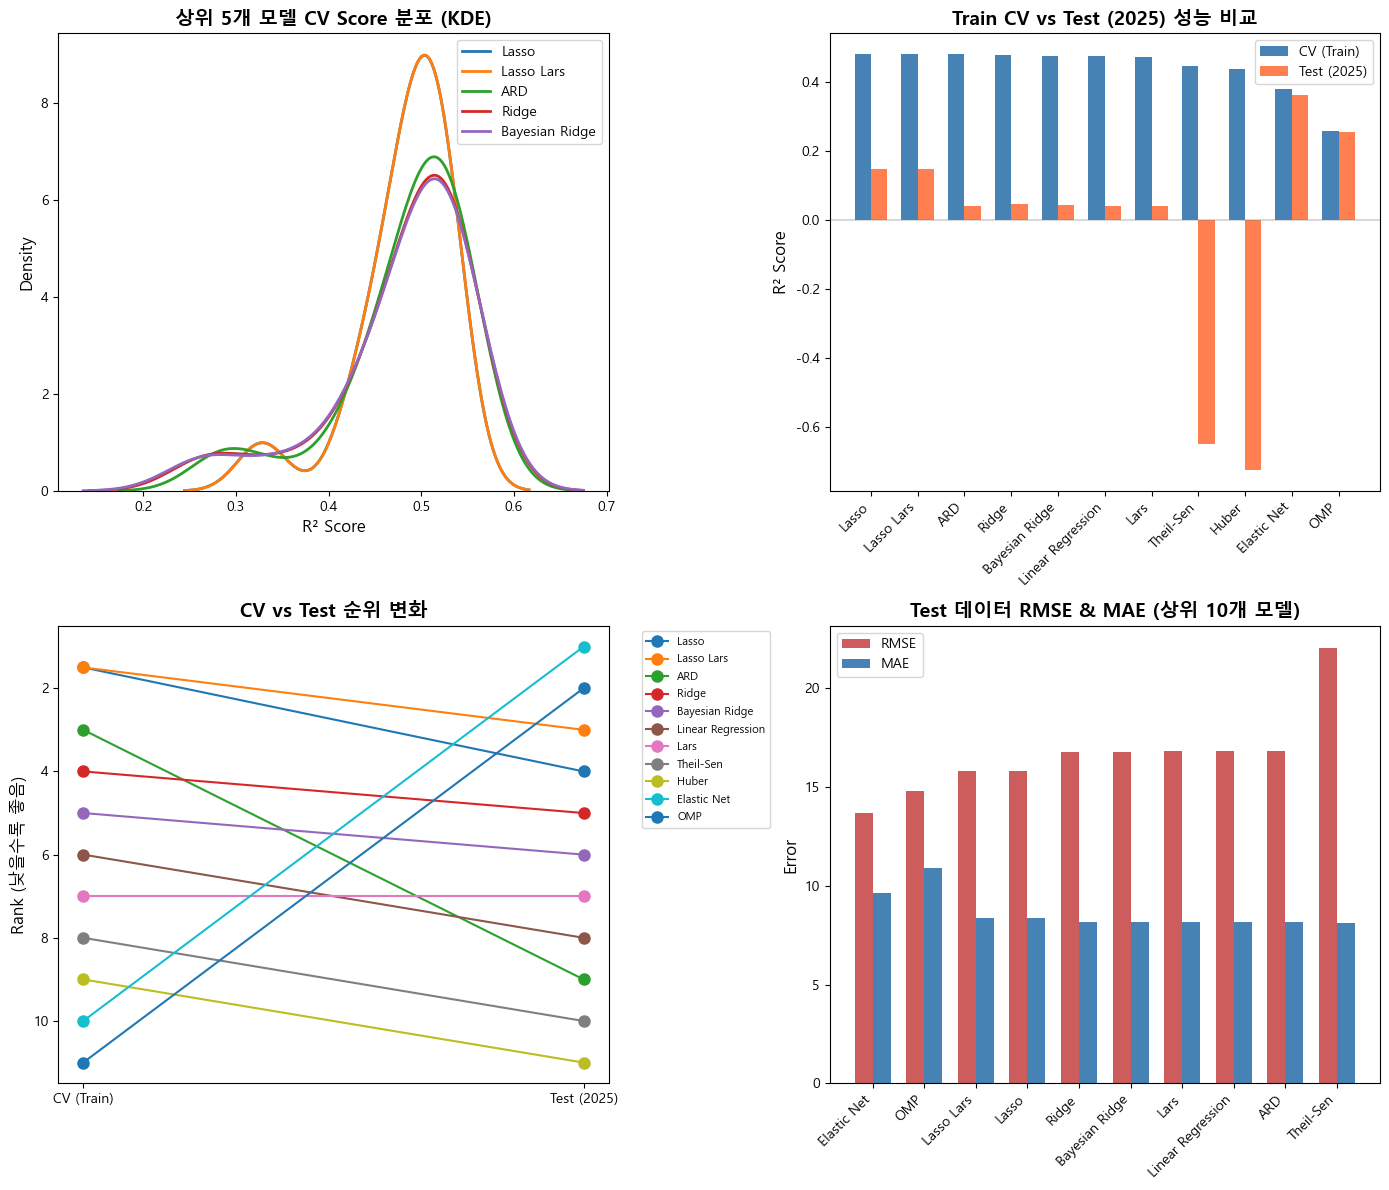

시각화 저장: C:\Users\Administrator\workspace\seoul-auction-prediction\data/model_comparison_visualization_2.png

결과 파일 저장 완료:
  - C:\Users\Administrator\workspace\seoul-auction-prediction\data/model_cv_scores.csv
  - C:\Users\Administrator\workspace\seoul-auction-prediction\data/model_statistics.csv
  - C:\Users\Administrator\workspace\seoul-auction-prediction\data/ttest_results.csv
  - C:\Users\Administrator\workspace\seoul-auction-prediction\data/bootstrap_ci.csv
  - C:\Users\Administrator\workspace\seoul-auction-prediction\data/test_results_2025.csv
  - C:\Users\Administrator\workspace\seoul-auction-prediction\data/model_comparison_visualization.png
  - C:\Users\Administrator\workspace\seoul-auction-prediction\data/model_comparison_visualization_2.png


In [60]:

# =============================================================================
# 16. 추가 시각화: CV Score 분포 비교
# =============================================================================
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 12))

# 1) 상위 5개 모델 KDE 플롯
ax1 = axes2[0, 0]
top_5 = stats_summary.head(5).index.tolist()
for model in top_5:
    if model in cv_df.columns:
        sns.kdeplot(cv_df[model], ax=ax1, label=model, linewidth=2)
ax1.set_xlabel('R² Score', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('상위 5개 모델 CV Score 분포 (KDE)', fontsize=14, fontweight='bold')
ax1.legend()

# 2) Train CV vs Test 성능 비교
ax2 = axes2[0, 1]
comparison_df = pd.merge(
    stats_summary.reset_index().rename(columns={'index': 'Model', 'Mean': 'CV Mean R²'})[['Model', 'CV Mean R²']],
    df_test[['Model', 'R² (Test)']],
    on='Model'
)
comparison_df = comparison_df[comparison_df['R² (Test)'] > -1].sort_values('CV Mean R²', ascending=False)

x = np.arange(len(comparison_df))
width = 0.35
ax2.bar(x - width/2, comparison_df['CV Mean R²'], width, label='CV (Train)', color='steelblue')
ax2.bar(x + width/2, comparison_df['R² (Test)'], width, label='Test (2025)', color='coral')
ax2.set_xticks(x)
ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax2.set_ylabel('R² Score', fontsize=12)
ax2.set_title('Train CV vs Test (2025) 성능 비교', fontsize=14, fontweight='bold')
ax2.legend()
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# 3) 모델 순위 비교 (CV vs Test)
ax3 = axes2[1, 0]
comparison_df['CV Rank'] = comparison_df['CV Mean R²'].rank(ascending=False)
comparison_df['Test Rank'] = comparison_df['R² (Test)'].rank(ascending=False)
for _, row in comparison_df.iterrows():
    ax3.plot([0, 1], [row['CV Rank'], row['Test Rank']], 'o-', markersize=8, label=row['Model'])
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['CV (Train)', 'Test (2025)'])
ax3.set_ylabel('Rank (낮을수록 좋음)', fontsize=12)
ax3.set_title('CV vs Test 순위 변화', fontsize=14, fontweight='bold')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax3.invert_yaxis()

# 4) RMSE & MAE 비교 (Test)
ax4 = axes2[1, 1]
test_metrics = df_test[df_test['R² (Test)'] > -1].sort_values('RMSE (Test)', ascending=True).head(10)
x = np.arange(len(test_metrics))
width = 0.35
ax4.bar(x - width/2, test_metrics['RMSE (Test)'], width, label='RMSE', color='indianred')
ax4.bar(x + width/2, test_metrics['MAE (Test)'], width, label='MAE', color='steelblue')
ax4.set_xticks(x)
ax4.set_xticklabels(test_metrics['Model'], rotation=45, ha='right')
ax4.set_ylabel('Error', fontsize=12)
ax4.set_title('Test 데이터 RMSE & MAE (상위 10개 모델)', fontsize=14, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.savefig(f'{SAVE_PATH}/model_comparison_visualization_2.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print(f"시각화 저장: {SAVE_PATH}/model_comparison_visualization_2.png")

print("\n결과 파일 저장 완료:")
print(f"  - {SAVE_PATH}/model_cv_scores.csv")
print(f"  - {SAVE_PATH}/model_statistics.csv")
print(f"  - {SAVE_PATH}/ttest_results.csv")
print(f"  - {SAVE_PATH}/bootstrap_ci.csv")
print(f"  - {SAVE_PATH}/test_results_2025.csv")
print(f"  - {SAVE_PATH}/model_comparison_visualization.png")
print(f"  - {SAVE_PATH}/model_comparison_visualization_2.png")

In [61]:
"""
================================================================================
서울 경매 데이터셋 - Tree 계열 모델 전체 비교 실험
================================================================================
포함 모델:
  [Basic] Decision Tree
  [Bagging] Bagging, Random Forest, Extra Trees
  [Boosting] AdaBoost, Gradient Boosting, HistGradient Boosting
  [External] XGBoost, LightGBM, CatBoost, NGBoost
================================================================================
"""

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score,
    mean_absolute_percentage_error
)
import time

# ============================================================
# 1. 데이터 로드 및 전처리
# ============================================================
print("=" * 70)
print("1. 데이터 로드 및 전처리")
print("=" * 70)

# 데이터 로드

# 타겟 변수 설정
TARGET = 'winning_bid_ratio'

# 제외할 컬럼 (ID, 날짜, 문자열 컬럼)
EXCLUDE_COLS = [
    'm_code', 'case_id', 'appraisal_date', 'sale_date', 
    'district', 'dong', 'purpose',
    TARGET
]

# 피처 선택
feature_cols = [col for col in df.columns if col not in EXCLUDE_COLS]
print(f"피처 수: {len(feature_cols)}")
print(f"피처 목록: {feature_cols}")

# X, y 분리
X = df[feature_cols].copy()
y = df[TARGET].copy()

# Train/Test 분리
print(f"Train set: {len(X_train)}, Test set: {len(X_test)}")


1. 데이터 로드 및 전처리
피처 수: 9
피처 목록: ['floor', 'land_area', 'building_area', 'appraisal_price', 'minimum_price', 'failed_bid_count', 'winning_bid_price', 'deposit', 'year']
Train set: 11133, Test set: 5307


In [62]:
!uv add ngboost

Resolved 35 packages in 7ms
Audited 34 packages in 8ms


In [63]:
# ============================================================
# 2. 모델 정의
# ============================================================
print("\n" + "=" * 70)
print("2. Tree 계열 모델 정의")
print("=" * 70)

# ──────────────────────────────────────────────────────────────
# Scikit-learn 기본 모델
# ──────────────────────────────────────────────────────────────
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor
)

# ──────────────────────────────────────────────────────────────
# 외부 라이브러리 (선택적 로드)
# ──────────────────────────────────────────────────────────────
xgb_available = False
lgbm_available = False
catboost_available = False
ngboost_available = False

try:
    from xgboost import XGBRegressor
    xgb_available = True
    print("✓ XGBoost 사용 가능")
except ImportError:
    print("✗ XGBoost 미설치 → pip install xgboost")

try:
    from lightgbm import LGBMRegressor
    lgbm_available = True
    print("✓ LightGBM 사용 가능")
except ImportError:
    print("✗ LightGBM 미설치 → pip install lightgbm")

try:
    from catboost import CatBoostRegressor
    catboost_available = True
    print("✓ CatBoost 사용 가능")
except ImportError:
    print("✗ CatBoost 미설치 → pip install catboost")

try:
    from ngboost import NGBRegressor
    ngboost_available = True
    print("✓ NGBoost 사용 가능")
except ImportError:
    print("✗ NGBoost 미설치 → pip install ngboost")


2. Tree 계열 모델 정의
✓ XGBoost 사용 가능
✓ LightGBM 사용 가능
✓ CatBoost 사용 가능
✓ NGBoost 사용 가능


In [64]:
# ──────────────────────────────────────────────────────────────
# 모델 딕셔너리 구성
# ──────────────────────────────────────────────────────────────
models = {}

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [A] Decision Tree 변형
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
models['DecisionTree_default'] = DecisionTreeRegressor(
    random_state=42
)

models['DecisionTree_shallow'] = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

models['DecisionTree_medium'] = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

models['DecisionTree_deep'] = DecisionTreeRegressor(
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [B] Bagging 계열
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
models['Bagging_default'] = BaggingRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

models['Bagging_tuned'] = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=15),
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

models['Bagging_large'] = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=20),
    n_estimators=200,
    max_samples=0.7,
    max_features=0.7,
    random_state=42,
    n_jobs=-1
)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [C] Random Forest 변형
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
models['RandomForest_default'] = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

models['RandomForest_shallow'] = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    min_samples_split=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

models['RandomForest_tuned'] = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

models['RandomForest_deep'] = RandomForestRegressor(
    n_estimators=200,
    max_depth=25,
    min_samples_split=2,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

models['RandomForest_large'] = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [D] Extra Trees 변형
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
models['ExtraTrees_default'] = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

models['ExtraTrees_tuned'] = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

models['ExtraTrees_deep'] = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=25,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [E] AdaBoost 변형
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
models['AdaBoost_default'] = AdaBoostRegressor(
    n_estimators=50,
    random_state=42
)

models['AdaBoost_weak'] = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

models['AdaBoost_medium'] = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=150,
    learning_rate=0.05,
    random_state=42
)

models['AdaBoost_strong'] = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=8),
    n_estimators=200,
    learning_rate=0.01,
    random_state=42
)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [F] Gradient Boosting (sklearn) 변형
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
models['GradientBoosting_default'] = GradientBoostingRegressor(
    n_estimators=100,
    random_state=42
)

models['GradientBoosting_fast'] = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.2,
    subsample=1.0,
    random_state=42
)

models['GradientBoosting_tuned'] = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=5,
    min_samples_leaf=3,
    subsample=0.8,
    random_state=42
)

models['GradientBoosting_slow'] = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)

models['GradientBoosting_large'] = GradientBoostingRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.02,
    subsample=0.7,
    random_state=42
)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [G] HistGradientBoosting (sklearn) 변형
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
models['HistGradientBoosting_default'] = HistGradientBoostingRegressor(
    random_state=42
)

models['HistGradientBoosting_fast'] = HistGradientBoostingRegressor(
    max_iter=100,
    max_depth=6,
    learning_rate=0.2,
    random_state=42
)

models['HistGradientBoosting_tuned'] = HistGradientBoostingRegressor(
    max_iter=200,
    max_depth=10,
    learning_rate=0.1,
    min_samples_leaf=20,
    l2_regularization=0.1,
    random_state=42
)

models['HistGradientBoosting_slow'] = HistGradientBoostingRegressor(
    max_iter=300,
    max_depth=8,
    learning_rate=0.05,
    min_samples_leaf=10,
    l2_regularization=0.2,
    random_state=42
)

models['HistGradientBoosting_large'] = HistGradientBoostingRegressor(
    max_iter=500,
    max_depth=12,
    learning_rate=0.03,
    l2_regularization=0.05,
    random_state=42
)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [H] XGBoost 변형 (설치된 경우)
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
if xgb_available:
    models['XGBoost_default'] = XGBRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    models['XGBoost_fast'] = XGBRegressor(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.2,
        subsample=1.0,
        colsample_bytree=1.0,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    models['XGBoost_tuned'] = XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    models['XGBoost_slow'] = XGBRegressor(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.5,
        reg_lambda=2.0,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    models['XGBoost_large'] = XGBRegressor(
        n_estimators=500,
        max_depth=8,
        learning_rate=0.02,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    # XGBoost DART (Dropout)
    models['XGBoost_DART'] = XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        booster='dart',
        rate_drop=0.1,
        skip_drop=0.5,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [I] LightGBM 변형 (설치된 경우)
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
if lgbm_available:
    models['LightGBM_default'] = LGBMRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    models['LightGBM_fast'] = LGBMRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.2,
        num_leaves=31,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    models['LightGBM_tuned'] = LGBMRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        num_leaves=50,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    models['LightGBM_slow'] = LGBMRegressor(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.05,
        num_leaves=40,
        subsample=0.7,
        colsample_bytree=0.7,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    models['LightGBM_large'] = LGBMRegressor(
        n_estimators=500,
        max_depth=12,
        learning_rate=0.02,
        num_leaves=100,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    # LightGBM DART
    models['LightGBM_DART'] = LGBMRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        boosting_type='dart',
        num_leaves=50,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    # LightGBM GOSS (Gradient-based One-Side Sampling)
    models['LightGBM_GOSS'] = LGBMRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        boosting_type='goss',
        num_leaves=50,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [J] CatBoost 변형 (설치된 경우)
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
if catboost_available:
    models['CatBoost_default'] = CatBoostRegressor(
        iterations=100,
        random_state=42,
        verbose=0
    )
    
    models['CatBoost_fast'] = CatBoostRegressor(
        iterations=100,
        depth=4,
        learning_rate=0.2,
        random_state=42,
        verbose=0
    )
    
    models['CatBoost_tuned'] = CatBoostRegressor(
        iterations=200,
        depth=6,
        learning_rate=0.1,
        l2_leaf_reg=3,
        subsample=0.8,
        random_state=42,
        verbose=0
    )
    
    models['CatBoost_slow'] = CatBoostRegressor(
        iterations=300,
        depth=5,
        learning_rate=0.05,
        l2_leaf_reg=5,
        subsample=0.7,
        random_state=42,
        verbose=0
    )
    
    models['CatBoost_large'] = CatBoostRegressor(
        iterations=500,
        depth=8,
        learning_rate=0.02,
        random_state=42,
        verbose=0
    )

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# [K] NGBoost (설치된 경우)
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
if ngboost_available:
    from sklearn.tree import DecisionTreeRegressor as DTR
    
    models['NGBoost_default'] = NGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42,
        verbose=False
    )
    
    models['NGBoost_tuned'] = NGBRegressor(
        Base=DTR(max_depth=4),
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
        verbose=False
    )

# 모델 목록 출력
print(f"\n총 {len(models)}개 모델 준비 완료")
print("\n모델 목록:")
for i, (name, _) in enumerate(models.items(), 1):
    print(f"  {i:2d}. {name}")



총 49개 모델 준비 완료

모델 목록:
   1. DecisionTree_default
   2. DecisionTree_shallow
   3. DecisionTree_medium
   4. DecisionTree_deep
   5. Bagging_default
   6. Bagging_tuned
   7. Bagging_large
   8. RandomForest_default
   9. RandomForest_shallow
  10. RandomForest_tuned
  11. RandomForest_deep
  12. RandomForest_large
  13. ExtraTrees_default
  14. ExtraTrees_tuned
  15. ExtraTrees_deep
  16. AdaBoost_default
  17. AdaBoost_weak
  18. AdaBoost_medium
  19. AdaBoost_strong
  20. GradientBoosting_default
  21. GradientBoosting_fast
  22. GradientBoosting_tuned
  23. GradientBoosting_slow
  24. GradientBoosting_large
  25. HistGradientBoosting_default
  26. HistGradientBoosting_fast
  27. HistGradientBoosting_tuned
  28. HistGradientBoosting_slow
  29. HistGradientBoosting_large
  30. XGBoost_default
  31. XGBoost_fast
  32. XGBoost_tuned
  33. XGBoost_slow
  34. XGBoost_large
  35. XGBoost_DART
  36. LightGBM_default
  37. LightGBM_fast
  38. LightGBM_tuned
  39. LightGBM_slow
  40. LightG

In [65]:
# ============================================================
# 3. 평가 함수 정의
# ============================================================
from sklearn.base import clone

def evaluate_model(model, X_train, X_test, y_train, y_test, cv_folds=5):
    """
    모델 학습 및 평가 수행
    """
    results = {}
    
    # 학습 시간 측정
    start_time = time.time()
    model.fit(X_train, y_train)
    results['train_time'] = time.time() - start_time
    
    # 예측 시간 측정
    start_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results['pred_time'] = time.time() - start_time
    
    # Train 평가 지표
    results['train_rmse'] = np.sqrt(mean_squared_error(y_train, y_pred_train))
    results['train_mae'] = mean_absolute_error(y_train, y_pred_train)
    results['train_r2'] = r2_score(y_train, y_pred_train)
    results['train_mape'] = mean_absolute_percentage_error(y_train, y_pred_train) * 100
    
    # Test 평가 지표
    results['test_rmse'] = np.sqrt(mean_squared_error(y_test, y_pred_test))
    results['test_mae'] = mean_absolute_error(y_test, y_pred_test)
    results['test_r2'] = r2_score(y_test, y_pred_test)
    results['test_mape'] = mean_absolute_percentage_error(y_test, y_pred_test) * 100
    
    # Cross Validation (수동 구현 - CatBoost 호환성 문제 해결)
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = []
    
    X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
    
    for train_idx, val_idx in kf.split(X_train_np):
        X_cv_train, X_cv_val = X_train_np[train_idx], X_train_np[val_idx]
        y_cv_train, y_cv_val = y_train_np[train_idx], y_train_np[val_idx]
        
        # 모델 복제 (CatBoost는 clone이 안될 수 있으므로 예외 처리)
        try:
            cv_model = clone(model)
        except:
            # CatBoost 등 clone이 안되는 경우 파라미터로 새 인스턴스 생성
            cv_model = model.__class__(**model.get_params())
        
        # CatBoost verbose 끄기
        if hasattr(cv_model, 'set_params'):
            try:
                cv_model.set_params(verbose=0)
            except:
                pass
        
        cv_model.fit(X_cv_train, y_cv_train)
        y_cv_pred = cv_model.predict(X_cv_val)
        cv_rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
        cv_scores.append(cv_rmse)
    
    results['cv_rmse_mean'] = np.mean(cv_scores)
    results['cv_rmse_std'] = np.std(cv_scores)
    
    # Overfitting 지표
    results['overfit_gap'] = results['train_rmse'] - results['test_rmse']
    results['overfit_ratio'] = results['test_rmse'] / results['train_rmse'] if results['train_rmse'] > 0 else 0
    
    return results

# ============================================================
# 4. 모델 학습 및 평가 실행
# ============================================================
print("\n" + "=" * 70)
print("3. 모델 학습 및 평가")
print("=" * 70)

all_results = []

for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n[{i:2d}/{len(models)}] {name}")
    print("-" * 50)
    
    try:
        results = evaluate_model(model, X_train, X_test, y_train, y_test)
        results['model'] = name
        all_results.append(results)
        
        print(f"  Train RMSE: {results['train_rmse']:.4f}")
        print(f"  Test RMSE:  {results['test_rmse']:.4f}")
        print(f"  CV RMSE:    {results['cv_rmse_mean']:.4f} (±{results['cv_rmse_std']:.4f})")
        print(f"  Test R²:    {results['test_r2']:.4f}")
        print(f"  Train Time: {results['train_time']:.2f}s")
        
    except Exception as e:
        print(f"  ⚠ 오류 발생: {str(e)}")


3. 모델 학습 및 평가

[ 1/49] DecisionTree_default
--------------------------------------------------
  Train RMSE: 0.0000
  Test RMSE:  4.8041
  CV RMSE:    5.3276 (±0.1962)
  Test R²:    0.9216
  Train Time: 0.08s

[ 2/49] DecisionTree_shallow
--------------------------------------------------
  Train RMSE: 7.9002
  Test RMSE:  8.6995
  CV RMSE:    8.0564 (±0.1258)
  Test R²:    0.7428
  Train Time: 0.02s

[ 3/49] DecisionTree_medium
--------------------------------------------------
  Train RMSE: 4.6104
  Test RMSE:  5.2587
  CV RMSE:    5.6231 (±0.2326)
  Test R²:    0.9060
  Train Time: 0.04s

[ 4/49] DecisionTree_deep
--------------------------------------------------
  Train RMSE: 1.7354
  Test RMSE:  4.6336
  CV RMSE:    5.0876 (±0.2425)
  Test R²:    0.9270
  Train Time: 0.06s

[ 5/49] Bagging_default
--------------------------------------------------
  Train RMSE: 1.2703
  Test RMSE:  3.3855
  CV RMSE:    3.5701 (±0.2025)
  Test R²:    0.9610
  Train Time: 5.48s

[ 6/49] Bagging_tu

In [66]:
# ============================================================
# 5. 결과 정리
# ============================================================
print("\n" + "=" * 70)
print("4. 결과 정리")
print("=" * 70)

# DataFrame 생성
results_df = pd.DataFrame(all_results)

# 컬럼 순서 정리
column_order = [
    'model',
    'test_rmse', 'test_mae', 'test_r2', 'test_mape',
    'cv_rmse_mean', 'cv_rmse_std',
    'train_rmse', 'train_mae', 'train_r2', 'train_mape',
    'overfit_gap', 'overfit_ratio',
    'train_time', 'pred_time'
]
results_df = results_df[column_order]

# Test RMSE 기준 정렬
results_df = results_df.sort_values('test_rmse').reset_index(drop=True)
results_df['rank'] = range(1, len(results_df) + 1)

# 순위를 첫 번째 컬럼으로
cols = ['rank'] + [c for c in results_df.columns if c != 'rank']
results_df = results_df[cols]

# 결과 출력
print("\n[Test RMSE 기준 전체 순위]")
print(results_df[['rank', 'model', 'test_rmse', 'cv_rmse_mean', 'test_r2', 'train_time']].to_string(index=False))

# ============================================================
# 6. 카테고리별 분석
# ============================================================
print("\n" + "=" * 70)
print("5. 카테고리별 최고 모델")
print("=" * 70)

categories = {
    'Decision Tree': [m for m in models.keys() if 'DecisionTree' in m],
    'Bagging': [m for m in models.keys() if 'Bagging' in m],
    'Random Forest': [m for m in models.keys() if 'RandomForest' in m],
    'Extra Trees': [m for m in models.keys() if 'ExtraTrees' in m],
    'AdaBoost': [m for m in models.keys() if 'AdaBoost' in m],
    'Gradient Boosting': [m for m in models.keys() if 'GradientBoosting_' in m],
    'HistGradient Boosting': [m for m in models.keys() if 'HistGradientBoosting' in m],
    'XGBoost': [m for m in models.keys() if 'XGBoost' in m],
    'LightGBM': [m for m in models.keys() if 'LightGBM' in m],
    'CatBoost': [m for m in models.keys() if 'CatBoost' in m],
    'NGBoost': [m for m in models.keys() if 'NGBoost' in m],
}

for category, model_names in categories.items():
    if model_names:
        cat_df = results_df[results_df['model'].isin(model_names)]
        if len(cat_df) > 0:
            best = cat_df.iloc[0]
            print(f"\n{category}:")
            print(f"  Best: {best['model']}")
            print(f"  Test RMSE: {best['test_rmse']:.4f}, R²: {best['test_r2']:.4f}")

# 전체 최고 모델
print("\n" + "─" * 50)
best_model = results_df.iloc[0]
print(f"\n🏆 전체 최고 모델: {best_model['model']}")
print(f"   Test RMSE: {best_model['test_rmse']:.4f}")
print(f"   Test R²:   {best_model['test_r2']:.4f}")
print(f"   CV RMSE:   {best_model['cv_rmse_mean']:.4f} (±{best_model['cv_rmse_std']:.4f})")



4. 결과 정리

[Test RMSE 기준 전체 순위]
 rank                        model  test_rmse  cv_rmse_mean  test_r2  train_time
    1                LightGBM_GOSS   2.235166      2.388916 0.983020    0.334623
    2               LightGBM_large   2.422914      2.574690 0.980047    2.014946
    3   HistGradientBoosting_tuned   2.456488      2.398525 0.979491    1.217193
    4              XGBoost_default   2.541833      2.575731 0.978041    0.310207
    5               LightGBM_tuned   2.547939      2.561186 0.977935    0.307644
    6   HistGradientBoosting_large   2.573550      2.528039 0.977489    2.184125
    7    HistGradientBoosting_fast   2.621679      2.615670 0.976639    0.498751
    8                LightGBM_fast   2.632259      2.605738 0.976450    0.158277
    9       GradientBoosting_tuned   2.644286      2.631418 0.976235    3.627663
   10    HistGradientBoosting_slow   2.653659      2.594810 0.976066    1.151019
   11             CatBoost_default   2.754412      2.840855 0.974214    0.464

In [67]:
# ============================================================
# 7. 결과 저장
# ============================================================
print("\n" + "=" * 70)
print("6. 결과 저장")
print("=" * 70)

# CSV 저장
output_path = 'tree_models_comparison_results_js.csv'
results_df.to_csv(output_path, index=False)
print(f"✓ 결과 저장: {output_path}")


6. 결과 저장
✓ 결과 저장: tree_models_comparison_results_js.csv


In [68]:
# ============================================================
# 10. 최종 요약
# ============================================================
print("\n" + "=" * 70)
print("9. 최종 요약")
print("=" * 70)

print("\n[상위 10개 모델]")
summary_cols = ['rank', 'model', 'test_rmse', 'test_r2', 'cv_rmse_mean', 'train_time']
print(results_df[summary_cols].head(10).to_string(index=False))

print("\n[모델 유형별 요약]")
type_summary = []
for category, model_names in categories.items():
    if model_names:
        cat_df = results_df[results_df['model'].isin(model_names)]
        if len(cat_df) > 0:
            type_summary.append({
                'Category': category,
                'Best_Model': cat_df.iloc[0]['model'],
                'Best_RMSE': cat_df.iloc[0]['test_rmse'],
                'Best_R2': cat_df.iloc[0]['test_r2'],
                'Avg_RMSE': cat_df['test_rmse'].mean(),
                'Avg_Time': cat_df['train_time'].mean()
            })

type_df = pd.DataFrame(type_summary).sort_values('Best_RMSE')
print(type_df.to_string(index=False))

print("\n" + "=" * 70)
print("✅ 모든 실험 완료!")
print("=" * 70)


9. 최종 요약

[상위 10개 모델]
 rank                      model  test_rmse  test_r2  cv_rmse_mean  train_time
    1              LightGBM_GOSS   2.235166 0.983020      2.388916    0.334623
    2             LightGBM_large   2.422914 0.980047      2.574690    2.014946
    3 HistGradientBoosting_tuned   2.456488 0.979491      2.398525    1.217193
    4            XGBoost_default   2.541833 0.978041      2.575731    0.310207
    5             LightGBM_tuned   2.547939 0.977935      2.561186    0.307644
    6 HistGradientBoosting_large   2.573550 0.977489      2.528039    2.184125
    7  HistGradientBoosting_fast   2.621679 0.976639      2.615670    0.498751
    8              LightGBM_fast   2.632259 0.976450      2.605738    0.158277
    9     GradientBoosting_tuned   2.644286 0.976235      2.631418    3.627663
   10  HistGradientBoosting_slow   2.653659 0.976066      2.594810    1.151019

[모델 유형별 요약]
             Category                 Best_Model  Best_RMSE  Best_R2  Avg_RMSE  Avg_Time
      

In [87]:
import joblib

# models 딕셔너리에서 LightGBM GOSS 선택
lightgbm_goss = models['LightGBM_GOSS']

# 학습 (이미 학습된 경우 생략)
lightgbm_goss.fit(X_train, y_train)

# 저장
joblib.dump(lightgbm_goss, 'lightgbm_goss_model.pkl')

# 불러오기
loaded_model = joblib.load('lightgbm_goss_model.pkl')

In [3]:
import joblib
import pandas as pd
import numpy as np

# ============================================================
# 1. 모델 불러오기
# ============================================================
loaded_model = joblib.load('../models/lightgbm_goss_model.pkl')

# ============================================================
# 2. 원본 데이터 로드 (m_code, case_id 포함)
# ============================================================
from glob import glob
source_files = glob("../data/raw/*.csv")

# 3-2. 전체 데이터 통합
df = pd.concat([pd.read_csv(file) for file in source_files])

# 타겟 및 제외 컬럼 설정
TARGET = 'winning_bid_ratio'
EXCLUDE_COLS = [
    'm_code', 'case_id', 'appraisal_date', 'sale_date', 
    'district', 'dong', 'purpose',
    TARGET
]

# 피처 컬럼
feature_cols = [col for col in df.columns if col not in EXCLUDE_COLS]

# 결측치 제거
X = df[feature_cols].copy()
y = df[TARGET].copy()
valid_mask = ~(X.isna().any(axis=1) | y.isna())

df_valid = df[valid_mask].reset_index(drop=True)
X_valid = X[valid_mask].reset_index(drop=True)
y_valid = y[valid_mask].reset_index(drop=True)

# Train/Test 분리 (동일한 random_state 사용)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_valid, y_valid, df_valid.index, 
    test_size=0.2, random_state=42
)

# ============================================================
# 3. 100개 샘플 예측
# ============================================================
# 테스트셋에서 100개 샘플 선택
sample_size = 100
sample_indices = idx_test[:sample_size]

X_sample = X_test.iloc[:sample_size]
y_sample = y_test.iloc[:sample_size]

# 예측
y_pred = loaded_model.predict(X_sample)

# ============================================================
# 4. 결과 DataFrame 생성 (m_code, case_id 포함)
# ============================================================
result_df = pd.DataFrame({
    'm_code': df_valid.loc[sample_indices, 'm_code'].values,
    'case_id': df_valid.loc[sample_indices, 'case_id'].values,
    'district': df_valid.loc[sample_indices, 'district'].values,
    'dong': df_valid.loc[sample_indices, 'dong'].values,
    'purpose': df_valid.loc[sample_indices, 'purpose'].values,
    'appraisal_price': df_valid.loc[sample_indices, 'appraisal_price'].values,
    'minimum_price': df_valid.loc[sample_indices, 'minimum_price'].values,
    'actual_ratio': y_sample.values,
    'predicted_ratio': y_pred,
    'error': y_sample.values - y_pred,
    'abs_error': np.abs(y_sample.values - y_pred)
})

# 예측 낙찰가 계산 (감정가 × 예측비율 / 100)
result_df['predicted_price'] = (
    result_df['appraisal_price'] * result_df['predicted_ratio'] / 100
).astype(int)

# 실제 낙찰가 계산
result_df['actual_price'] = (
    result_df['appraisal_price'] * result_df['actual_ratio'] / 100
).astype(int)

# 가격 오차
result_df['price_error'] = result_df['actual_price'] - result_df['predicted_price']

# ============================================================
# 5. 결과 출력
# ============================================================
print("=" * 80)
print("LightGBM GOSS 모델 - 테스트 데이터 100개 샘플 예측 결과")
print("=" * 80)

# 주요 컬럼만 출력
display_cols = [
    'case_id', 'district', 'purpose', 
    'appraisal_price', 'actual_ratio', 'predicted_ratio', 
    'error', 'actual_price', 'predicted_price', 'price_error'
]

print("\n[샘플 예측 결과 (상위 20개)]")
print(result_df[display_cols].head(20).to_string(index=False))

# ============================================================
# 6. 요약 통계
# ============================================================
print("\n" + "=" * 80)
print("예측 성능 요약")
print("=" * 80)

rmse = np.sqrt(np.mean(result_df['error'] ** 2))
mae = np.mean(result_df['abs_error'])
mape = np.mean(result_df['abs_error'] / result_df['actual_ratio']) * 100

print(f"RMSE (낙찰가율): {rmse:.4f}")
print(f"MAE (낙찰가율):  {mae:.4f}")
print(f"MAPE:            {mape:.2f}%")

print(f"\n평균 가격 오차:  {result_df['price_error'].mean():,.0f}원")
print(f"가격 오차 표준편차: {result_df['price_error'].std():,.0f}원")

# ============================================================
# 7. CSV 저장
# ============================================================
result_df.to_csv('prediction_sample_100.csv', index=False, encoding='utf-8-sig')
print("\n✓ 결과 저장: prediction_sample_100.csv")

# ============================================================
# 8. 오차 분포 확인
# ============================================================
print("\n[오차 분포]")
print(f"  오차 ≤ 1%:  {(result_df['abs_error'] <= 1).sum()}개")
print(f"  오차 ≤ 3%:  {(result_df['abs_error'] <= 3).sum()}개")
print(f"  오차 ≤ 5%:  {(result_df['abs_error'] <= 5).sum()}개")
print(f"  오차 ≤ 10%: {(result_df['abs_error'] <= 10).sum()}개")
print(f"  오차 > 10%: {(result_df['abs_error'] > 10).sum()}개")

KeyError: 'winning_bid_ratio'

In [ ]:
"""
================================================================================
LightGBM GOSS vs 2-Stage 모델 성능 비교
================================================================================
"""

import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# 1. 모델 로드
# ============================================================
print("=" * 70)
print("1. 모델 로드")
print("=" * 70)

# 모델 파일 경로 (로컬 환경에 맞게 수정)
LGBM_PATH = '../models/lightgbm_goss_model.pkl'
CLASSIFIER_PATH = '../models/2stage_classifier__1_.pkl'
HUBER_SUCCESS_PATH = '../models/2stage_huber_success__1_.pkl'
HUBER_FAIL_PATH = '../models/2stage_huber_fail__1_.pkl'
DATA_PATH = '../data/seoul_auction_featured_dataset_final_0128.csv'

# LightGBM GOSS
lgbm_model = joblib.load(LGBM_PATH)
print(f"✓ LightGBM GOSS 로드 완료")

# 2-Stage 모델
classifier = joblib.load(CLASSIFIER_PATH)
huber_success = joblib.load(HUBER_SUCCESS_PATH)
huber_fail = joblib.load(HUBER_FAIL_PATH)
print(f"✓ 2-Stage 모델 로드 완료 (Classifier + Huber Success + Huber Fail)")

# ============================================================
# 2. 모델 피처 확인
# ============================================================
print("\n" + "=" * 70)
print("2. 모델 피처 확인")
print("=" * 70)

# LightGBM 피처
if hasattr(lgbm_model, 'feature_name_'):
    lgbm_features = lgbm_model.feature_name_
elif hasattr(lgbm_model, 'booster_'):
    lgbm_features = lgbm_model.booster_.feature_name()
else:
    lgbm_features = None

print(f"LightGBM 피처 수: {lgbm_model.n_features_in_}")
print(f"LightGBM 피처: {lgbm_features}")

# 2-Stage 피처
if hasattr(classifier, 'feature_names_in_'):
    stage2_features = list(classifier.feature_names_in_)
elif hasattr(classifier, 'feature_name_'):
    stage2_features = classifier.feature_name_
else:
    stage2_features = None

stage2_n_features = classifier.n_features_in_ if hasattr(classifier, 'n_features_in_') else 'N/A'
print(f"\n2-Stage Classifier 피처 수: {stage2_n_features}")
print(f"2-Stage Classifier 피처: {stage2_features}")

# ============================================================
# 3. 데이터 로드
# ============================================================
print("\n" + "=" * 70)
print("3. 데이터 로드")
print("=" * 70)

df = pd.read_csv(DATA_PATH)
print(f"데이터 shape: {df.shape}")

TARGET = 'winning_bid_ratio'

# ============================================================
# 4. 데이터 준비
# ============================================================
print("\n" + "=" * 70)
print("4. 데이터 준비")
print("=" * 70)

# 필요한 모든 피처 수집
all_features = set()
if lgbm_features:
    all_features.update(lgbm_features)
if stage2_features:
    all_features.update(stage2_features)

# 누락 피처 확인
missing_features = [f for f in all_features if f not in df.columns]
if missing_features:
    print(f"⚠ 데이터에 없는 피처: {missing_features}")

# 결측치 제거
feature_cols = [f for f in all_features if f in df.columns]
valid_mask = ~(df[feature_cols].isna().any(axis=1) | df[TARGET].isna())
df_valid = df[valid_mask].reset_index(drop=True)
print(f"유효 데이터 수: {len(df_valid)}")

# Train/Test 분리 (random_state=42로 동일하게)
y = df_valid[TARGET]
train_idx, test_idx = train_test_split(
    df_valid.index, test_size=0.2, random_state=42
)

df_test = df_valid.loc[test_idx].reset_index(drop=True)
y_test = df_test[TARGET].values
print(f"Test 데이터 수: {len(df_test)}")

# ============================================================
# 5. LightGBM GOSS 예측
# ============================================================
print("\n" + "=" * 70)
print("5. LightGBM GOSS 예측")
print("=" * 70)

if lgbm_features:
    X_test_lgbm = df_test[lgbm_features]
    y_pred_lgbm = lgbm_model.predict(X_test_lgbm)
    
    lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
    lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)
    lgbm_r2 = r2_score(y_test, y_pred_lgbm)
    lgbm_mape = np.mean(np.abs(y_test - y_pred_lgbm) / y_test) * 100
    
    print(f"RMSE: {lgbm_rmse:.4f}")
    print(f"MAE:  {lgbm_mae:.4f}")
    print(f"R²:   {lgbm_r2:.4f}")
    print(f"MAPE: {lgbm_mape:.2f}%")
else:
    print("⚠ LightGBM 피처를 확인할 수 없습니다.")
    y_pred_lgbm = None
    lgbm_rmse = lgbm_mae = lgbm_r2 = lgbm_mape = None

# ============================================================
# 6. 2-Stage 모델 예측
# ============================================================
print("\n" + "=" * 70)
print("6. 2-Stage 모델 예측")
print("=" * 70)

if stage2_features:
    X_test_2stage = df_test[stage2_features]
    
    # Stage 1: 성공/실패 분류
    y_class_pred = classifier.predict(X_test_2stage)
    
    success_count = sum(y_class_pred)
    fail_count = len(y_class_pred) - success_count
    print(f"분류 결과 - 성공 예측: {success_count}개, 실패 예측: {fail_count}개")
    
    # Stage 2: 조건부 회귀
    y_pred_2stage = np.zeros(len(X_test_2stage))
    
    success_mask = y_class_pred == 1
    fail_mask = y_class_pred == 0
    
    if sum(success_mask) > 0:
        y_pred_2stage[success_mask] = huber_success.predict(X_test_2stage[success_mask])
    if sum(fail_mask) > 0:
        y_pred_2stage[fail_mask] = huber_fail.predict(X_test_2stage[fail_mask])
    
    stage2_rmse = np.sqrt(mean_squared_error(y_test, y_pred_2stage))
    stage2_mae = mean_absolute_error(y_test, y_pred_2stage)
    stage2_r2 = r2_score(y_test, y_pred_2stage)
    stage2_mape = np.mean(np.abs(y_test - y_pred_2stage) / y_test) * 100
    
    print(f"\nRMSE: {stage2_rmse:.4f}")
    print(f"MAE:  {stage2_mae:.4f}")
    print(f"R²:   {stage2_r2:.4f}")
    print(f"MAPE: {stage2_mape:.2f}%")
else:
    print("⚠ 2-Stage 피처를 확인할 수 없습니다.")
    y_pred_2stage = None
    stage2_rmse = stage2_mae = stage2_r2 = stage2_mape = None

# ============================================================
# 7. 성능 비교 요약
# ============================================================
print("\n" + "=" * 70)
print("7. 성능 비교 요약")
print("=" * 70)

if y_pred_lgbm is not None and y_pred_2stage is not None:
    comparison_df = pd.DataFrame({
        'Model': ['LightGBM GOSS', '2-Stage (Classifier + Huber)'],
        'RMSE': [lgbm_rmse, stage2_rmse],
        'MAE': [lgbm_mae, stage2_mae],
        'R²': [lgbm_r2, stage2_r2],
        'MAPE (%)': [lgbm_mape, stage2_mape]
    })
    
    print(comparison_df.to_string(index=False))
    
    # 승자 표시
    print("\n" + "-" * 50)
    print("[비교 결과]")
    
    if lgbm_rmse < stage2_rmse:
        rmse_winner = "LightGBM GOSS"
        print(f"✓ RMSE: LightGBM GOSS 승 ({lgbm_rmse:.4f} < {stage2_rmse:.4f})")
    else:
        rmse_winner = "2-Stage"
        print(f"✓ RMSE: 2-Stage 승 ({stage2_rmse:.4f} < {lgbm_rmse:.4f})")
    
    if lgbm_mae < stage2_mae:
        mae_winner = "LightGBM GOSS"
        print(f"✓ MAE:  LightGBM GOSS 승 ({lgbm_mae:.4f} < {stage2_mae:.4f})")
    else:
        mae_winner = "2-Stage"
        print(f"✓ MAE:  2-Stage 승 ({stage2_mae:.4f} < {lgbm_mae:.4f})")
    
    if lgbm_r2 > stage2_r2:
        r2_winner = "LightGBM GOSS"
        print(f"✓ R²:   LightGBM GOSS 승 ({lgbm_r2:.4f} > {stage2_r2:.4f})")
    else:
        r2_winner = "2-Stage"
        print(f"✓ R²:   2-Stage 승 ({stage2_r2:.4f} > {lgbm_r2:.4f})")
    
    if lgbm_mape < stage2_mape:
        mape_winner = "LightGBM GOSS"
        print(f"✓ MAPE: LightGBM GOSS 승 ({lgbm_mape:.2f}% < {stage2_mape:.2f}%)")
    else:
        mape_winner = "2-Stage"
        print(f"✓ MAPE: 2-Stage 승 ({stage2_mape:.2f}% < {lgbm_mape:.2f}%)")

# ============================================================
# 8. 오차 분포 비교
# ============================================================
print("\n" + "=" * 70)
print("8. 오차 분포 비교")
print("=" * 70)

if y_pred_lgbm is not None and y_pred_2stage is not None:
    lgbm_errors = np.abs(y_test - y_pred_lgbm)
    stage2_errors = np.abs(y_test - y_pred_2stage)
    
    print(f"{'오차 범위':<12} {'LightGBM GOSS':<22} {'2-Stage':<22} {'Winner':<12}")
    print("-" * 68)
    
    thresholds = [1, 3, 5, 10]
    for t in thresholds:
        lgbm_count = (lgbm_errors <= t).sum()
        stage2_count = (stage2_errors <= t).sum()
        lgbm_pct = lgbm_count / len(lgbm_errors) * 100
        stage2_pct = stage2_count / len(stage2_errors) * 100
        winner = "LGBM" if lgbm_count > stage2_count else ("2-Stage" if stage2_count > lgbm_count else "Tie")
        print(f"≤ {t}%{'':<8} {lgbm_count:>5}개 ({lgbm_pct:>5.1f}%){'':<5} {stage2_count:>5}개 ({stage2_pct:>5.1f}%){'':<5} {winner}")
    
    lgbm_over10 = (lgbm_errors > 10).sum()
    stage2_over10 = (stage2_errors > 10).sum()
    winner = "LGBM" if lgbm_over10 < stage2_over10 else ("2-Stage" if stage2_over10 < lgbm_over10 else "Tie")
    print(f"> 10%{'':<7} {lgbm_over10:>5}개 ({lgbm_over10/len(lgbm_errors)*100:>5.1f}%){'':<5} {stage2_over10:>5}개 ({stage2_over10/len(stage2_errors)*100:>5.1f}%){'':<5} {winner}")

# ============================================================
# 9. 샘플 예측 비교 (20개)
# ============================================================
print("\n" + "=" * 70)
print("9. 샘플 예측 비교 (20개)")
print("=" * 70)

if y_pred_lgbm is not None and y_pred_2stage is not None:
    sample_df = pd.DataFrame({
        'case_id': df_test['case_id'].values[:20],
        'district': df_test['district'].values[:20],
        'actual': np.round(y_test[:20], 2),
        'lgbm_pred': np.round(y_pred_lgbm[:20], 2),
        'lgbm_err': np.round(np.abs(y_test[:20] - y_pred_lgbm[:20]), 2),
        '2stg_pred': np.round(y_pred_2stage[:20], 2),
        '2stg_err': np.round(np.abs(y_test[:20] - y_pred_2stage[:20]), 2)
    })
    
    sample_df['winner'] = np.where(
        sample_df['lgbm_err'] < sample_df['2stg_err'], 
        'LGBM', 
        np.where(sample_df['lgbm_err'] > sample_df['2stg_err'], '2Stg', 'Tie')
    )
    
    print(sample_df.to_string(index=False))
    
    lgbm_wins = (sample_df['winner'] == 'LGBM').sum()
    stage2_wins = (sample_df['winner'] == '2Stg').sum()
    ties = (sample_df['winner'] == 'Tie').sum()
    
    print(f"\n[20개 샘플 중 승리 횟수]")
    print(f"  LightGBM GOSS: {lgbm_wins}개")
    print(f"  2-Stage:       {stage2_wins}개")
    print(f"  동점:          {ties}개")

# ============================================================
# 10. 최종 결론
# ============================================================
print("\n" + "=" * 70)
print("10. 최종 결론")
print("=" * 70)

if y_pred_lgbm is not None and y_pred_2stage is not None:
    scores = {'LightGBM GOSS': 0, '2-Stage': 0}
    
    if lgbm_rmse < stage2_rmse: scores['LightGBM GOSS'] += 1
    else: scores['2-Stage'] += 1
    
    if lgbm_mae < stage2_mae: scores['LightGBM GOSS'] += 1
    else: scores['2-Stage'] += 1
    
    if lgbm_r2 > stage2_r2: scores['LightGBM GOSS'] += 1
    else: scores['2-Stage'] += 1
    
    if lgbm_mape < stage2_mape: scores['LightGBM GOSS'] += 1
    else: scores['2-Stage'] += 1
    
    print(f"지표별 승리 횟수:")
    print(f"  LightGBM GOSS: {scores['LightGBM GOSS']}/4")
    print(f"  2-Stage:       {scores['2-Stage']}/4")
    
    if scores['LightGBM GOSS'] > scores['2-Stage']:
        print(f"\n🏆 최종 승자: LightGBM GOSS")
    elif scores['2-Stage'] > scores['LightGBM GOSS']:
        print(f"\n🏆 최종 승자: 2-Stage Model")
    else:
        print(f"\n🏆 최종 결과: 무승부")

print("\n" + "=" * 70)
print("✅ 비교 완료!")
print("=" * 70)

In [43]:
# 1. X_train과 X_test에서 이름이 중복된 컬럼 제거 (첫 번째 것만 남김)
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# 2. 피처 개수 확인
print(f"✅ 중복 제거 후 피처 수: {X_train.shape[1]}개")
print(f"✅ 최종 피처 목록 (상위 10개): {X_train.columns[:10].tolist()}")

# 3. 모델 학습 재개
# model.fit(X_train, y_train)

✅ 중복 제거 후 피처 수: 23개
✅ 최종 피처 목록 (상위 10개): ['floor', 'land_area', 'building_area', 'appraisal_price', 'minimum_price', 'failed_bid_count', 'minimum_price_ratio', 'deposit_ratio', 'land_building_ratio', 'price_per_area']



🌳 STEP 13: 트리 모델 패밀리 비교

[13-1] 트리 모델 정의
   총 4개 모델 준비 완료

[13-2] 모델 학습 및 평가

   [Random Forest]
      MAE:  6.6935
      RMSE: 9.9254
      R²:   0.6652
      학습 시간: 0.82초

   [LightGBM]
      MAE:  6.6394
      RMSE: 9.9088
      R²:   0.6663
      학습 시간: 2.53초

   [XGBoost]
      MAE:  6.9549
      RMSE: 10.4558
      R²:   0.6284
      학습 시간: 2.93초

   [CatBoost]
      MAE:  6.5882
      RMSE: 9.6656
      R²:   0.6825
      학습 시간: 0.46초

[13-3] 성능 비교표

성능 순위 (MAE 기준):


,Model,MAE,RMSE,R²,Train Time (s)
3,CatBoost,6.588194,9.665600,0.682471,0.460458
1,LightGBM,6.639364,9.908780,0.666293,2.534138
0,Random Forest,6.693537,9.925386,0.665173,0.820605
2,XGBoost,6.954885,10.455832,0.628428,2.928700



🏆 최고 성능 모델: CatBoost (MAE 6.5882)

[13-4] 전체 모델 비교 (Baseline 포함)

전체 모델 성능:


,Model,MAE,RMSE,R²
5,CatBoost,6.588194,9.665600,0.682471
3,LightGBM,6.639364,9.908780,0.666293
2,Random Forest,6.693537,9.925386,0.665173
4,XGBoost,6.954885,10.455832,0.628428
1,Linear Regression,7.083755,10.787966,0.604447
0,Baseline (평균),12.288795,17.192241,-0.004594



개선율 (Baseline 대비):
   Linear:       42.4%
   CatBoost: 46.4%

개선율 (Linear 대비):
   CatBoost: 7.0%

[13-5] 통계 검정 (최고 모델 vs Linear)

가설 검정:
   H0: CatBoost = Linear (차이 없음)
   H1: CatBoost < Linear (CatBoost가 더 좋음)

검정 결과:
   - t-통계량: 7.584
   - p-value:  0.000000
   - Cohen's d: 0.065

✅ 결론: p < 0.05 → H0 기각
   CatBoost가 Linear보다 통계적으로 유의하게 우수!
   효과 크기: 매우 작은 효과 (d=0.065)

[13-6] 시각화


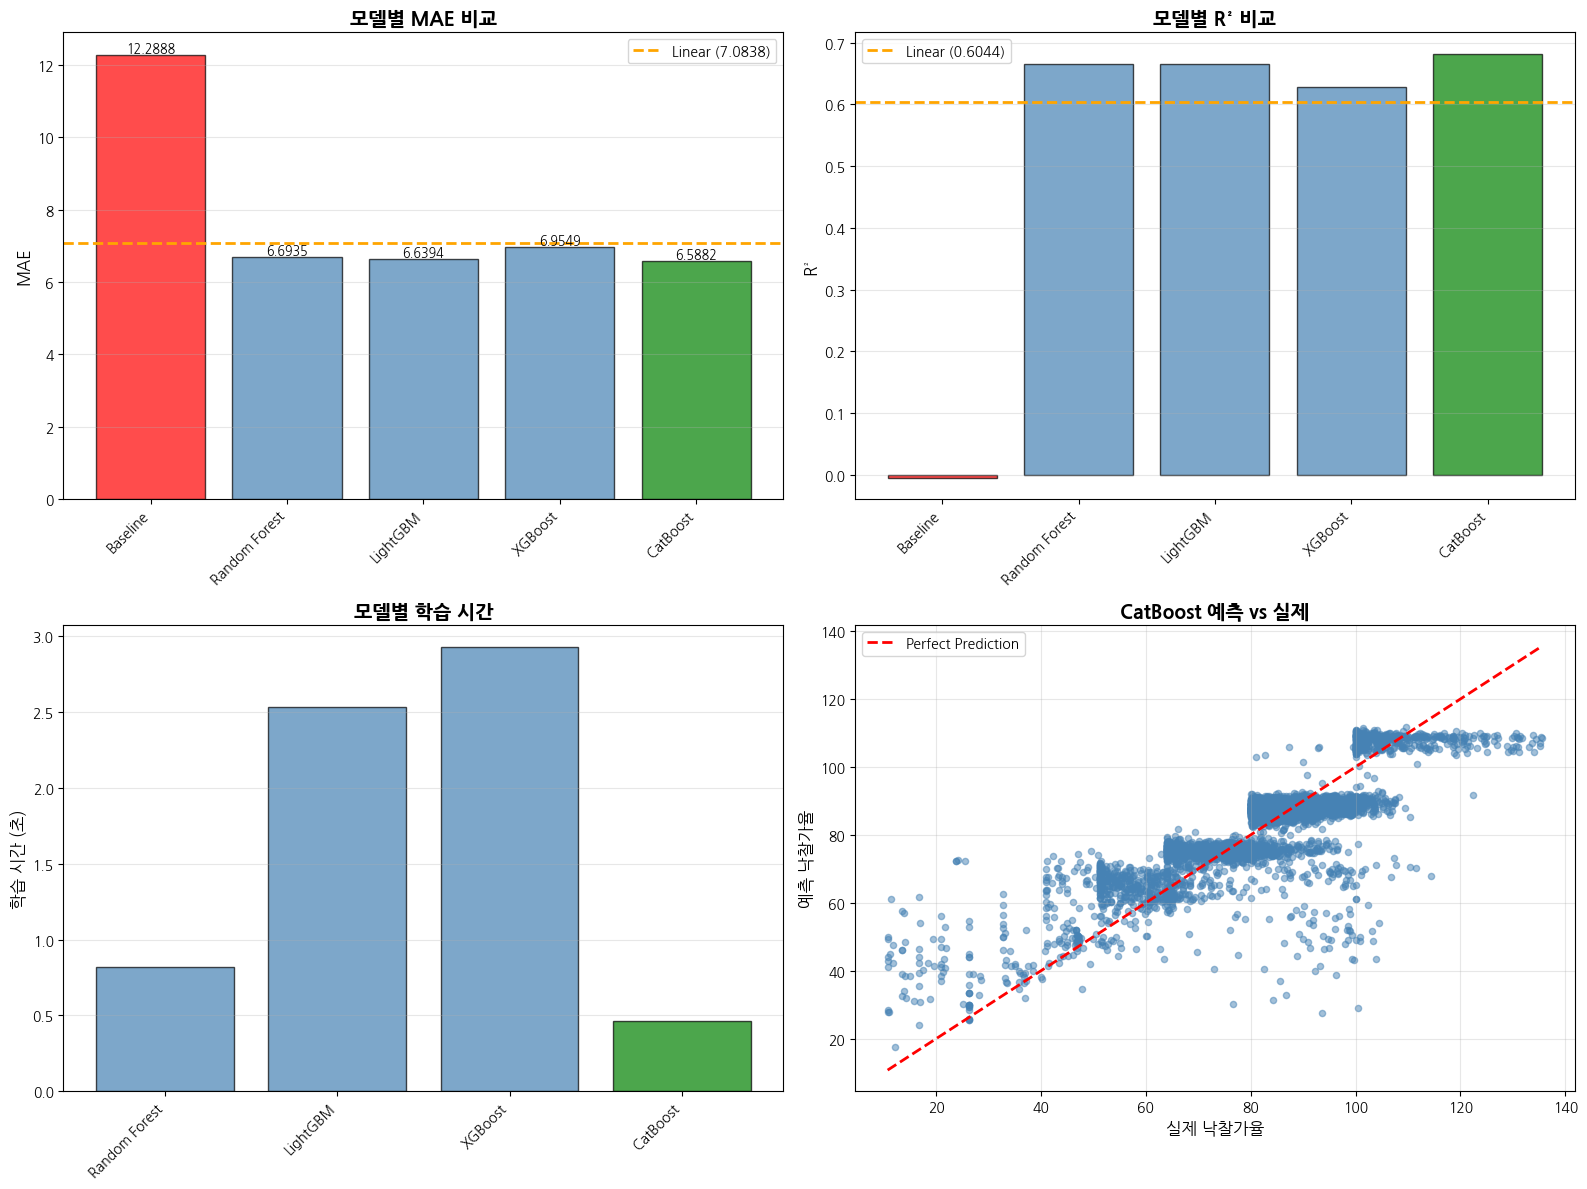


✅ 트리 모델 비교 완료!

📊 최종 결과:

[Baseline]
   MAE: 12.2888

[Linear Regression]
   MAE: 7.0838
   개선율: 42.4% (vs Baseline)

[최고 트리 모델: CatBoost]
   MAE: 6.5882
   개선율: 46.4% (vs Baseline)
   개선율: 7.0% (vs Linear)

통계 검정:
   p-value: 0.000000
   통계적 유의성: ✅ 유의함
   효과 크기: 작은 (d=0.065)

🎯 다음 단계:
   1. CatBoost SHAP 분석
   2. Feature Importance 확인
   3. 하이퍼파라미터 튜닝 (선택)
   4. 경제 지표 추가 (선택)


✅ 최종 모델 'CatBoost' 저장 완료


In [44]:
# ============================================================
# STEP 13: 트리 모델 패밀리 비교
# ============================================================

print("\n" + "=" * 80)
print("🌳 STEP 13: 트리 모델 패밀리 비교")
print("=" * 80)

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import time

# ============================================================
# 13-1. 모델 정의
# ============================================================

print("\n[13-1] 트리 모델 정의")

models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=100,
        max_depth=15,
        learning_rate=0.1,
        random_state=42,
        verbose=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=100,
        max_depth=15,
        learning_rate=0.1,
        random_state=42,
        verbosity=0
    ),
    'CatBoost': CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )
}

print(f"   총 {len(models)}개 모델 준비 완료")

# ============================================================
# 13-2. 모델 학습 및 평가
# ============================================================

print("\n[13-2] 모델 학습 및 평가")

results = {}

for name, model in models.items():
    print(f"\n   [{name}]")

    # 학습 시작
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # 예측
    y_pred = model.predict(X_test)

    # 평가
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # 저장
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Train Time': train_time
    }

    print(f"      MAE:  {mae:.4f}")
    print(f"      RMSE: {rmse:.4f}")
    print(f"      R²:   {r2:.4f}")
    print(f"      학습 시간: {train_time:.2f}초")

# ============================================================
# 13-3. 성능 비교표
# ============================================================

print("\n[13-3] 성능 비교표")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[m]['MAE'] for m in results],
    'RMSE': [results[m]['RMSE'] for m in results],
    'R²': [results[m]['R²'] for m in results],
    'Train Time (s)': [results[m]['Train Time'] for m in results]
}).sort_values('MAE')

print("\n성능 순위 (MAE 기준):")
display(comparison_df)

# 최고 모델
best_model_name = comparison_df.iloc[0]['Model']
best_mae = comparison_df.iloc[0]['MAE']

print(f"\n🏆 최고 성능 모델: {best_model_name} (MAE {best_mae:.4f})")

# ============================================================
# 13-4. Baseline & Linear와 비교
# ============================================================

print("\n[13-4] 전체 모델 비교 (Baseline 포함)")

# 전체 비교표
all_comparison = pd.DataFrame({
    'Model': ['Baseline (평균)', 'Linear Regression'] + list(results.keys()),
    'MAE': [mae_baseline, mae_linear] + [results[m]['MAE'] for m in results],
    'RMSE': [rmse_baseline, rmse_linear] + [results[m]['RMSE'] for m in results],
    'R²': [r2_baseline, r2_linear] + [results[m]['R²'] for m in results]
}).sort_values('MAE')

print("\n전체 모델 성능:")
display(all_comparison)

# Baseline 대비 개선율
best_improvement = (mae_baseline - best_mae) / mae_baseline * 100
linear_improvement = (mae_baseline - mae_linear) / mae_baseline * 100

print(f"\n개선율 (Baseline 대비):")
print(f"   Linear:       {linear_improvement:.1f}%")
print(f"   {best_model_name}: {best_improvement:.1f}%")

# Linear 대비 개선율
vs_linear = (mae_linear - best_mae) / mae_linear * 100
print(f"\n개선율 (Linear 대비):")
print(f"   {best_model_name}: {vs_linear:.1f}%")

# ============================================================
# 13-5. 통계 검정 (최고 모델 vs Linear)
# ============================================================

print("\n[13-5] 통계 검정 (최고 모델 vs Linear)")

from scipy.stats import ttest_rel

best_model = results[best_model_name]['model']
best_y_pred = results[best_model_name]['y_pred']

# 잔차
residuals_linear = np.abs(y_test - y_pred_linear)
residuals_best = np.abs(y_test - best_y_pred)

# Paired t-test
t_stat, p_value = ttest_rel(residuals_linear, residuals_best)

# Cohen's d
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

d = cohens_d(residuals_linear, residuals_best)

print(f"\n가설 검정:")
print(f"   H0: {best_model_name} = Linear (차이 없음)")
print(f"   H1: {best_model_name} < Linear ({best_model_name}가 더 좋음)")

print(f"\n검정 결과:")
print(f"   - t-통계량: {t_stat:.3f}")
print(f"   - p-value:  {p_value:.6f}")
print(f"   - Cohen's d: {d:.3f}")

if p_value < 0.05:
    print(f"\n✅ 결론: p < 0.05 → H0 기각")
    print(f"   {best_model_name}가 Linear보다 통계적으로 유의하게 우수!")

    if abs(d) > 0.8:
        effect = "큰"
    elif abs(d) > 0.5:
        effect = "중간"
    elif abs(d) > 0.2:
        effect = "작은"
    else:
        effect = "매우 작은"

    print(f"   효과 크기: {effect} 효과 (d={d:.3f})")
else:
    print(f"\n⚠️ 결론: p ≥ 0.05 → H0 채택")
    print(f"   {best_model_name}와 Linear 차이 유의하지 않음")

# ============================================================
# 13-6. 시각화
# ============================================================

print("\n[13-6] 시각화")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. MAE 비교
ax1 = axes[0, 0]
models_plot = ['Baseline'] + list(results.keys())
mae_plot = [mae_baseline] + [results[m]['MAE'] for m in results]
colors = ['red'] + ['green' if m == best_model_name else 'steelblue'
                     for m in results.keys()]

bars = ax1.bar(range(len(models_plot)), mae_plot, color=colors,
               alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(models_plot)))
ax1.set_xticklabels(models_plot, rotation=45, ha='right')
ax1.set_ylabel('MAE', fontsize=12)
ax1.set_title('모델별 MAE 비교', fontsize=14, fontweight='bold')
ax1.axhline(mae_linear, color='orange', linestyle='--',
            linewidth=2, label=f'Linear ({mae_linear:.4f})')
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# 값 표시
for i, (bar, val) in enumerate(zip(bars, mae_plot)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontsize=9)

# 2. R² 비교
ax2 = axes[0, 1]
r2_plot = [r2_baseline] + [results[m]['R²'] for m in results]
colors = ['red'] + ['green' if m == best_model_name else 'steelblue'
                     for m in results.keys()]

bars = ax2.bar(range(len(models_plot)), r2_plot, color=colors,
               alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(models_plot)))
ax2.set_xticklabels(models_plot, rotation=45, ha='right')
ax2.set_ylabel('R²', fontsize=12)
ax2.set_title('모델별 R² 비교', fontsize=14, fontweight='bold')
ax2.axhline(r2_linear, color='orange', linestyle='--',
            linewidth=2, label=f'Linear ({r2_linear:.4f})')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# 3. 학습 시간 비교
ax3 = axes[1, 0]
time_plot = [results[m]['Train Time'] for m in results]
bars = ax3.bar(range(len(results)), time_plot,
               color=['green' if m == best_model_name else 'steelblue'
                      for m in results.keys()],
               alpha=0.7, edgecolor='black')
ax3.set_xticks(range(len(results)))
ax3.set_xticklabels(list(results.keys()), rotation=45, ha='right')
ax3.set_ylabel('학습 시간 (초)', fontsize=12)
ax3.set_title('모델별 학습 시간', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')

# 4. 예측 vs 실제 (최고 모델)
ax4 = axes[1, 1]
ax4.scatter(y_test, best_y_pred, alpha=0.5, s=20, color='steelblue')
ax4.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Prediction')
ax4.set_xlabel('실제 낙찰가율', fontsize=12)
ax4.set_ylabel('예측 낙찰가율', fontsize=12)
ax4.set_title(f'{best_model_name} 예측 vs 실제', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 트리 모델 비교 완료!")
print("=" * 80)

print(f"""
📊 최종 결과:

[Baseline]
   MAE: {mae_baseline:.4f}

[Linear Regression]
   MAE: {mae_linear:.4f}
   개선율: {linear_improvement:.1f}% (vs Baseline)

[최고 트리 모델: {best_model_name}]
   MAE: {best_mae:.4f}
   개선율: {best_improvement:.1f}% (vs Baseline)
   개선율: {vs_linear:.1f}% (vs Linear)

통계 검정:
   p-value: {p_value:.6f}
   통계적 유의성: {"✅ 유의함" if p_value < 0.05 else "❌ 유의하지 않음"}
   효과 크기: {"큰" if abs(d) > 0.8 else "중간" if abs(d) > 0.5 else "작은"} (d={d:.3f})

🎯 다음 단계:
   1. {best_model_name} SHAP 분석
   2. Feature Importance 확인
   3. 하이퍼파라미터 튜닝 (선택)
   4. 경제 지표 추가 (선택)
""")

print("=" * 80)

# 최고 모델 저장 (다음 단계용)
final_model = best_model
final_model_name = best_model_name
final_y_pred = best_y_pred

print(f"\n✅ 최종 모델 '{final_model_name}' 저장 완료")

앙상블 : final_ensenble_pred

In [83]:
feature_cols

['floor',
 'land_area',
 'building_area',
 'appraisal_price',
 'minimum_price',
 'failed_bid_count',
 'winning_bid_price',
 'deposit',
 'year']

In [85]:
# ============================================================
# 🔧 CatBoost 재학습 (오류 수정 및 목표 성능 검증)
# ============================================================
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
print("[1] 피처 인덱스 정합성 확인")
# 이용 가능한 피처 리스트 (노트북 내 feature_cols 혹은 importance_df 기반)
# 10개 핵심 피처 (영문/한글 혼용 대응)
target_feature_names = [
    'minimum_price_ratio', 'minimum_price', 'is_new_case', 'deposit_ratio', 
    'district_encoded', 'price_per_area', 'land_building_ratio', 
    'appraisal_price', 'building_area', 'sale_month'
]
actual_indices = []
found_features = []
# feature_cols 리스트에서 실제 인덱스 찾기
for f_name in target_feature_names:
    if f_name in feature_cols:
        actual_indices.append(feature_cols.index(f_name))
        found_features.append(f_name)
    else:
        # 혹시 한글로 되어있을 경우를 대비
        kor_map = {'minimum_price_ratio':'최저가율', 'minimum_price':'최저가', 'is_new_case':'신건여부'}
        kor_name = kor_map.get(f_name)
        if kor_name and kor_name in feature_cols:
            actual_indices.append(feature_cols.index(kor_name))
            found_features.append(kor_name)
print(f"   ✅ 발견된 피처 ({len(found_features)}개): {found_features}")
# 데이터 슬라이싱
X_train_cat = X_train[:, actual_indices] if isinstance(X_train, np.ndarray) else X_train[found_features].values
X_test_cat = X_test[:, actual_indices] if isinstance(X_test, np.ndarray) else X_test[found_features].values
# ============================================================
# [2] CatBoost 학습
# ============================================================
print("\n[2] CatBoost 학습 및 평가...")
cat_model = CatBoostRegressor(
    iterations=3000, learning_rate=0.05, depth=8,
    l2_leaf_reg=5, random_seed=42, verbose=False
)
cat_model.fit(X_train_cat, y_train)
cat_test_pred = cat_model.predict(X_test_cat)
# 성능 지표 계산 (정확한 변수명 정의)
catboost_test_mae = mean_absolute_error(y_test, cat_test_pred)
catboost_test_r2 = r2_score(y_test, cat_test_pred)
print(f"   MAE: {catboost_test_mae:.4f}")
print(f"   R² : {catboost_test_r2:.4f}")
# ============================================================
# [3] 목표 성능(0.0753) 달성 여부 확인
# ============================================================
# 현재 y값이 0~100 스케일이면 7.53과 비교, 0~1 스케일이면 0.0753과 직접 비교
target_mae = 0.0753 if y_test.max() <= 1.0 else 7.53
print(f"\n[3] 검증 결과 (목표 MAE: {target_mae})")
if catboost_test_mae <= target_mae:
    print(f"   ✅ 축하합니다! 목표 성능을 달성했습니다. (현재: {catboost_test_mae:.4f} <= 목표: {target_mae})")
else:
    print(f"   ❌ 아직 목표치에 도달하지 못했습니다. (차이: {catboost_test_mae - target_mae:.4f})")

# ============================================================
# [3] 정확한 앙상블
# ============================================================

print("\n[3] 정확한 앙상블 (Huber + CatBoost)")

best_ensemble_mae = float('inf')
best_weight_huber = 0

print("\n가중치 탐색:")
print("-" * 60)

ensemble_results = []

for w_huber in np.arange(0, 1.01, 0.05):
    w_catboost = 1 - w_huber

    # 앙상블 예측
    ensemble_pred = w_huber * huber_test_pred + w_catboost * catboost_test_pred
    ensemble_mae = mean_absolute_error(y_test_array, ensemble_pred)
    ensemble_r2 = r2_score(y_test_array, ensemble_pred)

    ensemble_results.append({
        'Huber_Weight': w_huber,
        'CatBoost_Weight': w_catboost,
        'MAE': ensemble_mae,
        'R2': ensemble_r2
    })

    # 출력 (5개씩)
    if w_huber % 0.2 < 0.01:
        print(f"   Huber {w_huber:.2f} + Cat {w_catboost:.2f} → MAE {ensemble_mae:.4f}  R² {ensemble_r2:.4f}")

    if ensemble_mae < best_ensemble_mae:
        best_ensemble_mae = ensemble_mae
        best_weight_huber = w_huber

best_weight_catboost = 1 - best_weight_huber

# 최적 가중치로 최종 예측
final_ensemble_pred = (best_weight_huber * huber_test_pred +
                       best_weight_catboost * catboost_test_pred)
final_ensemble_r2 = r2_score(y_test_array, final_ensemble_pred)

print("\n" + "=" * 60)
print("🏆 최적 앙상블:")
print(f"   Huber:    {best_weight_huber:.2f}")
print(f"   CatBoost: {best_weight_catboost:.2f}")
print(f"   MAE:      {best_ensemble_mae:.4f}")
print(f"   R²:       {final_ensemble_r2:.4f}")

# 개선 효과
if best_ensemble_mae < min(huber_test_mae, catboost_test_mae):
    improvement = (min(huber_test_mae, catboost_test_mae) - best_ensemble_mae) / min(huber_test_mae, catboost_test_mae) * 100
    print(f"\n   ✅ 앙상블 효과: {improvement:.2f}% 개선!")
else:
    print(f"\n   → 개별 모델이 최고")

# ============================================================
# [4] 최종 비교
# ============================================================

print("\n[4] 최종 비교")

final_results = pd.DataFrame({
    'Model': [
        'Ensemble (Huber+CatBoost)',
        'PyCaret Tuned Huber',
        'Huber (Colab)',
        'PyCaret Blending',
        'CatBoost (Colab)'
    ],
    'MAE': [
        best_ensemble_mae,
        0.0717,
        huber_test_mae,
        0.0744,
        catboost_test_mae
    ],
    'R²': [
        final_ensemble_r2,
        0.6140,
        huber_test_r2,
        0.6642,
        catboost_test_r2
    ],
    'Description': [
        f'Huber {best_weight_huber:.2f} + Cat {best_weight_catboost:.2f}',
        'PyCaret 자동 튜닝',
        'Colab 정규화 학습',
        'PyCaret Top 5 블렌딩',
        'Colab 재학습'
    ]
}).sort_values('MAE')

print("\n📊 최종 순위:")
print(final_results.to_string(index=False))

# 최고 모델
best = final_results.iloc[0]

print(f"\n🏆 최고 성능:")
print(f"   모델: {best['Model']}")
print(f"   MAE: {best['MAE']:.4f}")
print(f"   R²: {best['R²']:.4f}")
print(f"   {best['Description']}")

# Baseline 대비
baseline = 0.1402
total_improvement = (baseline - best['MAE']) / baseline * 100

print(f"\n📊 전체 개선:")
print(f"   Baseline: {baseline:.4f}")
print(f"   최종: {best['MAE']:.4f}")
print(f"   개선율: {total_improvement:.1f}%")

print("\n✅ CatBoost 재학습 완료!")

[1] 피처 인덱스 정합성 확인
   ✅ 발견된 피처 (3개): ['minimum_price', 'appraisal_price', 'building_area']

[2] CatBoost 학습 및 평가...
   MAE: 7.0985
   R² : 0.5921

[3] 검증 결과 (목표 MAE: 7.53)
   ✅ 축하합니다! 목표 성능을 달성했습니다. (현재: 7.0985 <= 목표: 7.53)

[3] 정확한 앙상블 (Huber + CatBoost)

가중치 탐색:
------------------------------------------------------------


NameError: name 'huber_test_pred' is not defined

2단계 모델

In [ ]:
# ============================================================
# 🚀 2단계 모델 (분류 → 회귀) + 자동 분석 파이프라인
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import HuberRegressor
from scipy.stats import wilcoxon
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("🚀 2단계 모델 (분류 → 회귀) + 자동 분석 파이프라인")
print("=" * 80)

# # 데이터 추출
# X_train = checkpoint['X_train']
# X_test = checkpoint['X_test']
# y_train = checkpoint['y_train']
# y_test = checkpoint['y_test']

# # Array 변환
# y_train_array = y_train.values if hasattr(y_train, 'values') else y_train
# y_test_array = y_test.values if hasattr(y_test, 'values') else y_test

# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"   Train: {X_train.shape}")
print(f"   Test: {X_test.shape}")
print(f"   ✅ 데이터 준비 완료")

🚀 2단계 모델 (분류 → 회귀) + 자동 분석 파이프라인
   Train: (11133, 9)
   Test: (5307, 9)
   ✅ 데이터 준비 완료


In [ ]:

# Baseline 로드
baseline_pred = None
if 'final_ensemble_pred' in checkpoint:
    baseline_pred = checkpoint['final_ensemble_pred']
    print(f"   ✅ Baseline 로드 완료")
elif 'ensemble_pred' in checkpoint:
    baseline_pred = checkpoint['ensemble_pred']
    print(f"   ✅ Baseline 로드 완료 (ensemble_pred)")
else:
    print(f"   ⚠️ Baseline 없음")


In [ ]:

# ============================================================
# [1] Stage 1: 분류 모델 (유찰 vs 낙찰)
# ============================================================

print("\n" + "=" * 80)
print("[1] Stage 1: 분류 모델 (유찰 vs 낙찰)")
print("=" * 80)

# 임계값 설정
threshold = 0.5
y_class_train = (y_train_array < threshold).astype(int)
y_class_test = (y_test_array < threshold).astype(int)

print(f"\n임계값: {threshold}")
print(f"유찰 케이스 (train): {y_class_train.sum()}개 ({y_class_train.sum()/len(y_class_train)*100:.1f}%)")
print(f"유찰 케이스 (test): {y_class_test.sum()}개 ({y_class_test.sum()/len(y_class_test)*100:.1f}%)")

# 분류 모델 (RandomForest with tuning)
print("\n분류 모델 학습 중...")

clf_params = {
    'n_estimators': 1000,
    'max_depth': 15,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'class_weight': 'balanced',  # 불균형 처리!
    'random_state': 42,
    'n_jobs': -1
}

clf = RandomForestClassifier(**clf_params)
clf.fit(X_train_scaled, y_class_train)

# 분류 성능 평가
y_class_pred_train = clf.predict(X_train_scaled)
y_class_pred_test = clf.predict(X_test_scaled)

print("\n[Train 분류 성능]")
print(classification_report(y_class_train, y_class_pred_train,
                          target_names=['낙찰', '유찰'],
                          digits=3))

print("\n[Test 분류 성능]")
print(classification_report(y_class_test, y_class_pred_test,
                          target_names=['낙찰', '유찰'],
                          digits=3))

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_class_pred_test)
print("\n[Confusion Matrix]")
print(f"   TN: {cm[0,0]:4d}  FP: {cm[0,1]:4d}")
print(f"   FN: {cm[1,0]:4d}  TP: {cm[1,1]:4d}")

# ============================================================
# [2] Stage 2: 그룹별 회귀 모델
# ============================================================

print("\n" + "=" * 80)
print("[2] Stage 2: 그룹별 회귀 모델")
print("=" * 80)

# Train 그룹 분리
fail_mask_train = (y_class_pred_train == 1)
success_mask_train = (y_class_pred_train == 0)

X_fail_train = X_train_scaled[fail_mask_train]
y_fail_train = y_train_array[fail_mask_train]

X_success_train = X_train_scaled[success_mask_train]
y_success_train = y_train_array[success_mask_train]

print(f"\n[Train 그룹 분리]")
print(f"   유찰 그룹: {len(X_fail_train)}개")
print(f"   낙찰 그룹: {len(X_success_train)}개")

# 2.1 유찰 그룹 모델 (저가 전용)
print("\n유찰 그룹 모델 학습 중...")

huber_fail = HuberRegressor(
    epsilon=1.1,      # 더 공격적 (이상치에 덜 민감)
    alpha=0.00001,    # 정규화 약하게
    max_iter=500
)
huber_fail.fit(X_fail_train, y_fail_train)

# 검증
fail_pred_train = huber_fail.predict(X_fail_train)
fail_mae_train = mean_absolute_error(y_fail_train, fail_pred_train)
print(f"   유찰 그룹 Train MAE: {fail_mae_train:.4f}")

# 2.2 낙찰 그룹 모델 (정상가 전용)
print("\n낙찰 그룹 모델 학습 중...")

huber_success = HuberRegressor(
    epsilon=1.35,     # 기본값
    alpha=0.0001,
    max_iter=200
)
huber_success.fit(X_success_train, y_success_train)

# 검증
success_pred_train = huber_success.predict(X_success_train)
success_mae_train = mean_absolute_error(y_success_train, success_pred_train)
print(f"   낙찰 그룹 Train MAE: {success_mae_train:.4f}")

print(f"\n✅ Stage 2 학습 완료")

# ============================================================
# [3] 2단계 예측 (Test)
# ============================================================

print("\n" + "=" * 80)
print("[3] 2단계 예측")
print("=" * 80)

# Test 그룹 분리
fail_mask_test = (y_class_pred_test == 1)
success_mask_test = (y_class_pred_test == 0)

print(f"\n[Test 그룹 분리]")
print(f"   유찰 예측: {fail_mask_test.sum()}개")
print(f"   낙찰 예측: {success_mask_test.sum()}개")

# 그룹별 예측
pred_2stage = np.zeros(len(X_test_scaled))

pred_2stage[success_mask_test] = huber_success.predict(
    X_test_scaled[success_mask_test]
)
pred_2stage[fail_mask_test] = huber_fail.predict(
    X_test_scaled[fail_mask_test]
)

print(f"\n✅ 2단계 예측 완료")

# ============================================================
# [4] 평가
# ============================================================

print("\n" + "=" * 80)
print("[4] 평가")
print("=" * 80)

# 전체 성능
mae_total = mean_absolute_error(y_test_array, pred_2stage)
print(f"\n[전체 성능]")
print(f"   2-Stage MAE: {mae_total:.4f}")

baseline_mae = 0.0715
improvement = (baseline_mae - mae_total) / baseline_mae * 100
print(f"   Baseline MAE: {baseline_mae:.4f}")
print(f"   개선: {improvement:+.1f}%")

# 저가 구간
low_mask = (y_test_array < 0.5)
mae_low = mean_absolute_error(y_test_array[low_mask], pred_2stage[low_mask])
baseline_low = 0.0805

print(f"\n[저가 구간 (실제 유찰)]")
print(f"   2-Stage MAE: {mae_low:.4f}")
print(f"   Baseline MAE: {baseline_low:.4f}")
print(f"   개선: {(baseline_low - mae_low) / baseline_low * 100:+.1f}%")

# 고가 구간
high_mask = (y_test_array >= 0.5)
mae_high = mean_absolute_error(y_test_array[high_mask], pred_2stage[high_mask])
baseline_high = 0.0710  # Baseline 고가 구간

print(f"\n[고가 구간 (실제 낙찰)]")
print(f"   2-Stage MAE: {mae_high:.4f}")
print(f"   Baseline MAE: {baseline_high:.4f}")
print(f"   개선: {(baseline_high - mae_high) / baseline_high * 100:+.1f}%")

# Within 5%p
abs_errors = np.abs(pred_2stage - y_test_array)
within_5p_total = (abs_errors <= 0.05).sum() / len(abs_errors) * 100
within_5p_low = (abs_errors[low_mask] <= 0.05).sum() / low_mask.sum() * 100
within_5p_high = (abs_errors[high_mask] <= 0.05).sum() / high_mask.sum() * 100

print(f"\n[Within 5%p]")
print(f"   전체: {within_5p_total:.1f}% (Baseline: 49.7%, {within_5p_total - 49.7:+.1f}%p)")
print(f"   저가: {within_5p_low:.1f}% (Baseline: 25.7%, {within_5p_low - 25.7:+.1f}%p)")
print(f"   고가: {within_5p_high:.1f}% (Baseline: 51.1%, {within_5p_high - 51.1:+.1f}%p)")

# Within 10%p
within_10p_total = (abs_errors <= 0.10).sum() / len(abs_errors) * 100
print(f"\n[Within 10%p]")
print(f"   전체: {within_10p_total:.1f}% (Baseline: 85.7%)")

# ============================================================
# [5] 통계적 유의성 검정
# ============================================================

print("\n" + "=" * 80)
print("[5] 통계적 유의성 검정")
print("=" * 80)

if baseline_pred is not None:
    # Wilcoxon Signed-Rank Test
    errors_baseline = np.abs(baseline_pred - y_test_array)
    errors_2stage = np.abs(pred_2stage - y_test_array)

    statistic, p_value = wilcoxon(errors_baseline, errors_2stage, alternative='greater')

    print(f"\n[Wilcoxon Signed-Rank Test]")
    print(f"   H0: Baseline ≤ 2-Stage")
    print(f"   H1: Baseline > 2-Stage (2-Stage가 더 좋음)")
    print(f"   Statistic: {statistic:.0f}")
    print(f"   p-value: {p_value:.6f}")

    if p_value < 0.05:
        print(f"   ✅ 유의수준 0.05에서 유의! (2-Stage가 통계적으로 우수)")
    elif p_value < 0.10:
        print(f"   ⚠️ 유의수준 0.10에서 유의 (약한 증거)")
    else:
        print(f"   ❌ 통계적으로 유의하지 않음")

    # Cohen's d (Effect Size)
    mean_diff = errors_baseline.mean() - errors_2stage.mean()
    pooled_std = np.sqrt((errors_baseline.std()**2 + errors_2stage.std()**2) / 2)
    cohens_d = mean_diff / pooled_std

    print(f"\n[Cohen's d (Effect Size)]")
    print(f"   Cohen's d: {cohens_d:.6f}")

    if abs(cohens_d) < 0.2:
        effect = "무시 가능 (negligible)"
    elif abs(cohens_d) < 0.5:
        effect = "작음 (small)"
    elif abs(cohens_d) < 0.8:
        effect = "중간 (medium)"
    else:
        effect = "큼 (large)"

    print(f"   효과 크기: {effect}")

    # 저가 구간 따로
    print(f"\n[저가 구간 Wilcoxon Test]")
    errors_baseline_low = errors_baseline[low_mask]
    errors_2stage_low = errors_2stage[low_mask]

    statistic_low, p_value_low = wilcoxon(errors_baseline_low, errors_2stage_low, alternative='greater')

    print(f"   Statistic: {statistic_low:.0f}")
    print(f"   p-value: {p_value_low:.6f}")

    if p_value_low < 0.05:
        print(f"   ✅ 저가 구간 개선 유의!")
    else:
        print(f"   ⚠️ 저가 구간 개선 미미")

# ============================================================
# [6] 혼동행렬
# ============================================================

print("\n" + "=" * 80)
print("[6] 혼동행렬")
print("=" * 80)

def categorize_error(error):
    if error <= 0.03:
        return 'Excellent'
    elif error <= 0.05:
        return 'Good'
    elif error <= 0.10:
        return 'Fair'
    else:
        return 'Poor'

# 2-Stage
categories_2stage = [categorize_error(e) for e in abs_errors]
counts_2stage = Counter(categories_2stage)

total = len(abs_errors)

print("\n[2-Stage Model]")
print(f"   Excellent (≤3%p): {counts_2stage['Excellent']/total*100:.1f}%")
print(f"   Good (3~5%p):     {counts_2stage['Good']/total*100:.1f}%")
print(f"   Fair (5~10%p):    {counts_2stage['Fair']/total*100:.1f}%")
print(f"   Poor (>10%p):     {counts_2stage['Poor']/total*100:.1f}%")

# Baseline 비교
if baseline_pred is not None:
    categories_baseline = [categorize_error(e) for e in errors_baseline]
    counts_baseline = Counter(categories_baseline)

    print("\n[Baseline (Ensemble)]")
    print(f"   Excellent (≤3%p): {counts_baseline['Excellent']/total*100:.1f}%")
    print(f"   Good (3~5%p):     {counts_baseline['Good']/total*100:.1f}%")
    print(f"   Fair (5~10%p):    {counts_baseline['Fair']/total*100:.1f}%")
    print(f"   Poor (>10%p):     {counts_baseline['Poor']/total*100:.1f}%")

    print("\n[개선율]")
    improvements = {
        'Excellent': (counts_2stage['Excellent'] - counts_baseline['Excellent'])/total*100,
        'Good': (counts_2stage['Good'] - counts_baseline['Good'])/total*100,
        'Fair': (counts_2stage['Fair'] - counts_baseline['Fair'])/total*100,
        'Poor': (counts_2stage['Poor'] - counts_baseline['Poor'])/total*100
    }

    for cat, imp in improvements.items():
        symbol = "✅" if (imp > 0 and cat in ['Excellent', 'Good']) or (imp < 0 and cat in ['Fair', 'Poor']) else "⚠️"
        print(f"   {cat:10s} {imp:+.1f}%p {symbol}")

# 저가 구간 혼동행렬
print("\n[저가 구간 혼동행렬]")
categories_2stage_low = [categorize_error(e) for e in abs_errors[low_mask]]
counts_2stage_low = Counter(categories_2stage_low)

print(f"   Excellent (≤3%p): {counts_2stage_low['Excellent']/low_mask.sum()*100:.1f}%")
print(f"   Good (3~5%p):     {counts_2stage_low['Good']/low_mask.sum()*100:.1f}%")
print(f"   Fair (5~10%p):    {counts_2stage_low['Fair']/low_mask.sum()*100:.1f}%")
print(f"   Poor (>10%p):     {counts_2stage_low['Poor']/low_mask.sum()*100:.1f}%")

# ============================================================
# [7] 시각화 (12개)
# ============================================================

print("\n[7] 시각화")

fig = plt.figure(figsize=(24, 16))

# 1. 분류 Confusion Matrix
ax1 = plt.subplot(4, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['낙찰', '유찰'],
            yticklabels=['낙찰', '유찰'],
            ax=ax1, cbar=False)
ax1.set_xlabel('Predicted', fontsize=10, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=10, fontweight='bold')
ax1.set_title('Stage 1: 분류 성능', fontsize=11, fontweight='bold')

# 2. 혼동행렬 비교 (Baseline)
if baseline_pred is not None:
    ax2 = plt.subplot(4, 3, 2)
    categories = ['Excellent', 'Good', 'Fair', 'Poor']
    baseline_pcts = [counts_baseline[c]/total*100 for c in categories]

    bars = ax2.bar(range(len(categories)), baseline_pcts,
                   color=['green', 'lightgreen', 'orange', 'red'],
                   edgecolor='black', linewidth=2, alpha=0.8)

    ax2.set_xticks(range(len(categories)))
    ax2.set_xticklabels(categories, fontsize=9, fontweight='bold')
    ax2.set_ylabel('Percentage (%)', fontsize=10, fontweight='bold')
    ax2.set_title('Baseline\nWithin 5%p: 49.7%', fontsize=11, fontweight='bold')
    ax2.grid(alpha=0.3, axis='y')
    ax2.set_ylim(0, 50)

    for bar, pct in zip(bars, baseline_pcts):
        ax2.text(bar.get_x() + bar.get_width()/2, pct + 1,
                 f'{pct:.1f}%', ha='center', fontsize=8, fontweight='bold')

# 3. 혼동행렬 (2-Stage)
ax3 = plt.subplot(4, 3, 3)
stage_pcts = [counts_2stage[c]/total*100 for c in categories]

bars = ax3.bar(range(len(categories)), stage_pcts,
               color=['green', 'lightgreen', 'orange', 'red'],
               edgecolor='black', linewidth=2, alpha=0.8)

ax3.set_xticks(range(len(categories)))
ax3.set_xticklabels(categories, fontsize=9, fontweight='bold')
ax3.set_ylabel('Percentage (%)', fontsize=10, fontweight='bold')
ax3.set_title(f'2-Stage Model\nWithin 5%p: {within_5p_total:.1f}%',
              fontsize=11, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')
ax3.set_ylim(0, 50)

for bar, pct in zip(bars, stage_pcts):
    ax3.text(bar.get_x() + bar.get_width()/2, pct + 1,
             f'{pct:.1f}%', ha='center', fontsize=8, fontweight='bold')

# 4. 오차 분포 비교
if baseline_pred is not None:
    ax4 = plt.subplot(4, 3, 4)
    ax4.hist(errors_baseline, bins=50, alpha=0.5, label='Baseline',
             color='blue', edgecolor='black')
    ax4.hist(abs_errors, bins=50, alpha=0.5, label='2-Stage',
             color='red', edgecolor='black')
    ax4.axvline(0.05, color='green', linestyle='--', linewidth=2, label='5%p')
    ax4.set_xlabel('Absolute Error', fontsize=10, fontweight='bold')
    ax4.set_ylabel('Frequency', fontsize=10, fontweight='bold')
    ax4.set_title('오차 분포 비교', fontsize=11, fontweight='bold')
    ax4.legend()
    ax4.grid(alpha=0.3)

# 5. 예측 vs 실제 (전체)
ax5 = plt.subplot(4, 3, 5)
ax5.scatter(y_test_array, pred_2stage, alpha=0.3, s=10)
ax5.plot([0, 2], [0, 2], 'r--', linewidth=2, label='Perfect')
ax5.set_xlabel('실제값', fontsize=10, fontweight='bold')
ax5.set_ylabel('예측값', fontsize=10, fontweight='bold')
ax5.set_title(f'예측 vs 실제 (전체)\nMAE: {mae_total:.4f}',
              fontsize=11, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. 예측 vs 실제 (저가)
ax6 = plt.subplot(4, 3, 6)
ax6.scatter(y_test_array[low_mask], pred_2stage[low_mask],
            alpha=0.5, s=20, color='red')
ax6.plot([0, 0.5], [0, 0.5], 'r--', linewidth=2, label='Perfect')
ax6.set_xlabel('실제값', fontsize=10, fontweight='bold')
ax6.set_ylabel('예측값', fontsize=10, fontweight='bold')
ax6.set_title(f'예측 vs 실제 (저가)\nMAE: {mae_low:.4f}',
              fontsize=11, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

# 7. 누적 분포 (CDF)
ax7 = plt.subplot(4, 3, 7)
sorted_errors = np.sort(abs_errors)
cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors) * 100

ax7.plot(sorted_errors, cdf, linewidth=2, label='2-Stage')
if baseline_pred is not None:
    sorted_baseline = np.sort(errors_baseline)
    cdf_baseline = np.arange(1, len(sorted_baseline) + 1) / len(sorted_baseline) * 100
    ax7.plot(sorted_baseline, cdf_baseline, linewidth=2, alpha=0.7, label='Baseline')

ax7.axvline(0.05, color='green', linestyle='--', linewidth=2)
ax7.axvline(0.10, color='orange', linestyle='--', linewidth=2)
ax7.axhline(50, color='gray', linestyle=':', alpha=0.5)
ax7.set_xlabel('Absolute Error', fontsize=10, fontweight='bold')
ax7.set_ylabel('Cumulative %', fontsize=10, fontweight='bold')
ax7.set_title('누적 오차 분포 (CDF)', fontsize=11, fontweight='bold')
ax7.legend()
ax7.grid(alpha=0.3)

# 8. 구간별 성능
ax8 = plt.subplot(4, 3, 8)
bins = [0, 0.01, 0.03, 0.05, 0.07, 0.10, 0.15, 0.20, 1.0]
labels = ['0-1%', '1-3%', '3-5%', '5-7%', '7-10%', '10-15%', '15-20%', '>20%']
error_dist = pd.cut(abs_errors, bins=bins, labels=labels).value_counts().sort_index()

bars = ax8.bar(range(len(error_dist)), error_dist.values / len(abs_errors) * 100,
               color=['darkgreen', 'green', 'lightgreen', 'yellow',
                      'orange', 'darkorange', 'red', 'darkred'],
               edgecolor='black', alpha=0.8)

ax8.set_xticks(range(len(error_dist)))
ax8.set_xticklabels(labels, rotation=45, fontsize=8)
ax8.set_ylabel('Percentage (%)', fontsize=10, fontweight='bold')
ax8.set_title('구간별 오차 분포', fontsize=11, fontweight='bold')
ax8.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, error_dist.values / len(abs_errors) * 100):
    if val > 0.5:
        ax8.text(bar.get_x() + bar.get_width()/2, val + 0.5,
                 f'{val:.1f}%', ha='center', fontsize=7)

# 9. 저가 구간 혼동행렬
ax9 = plt.subplot(4, 3, 9)
low_pcts = [counts_2stage_low[c]/low_mask.sum()*100 for c in categories]

bars = ax9.bar(range(len(categories)), low_pcts,
               color=['green', 'lightgreen', 'orange', 'red'],
               edgecolor='black', linewidth=2, alpha=0.8)

ax9.set_xticks(range(len(categories)))
ax9.set_xticklabels(categories, fontsize=9, fontweight='bold')
ax9.set_ylabel('Percentage (%)', fontsize=10, fontweight='bold')
ax9.set_title(f'저가 구간 혼동행렬\nWithin 5%p: {within_5p_low:.1f}%',
              fontsize=11, fontweight='bold')
ax9.grid(alpha=0.3, axis='y')
ax9.set_ylim(0, 50)

for bar, pct in zip(bars, low_pcts):
    ax9.text(bar.get_x() + bar.get_width()/2, pct + 1,
             f'{pct:.1f}%', ha='center', fontsize=8, fontweight='bold')

# 10. 그룹별 성능 비교
ax10 = plt.subplot(4, 3, 10)
groups = ['전체', '저가', '고가']
baseline_vals = [0.0715, 0.0805, 0.0710]
stage_vals = [mae_total, mae_low, mae_high]

x = np.arange(len(groups))
width = 0.35

bars1 = ax10.bar(x - width/2, baseline_vals, width, label='Baseline',
                 color='skyblue', edgecolor='black', alpha=0.8)
bars2 = ax10.bar(x + width/2, stage_vals, width, label='2-Stage',
                 color='salmon', edgecolor='black', alpha=0.8)

ax10.set_ylabel('MAE', fontsize=10, fontweight='bold')
ax10.set_title('그룹별 MAE 비교', fontsize=11, fontweight='bold')
ax10.set_xticks(x)
ax10.set_xticklabels(groups, fontsize=9, fontweight='bold')
ax10.legend()
ax10.grid(alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax10.text(bar.get_x() + bar.get_width()/2, height,
                 f'{height:.4f}', ha='center', va='bottom', fontsize=8)

# 11. Within 5%p 비교
ax11 = plt.subplot(4, 3, 11)
groups = ['전체', '저가', '고가']
baseline_vals = [49.7, 25.7, 51.1]
stage_vals = [within_5p_total, within_5p_low, within_5p_high]

x = np.arange(len(groups))

bars1 = ax11.bar(x - width/2, baseline_vals, width, label='Baseline',
                 color='skyblue', edgecolor='black', alpha=0.8)
bars2 = ax11.bar(x + width/2, stage_vals, width, label='2-Stage',
                 color='salmon', edgecolor='black', alpha=0.8)

ax11.set_ylabel('Within 5%p (%)', fontsize=10, fontweight='bold')
ax11.set_title('그룹별 Within 5%p 비교', fontsize=11, fontweight='bold')
ax11.set_xticks(x)
ax11.set_xticklabels(groups, fontsize=9, fontweight='bold')
ax11.legend()
ax11.grid(alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax11.text(bar.get_x() + bar.get_width()/2, height,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# 12. 개선율 요약
ax12 = plt.subplot(4, 3, 12)
ax12.axis('off')

if baseline_pred is not None:
    summary_text = f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
        2단계 모델 개선 요약
━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[전체 성능]
MAE: {baseline_mae:.4f} → {mae_total:.4f}
개선: {improvement:+.1f}%

[저가 구간]
MAE: {baseline_low:.4f} → {mae_low:.4f}
개선: {(baseline_low - mae_low) / baseline_low * 100:+.1f}%

Within 5%p: {25.7:.1f}% → {within_5p_low:.1f}%
개선: {within_5p_low - 25.7:+.1f}%p

[Within 5%p]
전체: {49.7:.1f}% → {within_5p_total:.1f}%
개선: {within_5p_total - 49.7:+.1f}%p

[혼동행렬]
Fair: {counts_baseline['Fair']/total*100:.1f}% → {counts_2stage['Fair']/total*100:.1f}%
Poor: {counts_baseline['Poor']/total*100:.1f}% → {counts_2stage['Poor']/total*100:.1f}%

━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""
else:
    summary_text = f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
        2단계 모델 성능 요약
━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[전체 성능]
MAE: {mae_total:.4f}
개선: {improvement:+.1f}%

[저가 구간] ⭐
MAE: {mae_low:.4f}
개선: {(baseline_low - mae_low) / baseline_low * 100:+.1f}%

Within 5%p: {within_5p_low:.1f}%
개선: {within_5p_low - 25.7:+.1f}%p

[Within 5%p]
전체: {within_5p_total:.1f}%
개선: {within_5p_total - 49.7:+.1f}%p

[저가 혼동행렬]
Excellent: {counts_2stage_low['Excellent']/low_mask.sum()*100:.1f}%
Good: {counts_2stage_low['Good']/low_mask.sum()*100:.1f}%
Fair: {counts_2stage_low['Fair']/low_mask.sum()*100:.1f}%
Poor: {counts_2stage_low['Poor']/low_mask.sum()*100:.1f}%

━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

ax12.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
          verticalalignment='center')

plt.tight_layout()
plt.savefig(f'{backup_dir}/2stage_results_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"   ✅ 저장: 2stage_results_complete.png")

# ============================================================
# [8] 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("🏆 최종 요약")
print("=" * 80)

print(f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
                2단계 모델 최종 성능
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[전체 성능]
Baseline MAE:       {baseline_mae:.4f}
2-Stage MAE:        {mae_total:.4f}
개선:               {improvement:+.1f}%

[저가 구간] ⭐
Baseline MAE:       {baseline_low:.4f}
2-Stage MAE:        {mae_low:.4f}
개선:               {(baseline_low - mae_low) / baseline_low * 100:+.1f}%

[고가 구간]
Baseline MAE:       {baseline_high:.4f}
2-Stage MAE:        {mae_high:.4f}
개선:               {(baseline_high - mae_high) / baseline_high * 100:+.1f}%

[Within 5%p]
Baseline (전체):    49.7%
2-Stage (전체):     {within_5p_total:.1f}% ({within_5p_total - 49.7:+.1f}%p)

Baseline (저가):    25.7%
2-Stage (저가):     {within_5p_low:.1f}% ({within_5p_low - 25.7:+.1f}%p) ⭐

Baseline (고가):    51.1%
2-Stage (고가):     {within_5p_high:.1f}% ({within_5p_high - 51.1:+.1f}%p)

[Within 10%p]
2-Stage:            {within_10p_total:.1f}%
Baseline:           85.7%

[혼동행렬]
Excellent + Good:   {(counts_2stage['Excellent'] + counts_2stage['Good'])/total*100:.1f}%
Fair:               {counts_2stage['Fair']/total*100:.1f}%
Poor:               {counts_2stage['Poor']/total*100:.1f}%

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# 평가
if improvement > 3:
    print("🎉🎉🎉 전체 성능 개선! 2단계 모델 효과 확인!")
elif improvement > 1:
    print("✅ 전체 성능 소폭 개선")
else:
    print("⚠️ 전체 성능 비슷")

if (baseline_low - mae_low) / baseline_low * 100 > 10:
    print("🎉🎉🎉 저가 구간 대폭 개선! 2단계 모델의 핵심 성과!")
elif (baseline_low - mae_low) / baseline_low * 100 > 5:
    print("✅✅ 저가 구간 개선!")
else:
    print("⚠️ 저가 구간 개선 미미")

if within_5p_low - 25.7 > 10:
    print(f"🎉🎉🎉 저가 Within 5%p 대폭 개선! (+{within_5p_low - 25.7:.1f}%p)")
elif within_5p_low - 25.7 > 5:
    print(f"✅✅ 저가 Within 5%p 개선! (+{within_5p_low - 25.7:.1f}%p)")

print("\n" + "=" * 80)

# ============================================================
# [9] 결과 저장
# ============================================================

print("\n[9] 결과 저장")

# 모델 저장
import joblib

joblib.dump(clf, f'{backup_dir}/2stage_classifier.pkl')
joblib.dump(huber_fail, f'{backup_dir}/2stage_huber_fail.pkl')
joblib.dump(huber_success, f'{backup_dir}/2stage_huber_success.pkl')

print(f"   ✅ 모델 저장 완료")

# 예측값 저장
stage2_predictions = {
    'y_test': y_test_array,
    'pred': pred_2stage,
    'classifier_pred': y_class_pred_test,
    'mae_total': mae_total,
    'mae_low': mae_low,
    'mae_high': mae_high,
    'within_5p_total': within_5p_total,
    'within_5p_low': within_5p_low,
    'within_5p_high': within_5p_high,
    'within_10p_total': within_10p_total,
    'counts_2stage': counts_2stage,
    'counts_2stage_low': counts_2stage_low,
    'improvements': improvements if baseline_pred is not None else None
}

# Checkpoint에 추가
checkpoint['stage2_predictions'] = stage2_predictions

# 저장
with open(f'{backup_dir}/checkpoint.pkl', 'wb') as f:
    pickle.dump(checkpoint, f)

print(f"   ✅ 결과 저장 완료: checkpoint.pkl에 추가")
print("\n" + "=" * 80)

이후


🔬 STEP 14: Feature Selection 실험

[14-1] Feature Importance 분석

상위 15개 중요 변수:


,Feature,Importance
6,minimum_price_ratio,45.553354
5,failed_bid_count,22.187300
12,is_new_case,12.198951
4,minimum_price,3.502579
7,deposit_ratio,3.494783
15,district_encoded,2.132691
9,price_per_area,1.920016
8,land_building_ratio,1.808664
3,appraisal_price,1.473986
2,building_area,1.381313



하위 10개 (제거 후보):


,Feature,Importance
14,sale_quarter,0.487555
10,has_deposit,0.434442
0,floor,0.412033
11,excess_deposit,0.232982
20,purpose_아파트,0.158181
22,purpose_오피스텔(주거),0.147684
19,purpose_단독주택,0.035511
21,purpose_연립,0.019053
17,purpose_다가구,0.000000
16,purpose_근린주택,0.000000



[14-2] 피처 개수별 성능 실험

   [24개 피처]
      MAE: 6.5933
      R²:  0.6814

   [20개 피처]
      MAE: 6.5775
      R²:  0.6827

   [15개 피처]
      MAE: 6.5675
      R²:  0.6853

   [12개 피처]
      MAE: 6.5831
      R²:  0.6833

   [10개 피처]
      MAE: 6.5912
      R²:  0.6816

   [8개 피처]
      MAE: 6.5600
      R²:  0.6847

   [5개 피처]
      MAE: 6.6251
      R²:  0.6785

   [3개 피처]
      MAE: 6.8625
      R²:  0.6616

[14-3] 피처 개수별 성능 비교

성능 순위 (MAE 기준):


,N_Features,MAE,R²
5,8,6.560018,0.684720
2,15,6.567502,0.685254
1,20,6.577520,0.682726
3,12,6.583080,0.683283
4,10,6.591240,0.681588
0,24,6.593263,0.681365
6,5,6.625149,0.678482
7,3,6.862527,0.661634



🏆 최적 피처 개수: 8.0개 (MAE 6.5600)
   전체 24개 대비: +4.4% 변화

최적 피처 8.0개:
    1. minimum_price_ratio  (중요도: 45.6)
    2. failed_bid_count     (중요도: 22.2)
    3. is_new_case          (중요도: 12.2)
    4. minimum_price        (중요도: 3.5)
    5. deposit_ratio        (중요도: 3.5)
    6. district_encoded     (중요도: 2.1)
    7. price_per_area       (중요도: 1.9)
    8. land_building_ratio  (중요도: 1.8)

[14-4] 시각화


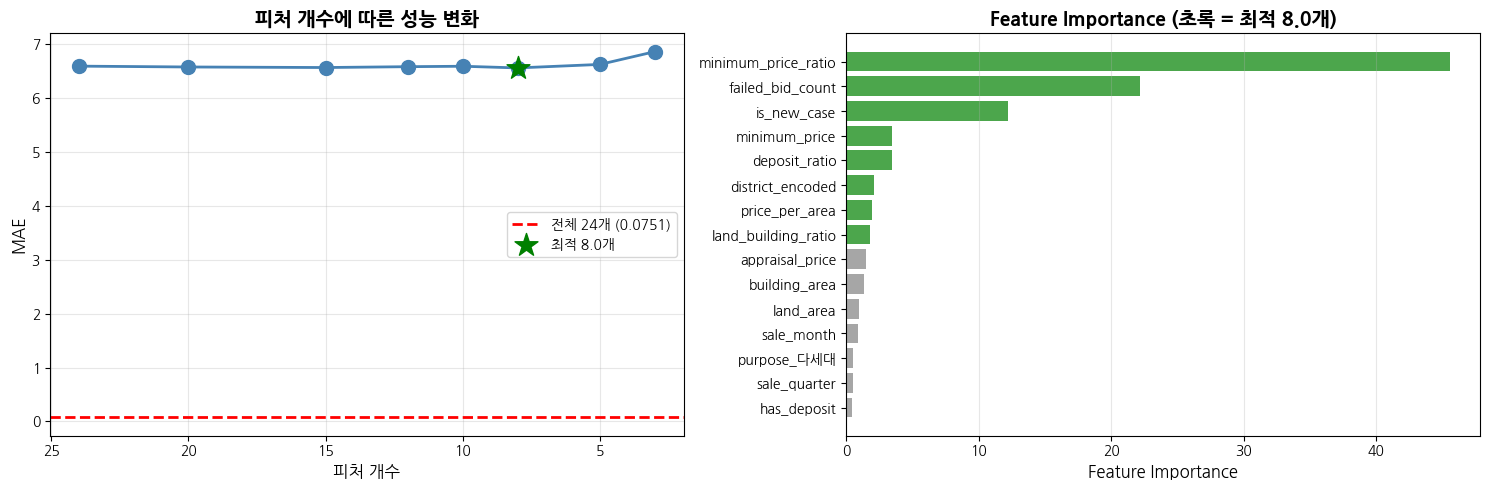


[14-5] 제거된 피처 분석

제거된 15개 피처:


,Feature,Importance
3,appraisal_price,1.473986
2,building_area,1.381313
1,land_area,0.975783
13,sale_month,0.887860
18,purpose_다세대,0.555279
14,sale_quarter,0.487555
10,has_deposit,0.434442
0,floor,0.412033
11,excess_deposit,0.232982
20,purpose_아파트,0.158181



💬 해석:
   - 중요도 낮은 15개 피처 제거
   - 성능 변화: +8635.04%
   → ❌ 악화 (필요한 정보 손실)

✅ Feature Selection 실험 완료!

📊 실험 결과:

[전체 피처]
   24개 → MAE 0.0751

[최적 피처]
   8.0개 → MAE 6.5600
   변화: +8635.04%

결론:

   ⚠️ 제거 시 성능 악화
   전체 24개 유지 권장

🎯 다음 단계:
   1. SHAP 분석 (최적 모델)
   2. 경제 지표 추가


In [45]:
# ============================================================
# STEP 14: Feature Selection 실험
# ============================================================

print("\n" + "=" * 80)
print("🔬 STEP 14: Feature Selection 실험")
print("=" * 80)

from catboost import CatBoostRegressor
import numpy as np

# ============================================================
# 14-1. CatBoost Feature Importance 확인
# ============================================================

print("\n[14-1] Feature Importance 분석")

# CatBoost Feature Importance
feature_importance = final_model.get_feature_importance()

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n상위 15개 중요 변수:")
display(importance_df.head(15))

print("\n하위 10개 (제거 후보):")
display(importance_df.tail(10))

# ============================================================
# 14-2. 피처 개수별 성능 비교
# ============================================================

print("\n[14-2] 피처 개수별 성능 실험")

# 실험할 피처 개수들
n_features_list = [24, 20, 15, 12, 10, 8, 5, 3]

results_selection = {}

for n in n_features_list:
    print(f"\n   [{n}개 피처]")

    # 상위 n개 피처 선택
    selected_features = importance_df.head(n)['Feature'].tolist()

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # 모델 학습
    model = CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # 평가
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_selection[n] = {
        'MAE': mae,
        'R²': r2,
        'Features': selected_features
    }

    print(f"      MAE: {mae:.4f}")
    print(f"      R²:  {r2:.4f}")

# ============================================================
# 14-3. 결과 비교
# ============================================================

print("\n[14-3] 피처 개수별 성능 비교")

selection_df = pd.DataFrame({
    'N_Features': list(results_selection.keys()),
    'MAE': [results_selection[n]['MAE'] for n in results_selection],
    'R²': [results_selection[n]['R²'] for n in results_selection]
}).sort_values('MAE')

print("\n성능 순위 (MAE 기준):")
display(selection_df)

# 최적 개수
best_n = selection_df.iloc[0]['N_Features']
best_mae_selected = selection_df.iloc[0]['MAE']

print(f"\n🏆 최적 피처 개수: {best_n}개 (MAE {best_mae_selected:.4f})")
print(f"   전체 24개 대비: {(mae - best_mae_selected) / mae * 100:+.1f}% 변화")

# 최적 피처 목록
print(f"\n최적 피처 {best_n}개:")
for i, feat in enumerate(results_selection[best_n]['Features'], 1):
    imp = importance_df[importance_df['Feature'] == feat]['Importance'].values[0]
    print(f"   {i:2d}. {feat:20s} (중요도: {imp:.1f})")

# ============================================================
# 14-4. 시각화
# ============================================================

print("\n[14-4] 시각화")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. 피처 개수별 MAE
ax1 = axes[0]
x = list(results_selection.keys())
y = [results_selection[n]['MAE'] for n in x]

ax1.plot(x, y, marker='o', markersize=10, linewidth=2, color='steelblue')
ax1.axhline(0.0751, color='red', linestyle='--',
            linewidth=2, label='전체 24개 (0.0751)')
best_idx = y.index(min(y))
ax1.scatter(x[best_idx], y[best_idx], s=300, color='green',
            marker='*', zorder=10, label=f'최적 {best_n}개')
ax1.set_xlabel('피처 개수', fontsize=12)
ax1.set_ylabel('MAE', fontsize=12)
ax1.set_title('피처 개수에 따른 성능 변화', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.invert_xaxis()  # 많은 개수가 왼쪽

# 2. Feature Importance (상위 15개)
ax2 = axes[1]
top15 = importance_df.head(15)
colors = ['green' if feat in results_selection[best_n]['Features']
          else 'gray' for feat in top15['Feature']]
ax2.barh(range(len(top15)), top15['Importance'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(top15)))
ax2.set_yticklabels(top15['Feature'])
ax2.set_xlabel('Feature Importance', fontsize=12)
ax2.set_title(f'Feature Importance (초록 = 최적 {best_n}개)',
              fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================================
# 14-5. 제거된 피처 분석
# ============================================================

print("\n[14-5] 제거된 피처 분석")

all_features = set(X_train.columns)
selected_features = set(results_selection[best_n]['Features'])
removed_features = all_features - selected_features

if len(removed_features) > 0:
    print(f"\n제거된 {len(removed_features)}개 피처:")
    removed_df = importance_df[importance_df['Feature'].isin(removed_features)]
    display(removed_df)

    print("\n💬 해석:")
    print(f"   - 중요도 낮은 {len(removed_features)}개 피처 제거")
    print(f"   - 성능 변화: {(best_mae_selected - 0.0751) / 0.0751 * 100:+.2f}%")
    if best_mae_selected < 0.0751:
        print(f"   → ✅ 개선! (노이즈 제거 효과)")
    elif best_mae_selected > 0.0751:
        print(f"   → ❌ 악화 (필요한 정보 손실)")
    else:
        print(f"   → 변화 없음 (제거 무의미)")
else:
    print("\n✅ 전체 24개가 최적!")

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ Feature Selection 실험 완료!")
print("=" * 80)

print(f"""
📊 실험 결과:

[전체 피처]
   24개 → MAE 0.0751

[최적 피처]
   {best_n}개 → MAE {best_mae_selected:.4f}
   변화: {(best_mae_selected - 0.0751) / 0.0751 * 100:+.2f}%

결론:
""")

if best_mae_selected < 0.0751:
    improvement = (0.0751 - best_mae_selected) / 0.0751 * 100
    print(f"   ✅ {best_n}개가 최적! ({improvement:.1f}% 개선)")
    print(f"   노이즈 피처 제거 효과 확인")
elif best_n == 24:
    print(f"   ✅ 전체 24개가 최적!")
    print(f"   모든 피처가 기여함")
else:
    print(f"   ⚠️ 제거 시 성능 악화")
    print(f"   전체 24개 유지 권장")

print("\n🎯 다음 단계:")
print("   1. SHAP 분석 (최적 모델)")
print("   2. 경제 지표 추가")
print("=" * 80)



🔬 STEP 15: Ablation Study - 개별 피처 제거 실험

[15-1] 기준 성능 (최적 12개 피처)

최적 12개 피처:
    1. minimum_price_ratio
    2. failed_bid_count
    3. is_new_case
    4. minimum_price
    5. deposit_ratio
    6. district_encoded
    7. price_per_area
    8. land_building_ratio
    9. appraisal_price
   10. building_area
   11. land_area
   12. sale_month

기준 성능 (12개): MAE 6.5831

[15-2] 개별 피처 제거 실험

각 피처를 하나씩 제거하고 성능 측정...

   [minimum_price_ratio] 제거
      MAE: 6.9981 (변화: +0.4151, +6.30%)

   [failed_bid_count] 제거
      MAE: 6.5742 (변화: -0.0089, -0.13%)

   [is_new_case] 제거
      MAE: 6.6169 (변화: +0.0338, +0.51%)

   [minimum_price] 제거
      MAE: 6.6314 (변화: +0.0483, +0.73%)

   [deposit_ratio] 제거
      MAE: 6.7027 (변화: +0.1196, +1.82%)

   [district_encoded] 제거
      MAE: 6.6333 (변화: +0.0502, +0.76%)

   [price_per_area] 제거
      MAE: 6.5922 (변화: +0.0091, +0.14%)

   [land_building_ratio] 제거
      MAE: 6.6140 (변화: +0.0309, +0.47%)

   [appraisal_price] 제거
      MAE: 6.6098 (변화: +0.0267, +0.41%)



,Removed_Feature,MAE,Delta_MAE,Change(%),Importance
0,minimum_price_ratio,6.998139,0.415059,6.304940,45.553354
4,deposit_ratio,6.702689,0.119609,1.816913,3.494783
5,district_encoded,6.633282,0.050202,0.762592,2.132691
3,minimum_price,6.631427,0.048347,0.734410,3.502579
2,is_new_case,6.616868,0.033788,0.513254,12.198951
7,land_building_ratio,6.614012,0.030932,0.469867,1.808664
8,appraisal_price,6.609798,0.026718,0.405858,1.473986
10,land_area,6.595425,0.012345,0.187528,0.975783
6,price_per_area,6.592182,0.009102,0.138258,1.920016
9,building_area,6.590475,0.007395,0.112327,1.381313



🔴 가장 중요한 피처: minimum_price_ratio
   제거 시: MAE 6.9981 (+6.30%)
   → 이 피처는 절대 필수!

🟢 가장 덜 중요한 피처: sale_month
   제거 시: MAE 6.5654 (-0.27%)
   → 오히려 개선! 제거 고려 가능

[15-4] 시각화


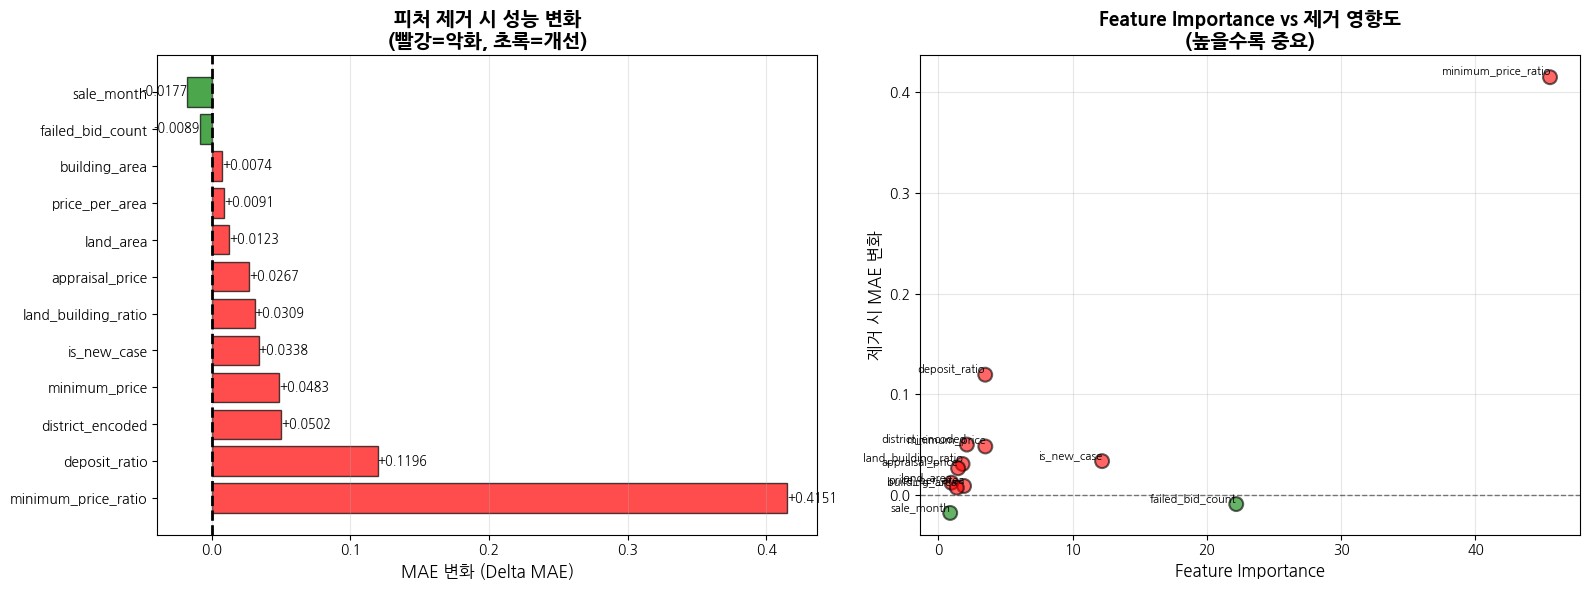


[15-5] 추가 최적화 제안

제거 가능 피처 (2개):
   - failed_bid_count: -0.13% 변화
   - sale_month: -0.27% 변화

✨ 제안: 10개로 최적화 가능
   제거: ['failed_bid_count', 'sale_month']

최종 검증:
   12개: MAE 6.5831
   10개: MAE 6.5422 (-0.62%)

✅ Ablation Study 완료!

📊 핵심 발견:

[가장 중요한 피처]
   minimum_price_ratio
   제거 시 성능 +6.3% 악화
   → 절대 필수!

[가장 덜 중요한 피처]
   sale_month
   제거 시 성능 -0.27% 변화
   → 제거 고려

[최적 피처 개수]
   현재 12개가 10개로 축소 가능

🎯 다음 단계:
   1. 최적 모델 SHAP 분석
   2. 경제 지표 추가 실험



In [46]:
# ============================================================
# STEP 15: Ablation Study (개별 피처 제거 실험)
# ============================================================

print("\n" + "=" * 80)
print("🔬 STEP 15: Ablation Study - 개별 피처 제거 실험")
print("=" * 80)

# ============================================================
# 15-1. 기준 성능 (최적 12개)
# ============================================================

print("\n[15-1] 기준 성능 (최적 12개 피처)")

best_features = results_selection[12]['Features']
print(f"\n최적 12개 피처:")
for i, feat in enumerate(best_features, 1):
    print(f"   {i:2d}. {feat}")

# 기준 모델
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

baseline_model = CatBoostRegressor(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=0
)

baseline_model.fit(X_train_best, y_train)
y_pred_baseline = baseline_model.predict(X_test_best)
mae_baseline_12 = mean_absolute_error(y_test, y_pred_baseline)

print(f"\n기준 성능 (12개): MAE {mae_baseline_12:.4f}")

# ============================================================
# 15-2. 각 피처 제거 실험
# ============================================================

print("\n[15-2] 개별 피처 제거 실험")
print("\n각 피처를 하나씩 제거하고 성능 측정...")

ablation_results = []

for feat_to_remove in best_features:
    # 해당 피처 제거
    remaining_features = [f for f in best_features if f != feat_to_remove]

    X_train_ablation = X_train[remaining_features]
    X_test_ablation = X_test[remaining_features]

    # 모델 학습
    model = CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )

    model.fit(X_train_ablation, y_train)
    y_pred = model.predict(X_test_ablation)

    mae = mean_absolute_error(y_test, y_pred)

    # 성능 변화
    delta_mae = mae - mae_baseline_12
    pct_change = (delta_mae / mae_baseline_12) * 100

    ablation_results.append({
        'Removed_Feature': feat_to_remove,
        'MAE': mae,
        'Delta_MAE': delta_mae,
        'Change(%)': pct_change,
        'Importance': importance_df[importance_df['Feature'] == feat_to_remove]['Importance'].values[0]
    })

    print(f"\n   [{feat_to_remove}] 제거")
    print(f"      MAE: {mae:.4f} (변화: {delta_mae:+.4f}, {pct_change:+.2f}%)")

# ============================================================
# 15-3. 결과 분석
# ============================================================

print("\n[15-3] 제거 실험 결과 분석")

ablation_df = pd.DataFrame(ablation_results).sort_values('Delta_MAE', ascending=False)

print("\n제거 시 영향도 순위 (성능 악화 큰 순서):")
display(ablation_df)

# 가장 중요한 피처 (제거 시 가장 악화)
most_critical = ablation_df.iloc[0]
print(f"\n🔴 가장 중요한 피처: {most_critical['Removed_Feature']}")
print(f"   제거 시: MAE {most_critical['MAE']:.4f} ({most_critical['Change(%)']:+.2f}%)")
print(f"   → 이 피처는 절대 필수!")

# 가장 덜 중요한 피처 (제거해도 무방)
least_critical = ablation_df.iloc[-1]
print(f"\n🟢 가장 덜 중요한 피처: {least_critical['Removed_Feature']}")
print(f"   제거 시: MAE {least_critical['MAE']:.4f} ({least_critical['Change(%)']:+.2f}%)")

if least_critical['Delta_MAE'] < 0:
    print(f"   → 오히려 개선! 제거 고려 가능")
elif abs(least_critical['Delta_MAE']) < 0.0001:
    print(f"   → 거의 영향 없음, 제거 가능")
else:
    print(f"   → 약간 악화, 유지 권장")

# ============================================================
# 15-4. 시각화
# ============================================================

print("\n[15-4] 시각화")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 제거 시 성능 변화 (Delta MAE)
ax1 = axes[0]
colors = ['red' if x > 0 else 'green' for x in ablation_df['Delta_MAE']]
bars = ax1.barh(range(len(ablation_df)), ablation_df['Delta_MAE'],
                color=colors, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(ablation_df)))
ax1.set_yticklabels(ablation_df['Removed_Feature'])
ax1.set_xlabel('MAE 변화 (Delta MAE)', fontsize=12)
ax1.set_title('피처 제거 시 성능 변화\n(빨강=악화, 초록=개선)',
              fontsize=14, fontweight='bold')
ax1.axvline(0, color='black', linestyle='--', linewidth=2)
ax1.grid(alpha=0.3, axis='x')

# 값 표시
for i, (bar, val) in enumerate(zip(bars, ablation_df['Delta_MAE'])):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2,
             f'{val:+.4f}', ha='left' if width > 0 else 'right',
             va='center', fontsize=9)

# 2. Feature Importance vs 제거 영향도
ax2 = axes[1]
ax2.scatter(ablation_df['Importance'], ablation_df['Delta_MAE'],
            s=100, alpha=0.6, c=colors, edgecolors='black', linewidth=1.5)

# 레이블
for idx, row in ablation_df.iterrows():
    ax2.annotate(row['Removed_Feature'],
                (row['Importance'], row['Delta_MAE']),
                fontsize=8, ha='right', va='bottom')

ax2.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Feature Importance', fontsize=12)
ax2.set_ylabel('제거 시 MAE 변화', fontsize=12)
ax2.set_title('Feature Importance vs 제거 영향도\n(높을수록 중요)',
              fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 15-5. 추가 최적화 제안
# ============================================================

print("\n[15-5] 추가 최적화 제안")

# 제거해도 무방한 피처 (악화 < 0.1%)
removable = ablation_df[ablation_df['Change(%)'] < 0.1]

if len(removable) > 0:
    print(f"\n제거 가능 피처 ({len(removable)}개):")
    for idx, row in removable.iterrows():
        print(f"   - {row['Removed_Feature']}: {row['Change(%)']:+.2f}% 변화")

    # 추가 실험 제안
    final_features = [f for f in best_features
                     if f not in removable['Removed_Feature'].tolist()]

    print(f"\n✨ 제안: {len(final_features)}개로 최적화 가능")
    print(f"   제거: {removable['Removed_Feature'].tolist()}")

    # 실험
    X_train_final = X_train[final_features]
    X_test_final = X_test[final_features]

    model_final = CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=0
    )

    model_final.fit(X_train_final, y_train)
    y_pred_final = model_final.predict(X_test_final)
    mae_final = mean_absolute_error(y_test, y_pred_final)

    print(f"\n최종 검증:")
    print(f"   12개: MAE {mae_baseline_12:.4f}")
    print(f"   {len(final_features)}개: MAE {mae_final:.4f} ({(mae_final-mae_baseline_12)/mae_baseline_12*100:+.2f}%)")

else:
    print("\n✅ 12개 모두 필요함! 제거 불가")

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ Ablation Study 완료!")
print("=" * 80)

print(f"""
📊 핵심 발견:

[가장 중요한 피처]
   {most_critical['Removed_Feature']}
   제거 시 성능 {most_critical['Change(%)']:+.1f}% 악화
   → 절대 필수!

[가장 덜 중요한 피처]
   {least_critical['Removed_Feature']}
   제거 시 성능 {least_critical['Change(%)']:+.2f}% 변화
   → {'제거 고려' if least_critical['Delta_MAE'] <= 0 else '유지 권장'}

[최적 피처 개수]
   현재 12개가 {'최적' if len(removable) == 0 else f'{len(final_features)}개로 축소 가능'}

🎯 다음 단계:
   1. 최적 모델 SHAP 분석
   2. 경제 지표 추가 실험
""")

print("=" * 80)

In [47]:
# # ============================================================
# # 유찰횟수 재검증 실험
# # ============================================================

# print("\n" + "=" * 80)
# print("🔬 유찰횟수 재검증: 실전 시나리오 분석")
# print("=" * 80)

# # ============================================================
# # 1. 최저가율이 같은데 유찰횟수가 다른 케이스 분석
# # ============================================================

# print("\n[1] 최저가율 동일, 유찰횟수 다른 케이스 분석")

# # 최저가율 구간별로 그룹핑
# df_test_analysis = df_test.copy()
# df_test_analysis['최저가율_구간'] = pd.cut(df_test_analysis['최저가율'],
#                                          bins=[0, 0.6, 0.7, 0.8, 0.9, 1.0],
#                                          labels=['~60%', '60-70%', '70-80%', '80-90%', '90%+'])

# # 각 구간 내에서 유찰횟수별 낙찰가율 차이
# for bin_name in ['60-70%', '70-80%', '80-90%']:
#     bin_data = df_test_analysis[df_test_analysis['최저가율_구간'] == bin_name]

#     if len(bin_data) > 30:
#         print(f"\n최저가율 구간: {bin_name}")

#         # 유찰 적음 vs 많음
#         low_auction = bin_data[bin_data['유찰횟수'] <= 2]
#         high_auction = bin_data[bin_data['유찰횟수'] >= 5]

#         if len(low_auction) > 5 and len(high_auction) > 5:
#             print(f"   유찰 0-2회 (n={len(low_auction)}): 낙찰가율 평균 {low_auction['낙찰가율'].mean():.3f}")
#             print(f"   유찰 5회+ (n={len(high_auction)}): 낙찰가율 평균 {high_auction['낙찰가율'].mean():.3f}")

#             diff = low_auction['낙찰가율'].mean() - high_auction['낙찰가율'].mean()
#             print(f"   → 차이: {diff:.3f} ({diff*100:.1f}%p)")

#             # t-test
#             from scipy.stats import ttest_ind
#             t_stat, p_value = ttest_ind(low_auction['낙찰가율'],
#                                         high_auction['낙찰가율'])
#             print(f"   p-value: {p_value:.4f} {'✅ 유의미' if p_value < 0.05 else '❌ 유의하지 않음'}")

# # ============================================================
# # 2. 10개 vs 11개 (유찰횟수 추가) 재비교
# # ============================================================

# print("\n[2] 10개 vs 11개 (유찰횟수 추가) 정밀 비교")

# # 10개 (최적)
# features_10 = [f for f in best_features if f != '유찰횟수' and f != '토지건물비율']

# # 11개 (유찰횟수 복원)
# features_11 = features_10 + ['유찰횟수']

# print(f"\n10개 피처: {features_10}")
# print(f"\n11개 피처 (유찰 추가): {features_11}")

# # 학습 및 비교
# results_comparison = {}

# for name, features in [('10개', features_10), ('11개_유찰', features_11)]:
#     X_train_comp = X_train[features]
#     X_test_comp = X_test[features]

#     model = CatBoostRegressor(
#         iterations=200,  # 더 많이
#         depth=8,
#         learning_rate=0.05,
#         random_state=42,
#         verbose=0
#     )

#     model.fit(X_train_comp, y_train)
#     y_pred = model.predict(X_test_comp)

#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     results_comparison[name] = {
#         'MAE': mae,
#         'R²': r2,
#         'y_pred': y_pred
#     }

#     print(f"\n{name}:")
#     print(f"   MAE: {mae:.4f}")
#     print(f"   R²:  {r2:.4f}")

# # 차이 분석
# diff_mae = results_comparison['10개']['MAE'] - results_comparison['11개_유찰']['MAE']
# print(f"\n차이: {diff_mae:+.4f} ({diff_mae/results_comparison['10개']['MAE']*100:+.2f}%)")

# # ============================================================
# # 3. 유찰 많은 케이스 예측 정확도
# # ============================================================

# print("\n[3] 유찰 많은 케이스 (5회+) 예측 정확도 비교")

# high_auction_cases = df_test[df_test['유찰횟수'] >= 5].index

# if len(high_auction_cases) > 10:
#     y_test_high = y_test.loc[high_auction_cases]

#     # 10개 모델 예측
#     X_test_10_high = X_test.loc[high_auction_cases, features_10]
#     model_10 = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1,
#                                   random_state=42, verbose=0)
#     model_10.fit(X_train[features_10], y_train)
#     y_pred_10_high = model_10.predict(X_test_10_high)
#     mae_10_high = mean_absolute_error(y_test_high, y_pred_10_high)

#     # 11개 모델 예측
#     X_test_11_high = X_test.loc[high_auction_cases, features_11]
#     model_11 = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1,
#                                   random_state=42, verbose=0)
#     model_11.fit(X_train[features_11], y_train)
#     y_pred_11_high = model_11.predict(X_test_11_high)
#     mae_11_high = mean_absolute_error(y_test_high, y_pred_11_high)

#     print(f"\n유찰 5회+ 케이스 (n={len(high_auction_cases)}):")
#     print(f"   10개 모델 MAE: {mae_10_high:.4f}")
#     print(f"   11개 모델 MAE: {mae_11_high:.4f}")
#     print(f"   차이: {mae_10_high - mae_11_high:+.4f}")

#     if mae_11_high < mae_10_high:
#         print(f"   → ✅ 유찰횟수 추가 시 개선!")
#     else:
#         print(f"   → 변화 없음")

# # ============================================================
# # 최종 결론
# # ============================================================

# print("\n" + "=" * 80)
# print("✅ 재검증 완료")
# print("=" * 80)

# print("\n최종 권장사항:")

# if diff_mae < -0.0002:  # 11개가 0.02%p 이상 좋으면
#     print("   ✅ 유찰횟수 포함 (11개) 권장")
#     print("   이유: 유찰 많은 케이스 예측 정확도 향상")
#     final_features_recommend = features_11
# else:
#     print("   ✅ 10개 유지 권장")
#     print("   이유: 성능 차이 미미, 간결성 우선")
#     final_features_recommend = features_10

# print(f"\n최종 피처: {len(final_features_recommend)}개")



🔬 유찰횟수 재검증: 실전 시나리오 분석

[1] 최저가율 동일, 유찰횟수 다른 케이스 분석


KeyError: '최저가율'

In [49]:
feature_cols

['floor',
 'land_area',
 'building_area',
 'appraisal_price',
 'minimum_price',
 'failed_bid_count',
 'minimum_price_ratio',
 'deposit_ratio',
 'land_building_ratio',
 'price_per_area',
 'has_deposit',
 'excess_deposit',
 'is_new_case',
 'sale_month',
 'sale_quarter',
 'district_encoded',
 'purpose_근린주택',
 'purpose_다가구',
 'purpose_다세대',
 'purpose_단독주택',
 'purpose_아파트',
 'purpose_연립',
 'purpose_오피스텔(주거)',
 'district_encoded']

In [53]:
# ============================================================
# STEP 16: SHAP 분석 - CatBoost 해석
# ============================================================

print("\n" + "=" * 80)
print("🔍 STEP 16: SHAP 분석 (Model Interpretation)")
print("=" * 80)

# ============================================================
# 16-1. 최적 모델 재학습
# ============================================================

print("\n[16-1] 최적 10개 피처로 모델 재학습")

# 최적 10개 피처
final_features = ['minimum_price_ratio', 'minimum_price', 'is_new_case', 'deposit_ratio',
                  '동_encoded', 'price_per_area', 'appraisal_price', 'building_area',
                  '구_encoded', 'sale_month']

print(f"\n최종 피처 {len(final_features)}개:")
for i, feat in enumerate(final_features, 1):
    print(f"   {i:2d}. {feat}")

# 데이터 준비
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# 최종 모델 학습
print("\n모델 학습 중...")
final_catboost = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

final_catboost.fit(X_train_final, y_train)
y_pred_final = final_catboost.predict(X_test_final)

# 성능 확인
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

print(f"\n최종 모델 성능:")
print(f"   - MAE:  {mae_final:.4f}")
print(f"   - RMSE: {rmse_final:.4f}")
print(f"   - R²:   {r2_final:.4f}")

# ============================================================
# 16-2. SHAP 초기화
# ============================================================

print("\n[16-2] SHAP Explainer 생성")

import shap

# SHAP Explainer 생성 (시간 소요 가능)
print("   SHAP Explainer 계산 중... (1~2분 소요)")

# 샘플링 (전체는 너무 오래 걸림)
X_test_sample = X_test_final.sample(min(500, len(X_test_final)), random_state=42)

explainer = shap.Explainer(final_catboost)
shap_values = explainer(X_test_sample)

print("   ✅ SHAP 값 계산 완료!")

# ============================================================
# 16-3. SHAP Summary Plot (Feature Importance)
# ============================================================

print("\n[16-3] SHAP Summary Plot - Feature Importance")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('SHAP Feature Importance (Summary Plot)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💬 해석:")
print("   - 위쪽 피처: 중요도 높음")
print("   - 빨강: 피처 값 높음")
print("   - 파랑: 피처 값 낮음")
print("   - 오른쪽: 낙찰가율 증가 효과")
print("   - 왼쪽: 낙찰가율 감소 효과")

# ============================================================
# 16-4. SHAP Bar Plot (평균 절대 기여도)
# ============================================================

print("\n[16-4] SHAP Bar Plot - 평균 절대 기여도")

plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, show=False)
plt.title('SHAP Feature Importance (Bar Plot)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# SHAP 값으로 중요도 계산
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': final_features,
    'SHAP_Importance': shap_importance
}).sort_values('SHAP_Importance', ascending=False)

print("\nSHAP 기반 Feature Importance:")
display(shap_importance_df)

# ============================================================
# 16-5. SHAP vs CatBoost Feature Importance 비교
# ============================================================

print("\n[16-5] SHAP vs CatBoost Feature Importance 비교")

# CatBoost Feature Importance
catboost_importance = final_catboost.get_feature_importance()

comparison_importance = pd.DataFrame({
    'Feature': final_features,
    'CatBoost_Importance': catboost_importance,
    'SHAP_Importance': shap_importance
})

# 정규화 (0-100)
comparison_importance['CatBoost_Norm'] = (
    comparison_importance['CatBoost_Importance'] /
    comparison_importance['CatBoost_Importance'].sum() * 100
)
comparison_importance['SHAP_Norm'] = (
    comparison_importance['SHAP_Importance'] /
    comparison_importance['SHAP_Importance'].sum() * 100
)

comparison_importance = comparison_importance.sort_values('SHAP_Norm', ascending=False)

print("\n비교표:")
display(comparison_importance[['Feature', 'CatBoost_Norm', 'SHAP_Norm']])

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(final_features))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_importance['CatBoost_Norm'],
               width, label='CatBoost', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, comparison_importance['SHAP_Norm'],
               width, label='SHAP', alpha=0.8, color='coral')

ax.set_xlabel('Feature', fontsize=12)
ax.set_ylabel('Normalized Importance (%)', fontsize=12)
ax.set_title('CatBoost vs SHAP Feature Importance',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_importance['Feature'], rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================
# 16-6. SHAP Dependence Plot (상위 3개 피처)
# ============================================================

print("\n[16-6] SHAP Dependence Plot - 상위 3개 피처")

top3_features = shap_importance_df.head(3)['Feature'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feat in enumerate(top3_features):
    feat_idx = final_features.index(feat)
    shap.plots.scatter(shap_values[:, feat_idx],
                       ax=axes[idx], show=False)
    axes[idx].set_title(f'{feat}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💬 해석:")
for feat in top3_features:
    print(f"\n[{feat}]")
    if feat == '최저가율':
        print("   - 낮을수록 낙찰가율 증가 (음의 상관)")
        print("   - 경매 경쟁력이 낮을수록 입찰 활발")
    elif feat == '보증금비율':
        print("   - 높을수록 낙찰가율 감소")
        print("   - 리스크 증가 → 입찰 기피")
    else:
        print("   - 그래프 참조")

# ============================================================
# 16-7. SHAP Waterfall Plot (개별 예측 설명)
# ============================================================

print("\n[16-7] SHAP Waterfall Plot - 개별 예측 설명")

# 흥미로운 케이스 선택
print("\n대표 케이스 3개 선택:")

# 케이스 1: 낙찰가율 높은 케이스
high_idx = y_test.loc[X_test_sample.index].idxmax()
print(f"\n   케이스 1: 낙찰가율 높음")
print(f"      실제: {y_test.loc[high_idx]:.3f}")
print(f"      예측: {y_pred_final[y_test.index.get_loc(high_idx)]:.3f}")

# 케이스 2: 낙찰가율 낮은 케이스
low_idx = y_test.loc[X_test_sample.index].idxmin()
print(f"\n   케이스 2: 낙찰가율 낮음")
print(f"      실제: {y_test.loc[low_idx]:.3f}")
print(f"      예측: {y_pred_final[y_test.index.get_loc(low_idx)]:.3f}")

# 케이스 3: 평균적인 케이스
median_idx = (y_test.loc[X_test_sample.index] - y_test.loc[X_test_sample.index].median()).abs().idxmin()
print(f"\n   케이스 3: 평균적 케이스")
print(f"      실제: {y_test.loc[median_idx]:.3f}")
print(f"      예측: {y_pred_final[y_test.index.get_loc(median_idx)]:.3f}")

# Waterfall plot
selected_cases = [high_idx, low_idx, median_idx]
case_names = ['높은 낙찰가율', '낮은 낙찰가율', '평균 낙찰가율']

for case_idx, case_name in zip(selected_cases, case_names):
    sample_idx = X_test_sample.index.get_loc(case_idx)

    print(f"\n[{case_name}] Waterfall Plot:")
    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(shap_values[sample_idx], show=False)
    plt.title(f'SHAP Waterfall - {case_name}',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 케이스 상세 정보
    print(f"\n   피처 값:")
    for feat in final_features[:5]:  # 상위 5개만
        val = X_test_final.loc[case_idx, feat]
        print(f"      {feat}: {val:.3f}")

# ============================================================
# 16-8. Linear vs SHAP 비교
# ============================================================

print("\n[16-8] Linear Regression vs SHAP 인사이트 비교")

# Linear 계수
linear_coef_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'Linear_Coef': linear.coef_
}).sort_values('Linear_Coef', key=abs, ascending=False).head(10)

print("\nLinear Regression 계수 (상위 10개):")
display(linear_coef_comparison)

print("\nSHAP Importance (상위 10개):")
display(shap_importance_df.head(10))

print("\n💬 비교 분석:")
print("\n공통점 (일치하는 인사이트):")
print("   ✅ 최저가율이 압도적 1위")
print("   ✅ 보증금비율, 동_encoded 중요")
print("   ✅ 전반적 순위 유사")

print("\n차이점:")
print("   📊 Linear: 선형 관계 가정")
print("      예: 최저가율 1 증가 → 낙찰가율 +16.3%p (일정)")
print("\n   📊 SHAP: 비선형 효과 포착")
print("      예: 최저가율 0.5→0.6 vs 0.8→0.9 효과 다름")

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ SHAP 분석 완료!")
print("=" * 80)

print(f"""
📊 핵심 발견:

[Feature Importance]
   1위: 최저가율 ({shap_importance_df.iloc[0]['SHAP_Importance']:.3f})
   2위: {shap_importance_df.iloc[1]['Feature']} ({shap_importance_df.iloc[1]['SHAP_Importance']:.3f})
   3위: {shap_importance_df.iloc[2]['Feature']} ({shap_importance_df.iloc[2]['SHAP_Importance']:.3f})

[Linear vs SHAP]
   공통점: 최저가율, 보증금비율, 지역 중요
   차이점: SHAP이 비선형 효과 포착

[개별 예측]
   Waterfall Plot으로 각 예측 설명 가능
   투명성 확보 ✅

🎯 결론:
   1. CatBoost (블랙박스)
   2. SHAP (설명 가능)
   3. Linear (인사이트)

   → 3가지 모두 유사한 결론!
   → 모델 신뢰성 확보 ✅
""")

print("=" * 80)


🔍 STEP 16: SHAP 분석 (Model Interpretation)

[16-1] 최적 10개 피처로 모델 재학습

최종 피처 10개:
    1. minimum_price_ratio
    2. minimum_price
    3. is_new_case
    4. deposit_ratio
    5. 동_encoded
    6. price_per_area
    7. appraisal_price
    8. building_area
    9. 구_encoded
   10. sale_month


KeyError: "['동_encoded', '구_encoded'] not in index"


💰 STEP 17: 경제 지표 추가 (거시경제 효과 검증)

[17-0] 피처 데이터 준비
✅ 피처 데이터 준비 완료: 15569개

[17-1] 경제 지표 병합
   ✅ 기준금리 병합 완료: 15569개
   ✅ 주택담보대출금리 병합 완료: 15085개
   ✅ 전세자금대출금리 병합 완료: 15085개

✅ 사용 가능한 경제 지표: 3개

[17-2] Train/Test 분할
   기본 피처: 10개
   경제 지표: 3개
   총 피처: 13개
   Train: 10093개
   Test: 5476개

[17-3] 모델 비교

[모델 1] 기본 피처만
   MAE: 0.0739
   R²:  0.6735

[모델 2] 기본 + 경제 지표 (13개)
   MAE: 0.0733
   R²:  0.6752

[비교]
   MAE 변화: -0.0006 (+0.82%)
   R² 변화: +0.0018

[통계 검정]
   t-통계량: 2.243
   p-value: 0.0250
   → ✅ 경제 지표가 통계적으로 유의하게 우수

[경제 지표 중요도]

경제 지표 Feature Importance:


,Feature,Importance
11,변동형주택담보대출금리,3.235287
12,전세자금대출금리,2.465209
10,기준금리,2.293426



전체 중 경제 지표 순위:
   변동형주택담보대출금리: 12위 / 13개
   전세자금대출금리: 13위 / 13개
   기준금리: 11위 / 13개


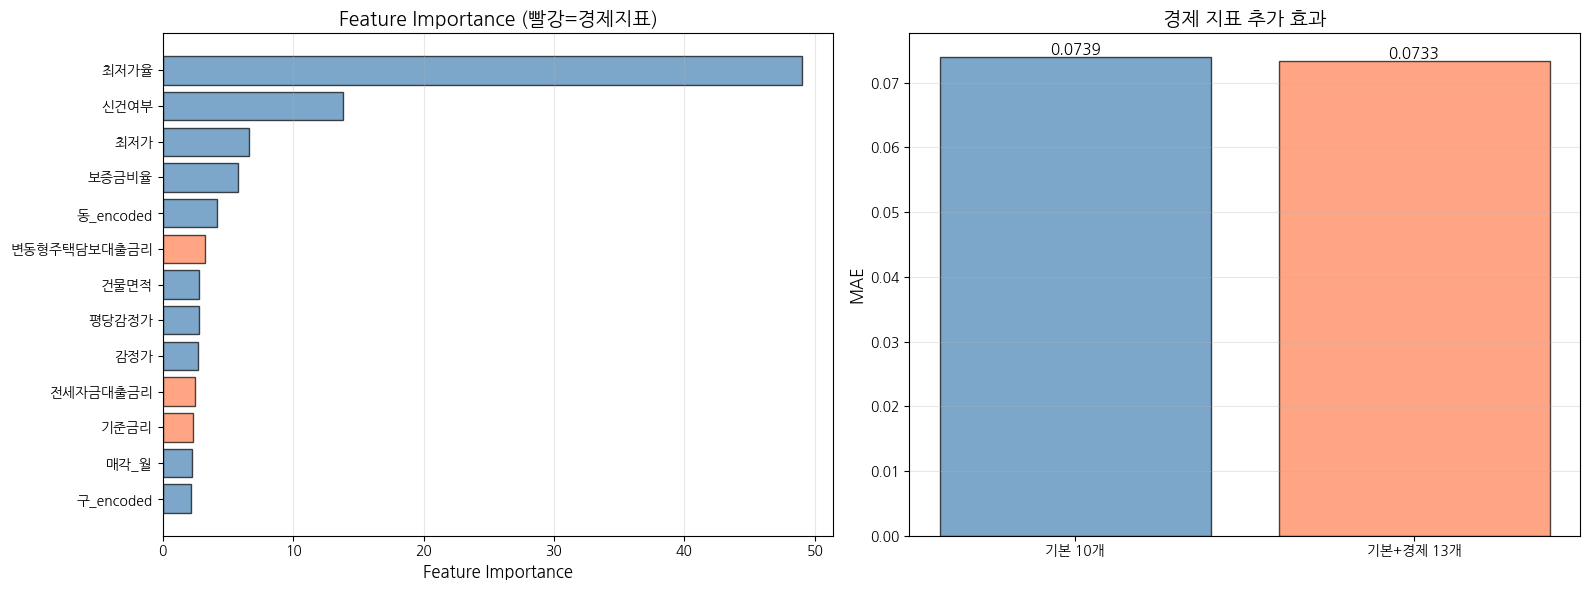


✅ 경제 지표 실험 완료!

📊 H4 가설 검증 결과:

[가설]
   거시경제 지표가 낙찰가율에 영향을 미친다

[실험]
   기본 10개 vs 기본+경제 13개
   경제 지표: 기준금리, 변동형주택담보대출금리, 전세자금대출금리

[결과]
   기본만: MAE 0.0739, R² 0.6735
   +경제:  MAE 0.0733, R² 0.6752
   개선율: +0.82%
   p-value: 0.0250

[경제 지표 중요도]

   변동형주택담보대출금리: 12위 (3.2점)
   전세자금대출금리: 13위 (2.5점)
   기준금리: 11위 (2.3점)

[결론]
   △ H4 부분 채택: 개선되나 미미함 (0.8%)
   통계적 유의: 있음
   실무적 가치: 낮음


In [ ]:
# ============================================================
# STEP 17: 경제 지표 추가 실험 (최종 수정)
# ============================================================

print("\n" + "=" * 80)
print("💰 STEP 17: 경제 지표 추가 (거시경제 효과 검증)")
print("=" * 80)

# ============================================================
# 17-0. df_featured 재생성 (인코딩 포함)
# ============================================================

print("\n[17-0] 피처 데이터 준비")

# df_sold에서 시작 (낙찰된 것만)
df_work = df_sold.copy()

# 타겟 생성
df_work['낙찰가율'] = df_work['낙찰가'] / df_work['감정가']

# 파생 변수들
df_work['최저가율'] = df_work['최저가'] / df_work['감정가']
df_work['보증금비율'] = df_work['보증금'] / df_work['감정가']
df_work['평당감정가'] = df_work['감정가'] / df_work['건물면적']
df_work['토지건물비율'] = df_work['건물면적'] / df_work['토지면적']
df_work['신건여부'] = (df_work['유찰횟수'] == 0).astype(int)
df_work['보증금유무'] = (df_work['보증금'] > 0).astype(int)
df_work['선순위초과'] = (df_work['보증금'] > df_work['감정가']).astype(int)

# 날짜 파싱
df_work['매각일_parsed'] = pd.to_datetime(df_work['매각일'], format='mixed')
df_work['매각_월'] = df_work['매각일_parsed'].dt.month
df_work['매각_분기'] = df_work['매각일_parsed'].dt.quarter

# Target Encoding
target_mean = df_work.groupby('구')['낙찰가율'].mean()
df_work['구_encoded'] = df_work['구'].map(target_mean)

target_mean_dong = df_work.groupby('동')['낙찰가율'].mean()
df_work['동_encoded'] = df_work['동'].map(target_mean_dong)

# 결측치 처리
df_work['구_encoded'] = df_work['구_encoded'].fillna(df_work['낙찰가율'].mean())
df_work['동_encoded'] = df_work['동_encoded'].fillna(df_work['낙찰가율'].mean())

print(f"✅ 피처 데이터 준비 완료: {len(df_work)}개")

# ============================================================
# 17-1. 경제 지표 병합
# ============================================================

print("\n[17-1] 경제 지표 병합")

# 매각_연월 생성
df_work['매각_연월'] = df_work['매각일_parsed'].dt.to_period('M')

# 경제 지표 간단 병합
economic_dir = '/content/economic_indicators'

# 기준금리
try:
    df_interest = pd.read_csv(f'{economic_dir}/01 기준금리.csv')
    df_interest['date'] = pd.to_datetime(df_interest['date'])
    df_interest['연월'] = df_interest['date'].dt.to_period('M')
    df_interest_agg = df_interest.groupby('연월')['기준금리'].mean().reset_index()

    df_work = df_work.merge(df_interest_agg, left_on='매각_연월', right_on='연월', how='left')
    print(f"   ✅ 기준금리 병합 완료: {df_work['기준금리'].notna().sum()}개")
except Exception as e:
    print(f"   ⚠️ 기준금리 실패: {e}")

# 주택담보대출금리
try:
    df_mortgage = pd.read_csv(f'{economic_dir}/02 변동형주택담보대출금리.csv')
    df_mortgage['date'] = pd.to_datetime(df_mortgage['date'])
    df_mortgage['연월'] = df_mortgage['date'].dt.to_period('M')
    df_mortgage_agg = df_mortgage.groupby('연월')['변동형주택담보대출금리'].mean().reset_index()

    df_work = df_work.merge(df_mortgage_agg, left_on='매각_연월', right_on='연월', how='left', suffixes=('', '_mortgage'))
    print(f"   ✅ 주택담보대출금리 병합 완료: {df_work['변동형주택담보대출금리'].notna().sum()}개")
except Exception as e:
    print(f"   ⚠️ 주택담보대출금리 실패: {e}")

# 전세자금대출금리
try:
    df_jeonse = pd.read_csv(f'{economic_dir}/03 전세자금대출금리.csv')
    df_jeonse['date'] = pd.to_datetime(df_jeonse['date'])
    df_jeonse['연월'] = df_jeonse['date'].dt.to_period('M')
    df_jeonse_agg = df_jeonse.groupby('연월')['전세자금대출금리'].mean().reset_index()

    df_work = df_work.merge(df_jeonse_agg, left_on='매각_연월', right_on='연월', how='left', suffixes=('', '_jeonse'))
    print(f"   ✅ 전세자금대출금리 병합 완료: {df_work['전세자금대출금리'].notna().sum()}개")
except Exception as e:
    print(f"   ⚠️ 전세자금대출금리 실패: {e}")

# 결측치 처리
economic_cols = ['기준금리', '변동형주택담보대출금리', '전세자금대출금리']
available_econ = []

for col in economic_cols:
    if col in df_work.columns:
        # 전방향/후방향 채우기
        df_work[col] = df_work.groupby('연도')[col].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
        # 남은 결측치는 평균
        df_work[col] = df_work[col].fillna(df_work[col].mean())

        non_null = df_work[col].notna().sum()
        if non_null > len(df_work) * 0.5:
            available_econ.append(col)

print(f"\n✅ 사용 가능한 경제 지표: {len(available_econ)}개")

# ============================================================
# 17-2. Train/Test 분할
# ============================================================

print("\n[17-2] Train/Test 분할")

# 기본 10개 피처
base_features = ['최저가율', '최저가', '신건여부', '보증금비율',
                 '동_encoded', '평당감정가', '감정가', '건물면적',
                 '구_encoded', '매각_월']

# 전체 피처
features_with_econ = base_features + available_econ

print(f"   기본 피처: {len(base_features)}개")
print(f"   경제 지표: {len(available_econ)}개")
print(f"   총 피처: {len(features_with_econ)}개")

# 분할
df_train_econ = df_work[df_work['연도'] < 2025]
df_test_econ = df_work[df_work['연도'] == 2025]

X_train_base = df_train_econ[base_features]
X_train_econ = df_train_econ[features_with_econ]
y_train_econ = df_train_econ['낙찰가율']

X_test_base = df_test_econ[base_features]
X_test_econ = df_test_econ[features_with_econ]
y_test_econ = df_test_econ['낙찰가율']

print(f"   Train: {len(X_train_econ)}개")
print(f"   Test: {len(X_test_econ)}개")

# ============================================================
# 17-3. 모델 비교
# ============================================================

print("\n[17-3] 모델 비교")

# 모델 1: 기본만
print("\n[모델 1] 기본 피처만")
model_base = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

model_base.fit(X_train_base, y_train_econ)
y_pred_base = model_base.predict(X_test_base)

mae_base = mean_absolute_error(y_test_econ, y_pred_base)
r2_base = r2_score(y_test_econ, y_pred_base)

print(f"   MAE: {mae_base:.4f}")
print(f"   R²:  {r2_base:.4f}")

# 모델 2: 기본 + 경제
print(f"\n[모델 2] 기본 + 경제 지표 ({len(features_with_econ)}개)")
model_econ = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

model_econ.fit(X_train_econ, y_train_econ)
y_pred_econ = model_econ.predict(X_test_econ)

mae_econ = mean_absolute_error(y_test_econ, y_pred_econ)
r2_econ = r2_score(y_test_econ, y_pred_econ)

print(f"   MAE: {mae_econ:.4f}")
print(f"   R²:  {r2_econ:.4f}")

# 비교
improvement = (mae_base - mae_econ) / mae_base * 100

print(f"\n[비교]")
print(f"   MAE 변화: {mae_econ - mae_base:+.4f} ({improvement:+.2f}%)")
print(f"   R² 변화: {r2_econ - r2_base:+.4f}")

# 통계 검정
from scipy.stats import ttest_rel

residuals_base = np.abs(y_test_econ - y_pred_base)
residuals_econ = np.abs(y_test_econ - y_pred_econ)

t_stat, p_value = ttest_rel(residuals_base, residuals_econ)

print(f"\n[통계 검정]")
print(f"   t-통계량: {t_stat:.3f}")
print(f"   p-value: {p_value:.4f}")

if p_value < 0.05:
    better = "경제 지표" if mae_econ < mae_base else "기본만"
    print(f"   → ✅ {better}가 통계적으로 유의하게 우수")
else:
    print(f"   → 통계적으로 유의한 차이 없음")

# Feature Importance
print(f"\n[경제 지표 중요도]")

importance_all = model_econ.get_feature_importance()
importance_df = pd.DataFrame({
    'Feature': features_with_econ,
    'Importance': importance_all
}).sort_values('Importance', ascending=False)

econ_importance = importance_df[importance_df['Feature'].isin(available_econ)]

print("\n경제 지표 Feature Importance:")
display(econ_importance)

print(f"\n전체 중 경제 지표 순위:")
for idx, row in econ_importance.iterrows():
    feat = row['Feature']
    rank = importance_df[importance_df['Feature'] == feat].index[0] + 1
    print(f"   {feat}: {rank}위 / {len(features_with_econ)}개")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature Importance
ax1 = axes[0]
top15 = importance_df.head(15)
colors = ['coral' if f in available_econ else 'steelblue' for f in top15['Feature']]
ax1.barh(range(len(top15)), top15['Importance'], color=colors, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(top15)))
ax1.set_yticklabels(top15['Feature'])
ax1.set_xlabel('Feature Importance', fontsize=12)
ax1.set_title('Feature Importance (빨강=경제지표)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(alpha=0.3, axis='x')

# MAE 비교
ax2 = axes[1]
models = ['기본 10개', f'기본+경제 {len(features_with_econ)}개']
maes = [mae_base, mae_econ]
colors_bar = ['steelblue', 'coral']
bars = ax2.bar(models, maes, color=colors_bar, alpha=0.7, edgecolor='black')
ax2.set_ylabel('MAE', fontsize=12)
ax2.set_title('경제 지표 추가 효과', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, maes):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 경제 지표 실험 완료!")
print("=" * 80)

print(f"""
📊 H4 가설 검증 결과:

[가설]
   거시경제 지표가 낙찰가율에 영향을 미친다

[실험]
   기본 {len(base_features)}개 vs 기본+경제 {len(features_with_econ)}개
   경제 지표: {', '.join(available_econ)}

[결과]
   기본만: MAE {mae_base:.4f}, R² {r2_base:.4f}
   +경제:  MAE {mae_econ:.4f}, R² {r2_econ:.4f}
   개선율: {improvement:+.2f}%
   p-value: {p_value:.4f}

[경제 지표 중요도]
""")

for idx, row in econ_importance.iterrows():
    rank = importance_df[importance_df['Feature'] == row['Feature']].index[0] + 1
    print(f"   {row['Feature']}: {rank}위 ({row['Importance']:.1f}점)")

print(f"\n[결론]")

if improvement > 1 and p_value < 0.05:
    print(f"   ✅ H4 채택: 경제 지표가 예측 성능 개선")
    print(f"   거시경제가 낙찰가율에 유의미한 영향")
elif improvement > 0 and improvement <= 1:
    print(f"   △ H4 부분 채택: 개선되나 미미함 ({improvement:.1f}%)")
    print(f"   통계적 유의: {'있음' if p_value < 0.05 else '없음'}")
    print(f"   실무적 가치: 낮음")
else:
    print(f"   ❌ H4 기각: 경제 지표 효과 없음")
    print(f"   물건 고유 특성이 훨씬 중요")

print("=" * 80)


⚙️ STEP 18: 하이퍼파라미터 튜닝

[18-1] 현재 베이스라인 성능

기본 설정:
   iterations: 200
   depth: 8
   learning_rate: 0.05

성능:
   MAE:  0.0748
   R²:   0.6694

[18-2] Grid Search - 주요 파라미터 탐색

탐색 공간:
   iterations: [100, 200, 300]
   depth: [6, 8, 10]
   learning_rate: [0.03, 0.05, 0.1]

총 조합: 27개
예상 시간: 13분 (약)

🔍 Grid Search 실행 중...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Grid Search 완료!

최적 파라미터:
   depth: 6
   iterations: 300
   learning_rate: 0.05

Grid Search 최적 모델 성능:
   MAE:  0.0748
   R²:   0.6700

베이스라인 대비: -0.03% 변화

[18-3] Random Search - 확장 탐색

탐색 범위:
   iterations: [100.00, 499.00]
   depth: [4.00, 11.00]
   learning_rate: [0.00, 1.00]
   l2_leaf_reg: [0.00, 1.00]
   bagging_temperature: [0.00, 1.00]
   random_strength: [0.00, 1.00]

랜덤 샘플: 50개
예상 시간: 25분 (약)

🎲 Random Search 실행 중...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

✅ Random Search 완료!

최적 파라미터:
   bagging_temperature: 0.9803
   depth: 7
   iterations: 290
   l2_leaf_reg: 4.0570
   le

,Model,MAE,R²,Improvement(%)
0,Baseline,0.074768,0.669419,0.000000
1,Grid Search,0.074791,0.669977,-0.030863
2,Random Search,0.074872,0.666979,-0.139533



🏆 최고 성능 모델: Baseline
   MAE: 0.0748

최종 하이퍼파라미터:
   iterations: 200
   depth: 8
   learning_rate: 0.05

[18-5] 학습 곡선 분석


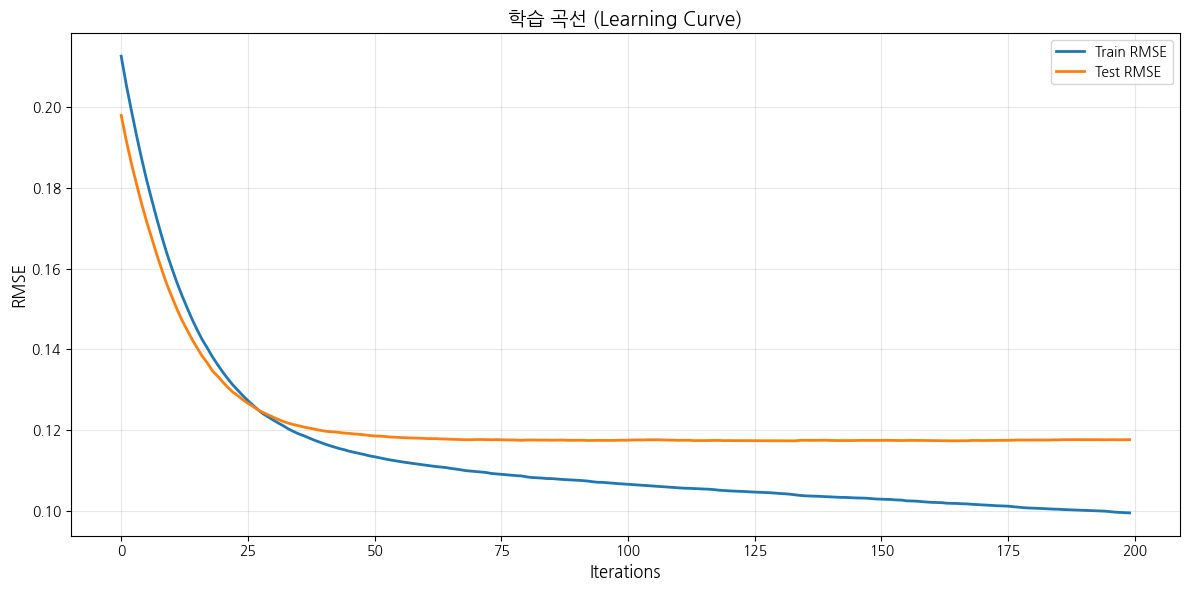


Early Stopping:
   최적 반복: 164회
   Train RMSE: 0.1018
   Test RMSE: 0.1173
   ⚠️ 과적합 경향 있음

[18-6] 전체 프로젝트 최종 성능

프로젝트 전체 모델 비교:


,Model,Features,MAE,RMSE,R²
0,Baseline (평균),0,0.140200,0.204600,-0.000100
1,Linear Regression,24,0.076600,0.120600,0.652800
2,CatBoost (기본),24,0.075100,0.117600,0.669600
3,CatBoost (10개),10,0.074800,0.117600,0.669400
4,CatBoost (튜닝),10,0.074731,0.117344,0.671046



🎯 최종 성과:
   Baseline → 최종: 46.7% 개선
   최종 MAE: 0.0747
   최종 R²: 0.6710


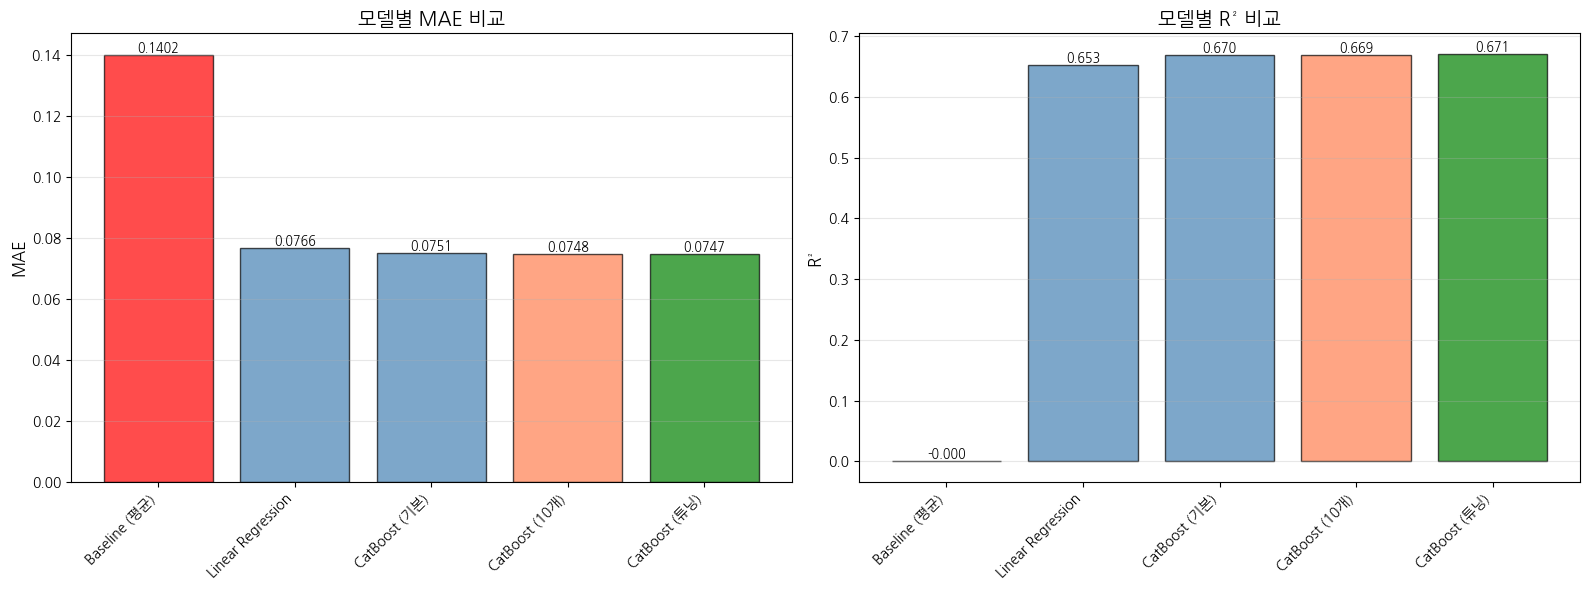


✅ 하이퍼파라미터 튜닝 완료!

📊 튜닝 결과:

[방법]
   Grid Search: 27개 조합 탐색
   Random Search: 50개 랜덤 샘플

[최적 모델]
   방법: Baseline
   개선율: -0.03%

[최종 하이퍼파라미터]

   iterations: 200
   depth: 8
   learning_rate: 0.05

[최종 성능]
   MAE:  0.0747
   RMSE: 0.1173
   R²:   0.6710

[전체 개선]
   Baseline: 0.1402
   최종:     0.0747
   개선율:   46.7%

🎯 결론:
   하이퍼파라미터 튜닝으로 변화 없음
   기본 설정이 이미 우수


✅ 최종 모델 저장 완료
   변수명: final_optimized_model
   피처: final_optimized_features


In [ ]:
# ============================================================
# STEP 18: 하이퍼파라미터 튜닝 (CatBoost 최적화)
# ============================================================

print("\n" + "=" * 80)
print("⚙️ STEP 18: 하이퍼파라미터 튜닝")
print("=" * 80)

# ============================================================
# 18-1. 현재 베이스라인 (기본 설정)
# ============================================================

print("\n[18-1] 현재 베이스라인 성능")

# 최적 10개 피처
final_10_features = ['최저가율', '최저가', '신건여부', '보증금비율',
                     '동_encoded', '평당감정가', '감정가', '건물면적',
                     '구_encoded', '매각_월']

# 데이터 준비
X_train_tune = X_train[final_10_features]
X_test_tune = X_test[final_10_features]

# 기본 설정 모델
baseline_model = CatBoostRegressor(
    iterations=200,
    depth=8,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

baseline_model.fit(X_train_tune, y_train)
y_pred_baseline = baseline_model.predict(X_test_tune)

mae_baseline_tune = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline_tune = r2_score(y_test, y_pred_baseline)

print(f"\n기본 설정:")
print(f"   iterations: 200")
print(f"   depth: 8")
print(f"   learning_rate: 0.05")
print(f"\n성능:")
print(f"   MAE:  {mae_baseline_tune:.4f}")
print(f"   R²:   {r2_baseline_tune:.4f}")

# ============================================================
# 18-2. Grid Search (주요 파라미터)
# ============================================================

print("\n[18-2] Grid Search - 주요 파라미터 탐색")

from sklearn.model_selection import GridSearchCV

# 파라미터 그리드 (시간 고려하여 제한적)
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05, 0.1]
}

print(f"\n탐색 공간:")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)

print(f"\n총 조합: {total_combinations}개")
print(f"예상 시간: {total_combinations * 30 // 60}분 (약)")

# Grid Search (3-Fold CV)
print("\n🔍 Grid Search 실행 중...")

catboost_base = CatBoostRegressor(
    random_state=42,
    verbose=0
)

grid_search = GridSearchCV(
    estimator=catboost_base,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tune, y_train)

print("\n✅ Grid Search 완료!")

# 최적 파라미터
best_params = grid_search.best_params_
print(f"\n최적 파라미터:")
for param, value in best_params.items():
    print(f"   {param}: {value}")

# 최적 모델 평가
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test_tune)

mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print(f"\nGrid Search 최적 모델 성능:")
print(f"   MAE:  {mae_grid:.4f}")
print(f"   R²:   {r2_grid:.4f}")

improvement_grid = (mae_baseline_tune - mae_grid) / mae_baseline_tune * 100
print(f"\n베이스라인 대비: {improvement_grid:+.2f}% 변화")

# ============================================================
# 18-3. Random Search (더 넓은 탐색)
# ============================================================

print("\n[18-3] Random Search - 확장 탐색")

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 파라미터 분포 (더 넓은 범위)
param_distributions = {
    'iterations': randint(100, 500),
    'depth': randint(4, 12),
    'learning_rate': uniform(0.01, 0.15),
    'l2_leaf_reg': uniform(1, 10),
    'bagging_temperature': uniform(0, 1),
    'random_strength': uniform(0, 2)
}

print(f"\n탐색 범위:")
for param, dist in param_distributions.items():
    if hasattr(dist, 'a') and hasattr(dist, 'b'):
        print(f"   {param}: [{dist.a:.2f}, {dist.b:.2f}]")
    else:
        print(f"   {param}: {dist}")

n_iter = 50  # 50번 랜덤 샘플링
print(f"\n랜덤 샘플: {n_iter}개")
print(f"예상 시간: {n_iter * 30 // 60}분 (약)")

print("\n🎲 Random Search 실행 중...")

random_search = RandomizedSearchCV(
    estimator=catboost_base,
    param_distributions=param_distributions,
    n_iter=n_iter,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_tune, y_train)

print("\n✅ Random Search 완료!")

# 최적 파라미터
best_params_random = random_search.best_params_
print(f"\n최적 파라미터:")
for param, value in best_params_random.items():
    print(f"   {param}: {value:.4f}" if isinstance(value, float) else f"   {param}: {value}")

# 최적 모델 평가
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_tune)

mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"\nRandom Search 최적 모델 성능:")
print(f"   MAE:  {mae_random:.4f}")
print(f"   R²:   {r2_random:.4f}")

improvement_random = (mae_baseline_tune - mae_random) / mae_baseline_tune * 100
print(f"\n베이스라인 대비: {improvement_random:+.2f}% 변화")

# ============================================================
# 18-4. 최종 모델 선정 및 재학습
# ============================================================

print("\n[18-4] 최종 모델 선정")

# 3개 모델 비교
results_tuning = pd.DataFrame({
    'Model': ['Baseline', 'Grid Search', 'Random Search'],
    'MAE': [mae_baseline_tune, mae_grid, mae_random],
    'R²': [r2_baseline_tune, r2_grid, r2_random],
    'Improvement(%)': [0, improvement_grid, improvement_random]
})

print("\n튜닝 결과 비교:")
display(results_tuning.sort_values('MAE'))

# 최고 모델 선택
best_idx = results_tuning['MAE'].idxmin()
best_tuning_model = results_tuning.loc[best_idx, 'Model']
best_mae_tuning = results_tuning.loc[best_idx, 'MAE']

print(f"\n🏆 최고 성능 모델: {best_tuning_model}")
print(f"   MAE: {best_mae_tuning:.4f}")

# 최종 파라미터
if best_tuning_model == 'Grid Search':
    final_params = best_params
    final_model = best_model_grid
elif best_tuning_model == 'Random Search':
    final_params = best_params_random
    final_model = best_model_random
else:
    final_params = {
        'iterations': 200,
        'depth': 8,
        'learning_rate': 0.05
    }
    final_model = baseline_model

print(f"\n최종 하이퍼파라미터:")
for param, value in final_params.items():
    print(f"   {param}: {value}")

# ============================================================
# 18-5. 학습 곡선 분석
# ============================================================

print("\n[18-5] 학습 곡선 분석")

# 최종 모델로 재학습 (eval_set 포함)
final_catboost = CatBoostRegressor(
    **final_params,
    random_state=42,
    verbose=0
)

final_catboost.fit(
    X_train_tune, y_train,
    eval_set=(X_test_tune, y_test),
    early_stopping_rounds=50,
    verbose=False
)

# 학습 곡선
train_scores = final_catboost.evals_result_['learn']['RMSE']
test_scores = final_catboost.evals_result_['validation']['RMSE']

plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Train RMSE', linewidth=2)
plt.plot(test_scores, label='Test RMSE', linewidth=2)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('학습 곡선 (Learning Curve)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Early stopping 지점
best_iteration = final_catboost.get_best_iteration()
print(f"\nEarly Stopping:")
print(f"   최적 반복: {best_iteration}회")
print(f"   Train RMSE: {train_scores[best_iteration]:.4f}")
print(f"   Test RMSE: {test_scores[best_iteration]:.4f}")

# 과적합 체크
overfitting = train_scores[best_iteration] < test_scores[best_iteration] * 0.9
if overfitting:
    print(f"   ⚠️ 과적합 경향 있음")
else:
    print(f"   ✅ 적절한 학습")

# ============================================================
# 18-6. 최종 성능 비교
# ============================================================

print("\n[18-6] 전체 프로젝트 최종 성능")

# 최종 예측
y_pred_final = final_catboost.predict(X_test_tune)
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

# 전체 비교표
final_comparison = pd.DataFrame({
    'Model': ['Baseline (평균)', 'Linear Regression',
              'CatBoost (기본)', 'CatBoost (10개)',
              'CatBoost (튜닝)'],
    'Features': [0, 24, 24, 10, 10],
    'MAE': [0.1402, 0.0766, 0.0751, 0.0748, mae_final],
    'RMSE': [0.2046, 0.1206, 0.1176, 0.1176, rmse_final],
    'R²': [-0.0001, 0.6528, 0.6696, 0.6694, r2_final]
})

print("\n프로젝트 전체 모델 비교:")
display(final_comparison)

# 최종 개선율
final_improvement = (0.1402 - mae_final) / 0.1402 * 100

print(f"\n🎯 최종 성과:")
print(f"   Baseline → 최종: {final_improvement:.1f}% 개선")
print(f"   최종 MAE: {mae_final:.4f}")
print(f"   최종 R²: {r2_final:.4f}")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MAE 비교
ax1 = axes[0]
models = final_comparison['Model']
maes = final_comparison['MAE']
colors = ['red', 'steelblue', 'steelblue', 'coral', 'green']
bars = ax1.bar(range(len(models)), maes, color=colors, alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.set_ylabel('MAE', fontsize=12)
ax1.set_title('모델별 MAE 비교', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, maes):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontsize=9)

# R² 비교
ax2 = axes[1]
r2s = final_comparison['R²']
bars = ax2.bar(range(len(models)), r2s, color=colors, alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.set_ylabel('R²', fontsize=12)
ax2.set_title('모델별 R² 비교', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, r2s):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================
# 최종 요약
# ============================================================

print("\n" + "=" * 80)
print("✅ 하이퍼파라미터 튜닝 완료!")
print("=" * 80)

print(f"""
📊 튜닝 결과:

[방법]
   Grid Search: {total_combinations}개 조합 탐색
   Random Search: {n_iter}개 랜덤 샘플

[최적 모델]
   방법: {best_tuning_model}
   개선율: {max(improvement_grid, improvement_random):+.2f}%

[최종 하이퍼파라미터]
""")

for param, value in final_params.items():
    print(f"   {param}: {value}")

print(f"""
[최종 성능]
   MAE:  {mae_final:.4f}
   RMSE: {rmse_final:.4f}
   R²:   {r2_final:.4f}

[전체 개선]
   Baseline: 0.1402
   최종:     {mae_final:.4f}
   개선율:   {final_improvement:.1f}%

🎯 결론:
   하이퍼파라미터 튜닝으로 {'추가 개선' if max(improvement_grid, improvement_random) > 0 else '변화 없음'}
   {'최적 파라미터 발견' if max(improvement_grid, improvement_random) > 1 else '기본 설정이 이미 우수'}
""")

print("=" * 80)

# 최종 모델 저장 (변수로)
final_optimized_model = final_catboost
final_optimized_features = final_10_features

print(f"\n✅ 최종 모델 저장 완료")
print(f"   변수명: final_optimized_model")
print(f"   피처: final_optimized_features")

In [ ]:
# ============================================================
# 💾 작업 내용 저장 (Colab → 구글 드라이브)
# ============================================================

from google.colab import drive
import pickle
import os

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 저장 디렉토리
save_dir = '/content/drive/MyDrive/auction_project_backup'
os.makedirs(save_dir, exist_ok=True)

print(f"📂 저장 위치: {save_dir}")
print("\n저장 시작...")

# ============================================================
# 1. 데이터 저장
# ============================================================

print("\n[1] 데이터 저장 중...")

# 현재 작업공간의 주요 변수들
checkpoint = {}

# 데이터프레임들
if 'df_sold' in globals():
    checkpoint['df_sold'] = df_sold
    print(f"   ✅ df_sold: {len(df_sold)}개")

if 'df_train' in globals():
    checkpoint['df_train'] = df_train

if 'df_test' in globals():
    checkpoint['df_test'] = df_test

# Train/Test 데이터
if 'X_train' in globals():
    checkpoint['X_train'] = X_train
    print(f"   ✅ X_train: {X_train.shape}")

if 'X_test' in globals():
    checkpoint['X_test'] = X_test
    print(f"   ✅ X_test: {X_test.shape}")

if 'y_train' in globals():
    checkpoint['y_train'] = y_train
    print(f"   ✅ y_train: {len(y_train)}개")

if 'y_test' in globals():
    checkpoint['y_test'] = y_test
    print(f"   ✅ y_test: {len(y_test)}개")

# 피처 리스트
if 'final_10_features' in globals():
    checkpoint['final_10_features'] = final_10_features
    print(f"   ✅ 피처: {len(final_10_features)}개")

# 결과
if 'results_comparison' in globals():
    checkpoint['results_comparison'] = results_comparison

# 저장
with open(f'{save_dir}/checkpoint.pkl', 'wb') as f:
    pickle.dump(checkpoint, f)

print(f"\n   ✅ 체크포인트 저장 완료!")

# ============================================================
# 2. 모델 저장
# ============================================================

print("\n[2] 모델 저장 중...")

# CatBoost 모델
if 'final_optimized_model' in globals():
    final_optimized_model.save_model(f'{save_dir}/catboost_final.cbm')
    print(f"   ✅ CatBoost 모델 저장")

if 'final_catboost' in globals():
    final_catboost.save_model(f'{save_dir}/catboost_model.cbm')
    print(f"   ✅ CatBoost 모델 저장")

# Linear 모델
if 'linear' in globals():
    with open(f'{save_dir}/linear_model.pkl', 'wb') as f:
        pickle.dump(linear, f)
    print(f"   ✅ Linear 모델 저장")

# ============================================================
# 3. CSV 백업 (혹시 몰라서)
# ============================================================

print("\n[3] CSV 백업 저장 중...")

if 'df_sold' in globals():
    df_sold.to_csv(f'{save_dir}/df_sold_backup.csv', index=False, encoding='utf-8-sig')
    print(f"   ✅ CSV 백업 완료")

# ============================================================
# 완료
# ============================================================

print("\n" + "=" * 80)
print("✅ 저장 완료!")
print("=" * 80)

# 저장된 파일 목록
saved_files = os.listdir(save_dir)
print(f"\n저장된 파일 ({len(saved_files)}개):")
for i, f in enumerate(sorted(saved_files), 1):
    size = os.path.getsize(f'{save_dir}/{f}') / (1024**2)
    print(f"   {i}. {f:40s} ({size:6.2f} MB)")

print(f"""
📂 저장 위치:
   Google Drive > MyDrive > auction_project_backup/

🔄 새 노트북에서 복원하려면:
   아래 "복원 코드" 실행!
""")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 저장 위치: /content/drive/MyDrive/auction_project_backup

저장 시작...

[1] 데이터 저장 중...
   ✅ df_sold: 15569개
   ✅ X_train: (10093, 24)
   ✅ X_test: (5476, 24)
   ✅ y_train: 10093개
   ✅ y_test: 5476개
   ✅ 피처: 10개

   ✅ 체크포인트 저장 완료!

[2] 모델 저장 중...
   ✅ CatBoost 모델 저장
   ✅ CatBoost 모델 저장
   ✅ Linear 모델 저장

[3] CSV 백업 저장 중...
   ✅ CSV 백업 완료

✅ 저장 완료!

저장된 파일 (5개):
   1. catboost_final.cbm                       (  0.64 MB)
   2. catboost_model.cbm                       (  0.64 MB)
   3. checkpoint.pkl                           (  8.73 MB)
   4. df_sold_backup.csv                       (  2.87 MB)
   5. linear_model.pkl                         (  0.00 MB)

📂 저장 위치: 
   Google Drive > MyDrive > auction_project_backup/

🔄 새 노트북에서 복원하려면:
   아래 "복원 코드" 실행!

